In [1]:
# Importing all required libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import missingno as msno
import statsmodels.api as sm

from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

from dpp.data import load_from_kaggle

/Users/ebbykuriakose/Desktop/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download a dataset from Kaggle 

dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


In [3]:
files

['Car_sales.csv']

In [4]:
# Load and Preview Dataset
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [5]:
# Dataset overview: shape, summary stats, and duplicates
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)

# Column-level details: data types, missing values, unique counts, and sample values
pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })

'Shape'

(157, 16)

'Description'

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count              157.00               121.00              155.00   
mean                53.00                18.07               27.39   
std                 68.03                11.45               14.35   
min                  0.11                 5.16                9.24   
25%                 14.11                11.26               18.02   
50%                 29.45                14.18               22.80   
75%                 67.96                19.88               31.95   
max                540.56                67.55               85.50   

       Engine_size  Horsepower  Wheelbase   Width  Length  Curb_weight  \
count       156.00      156.00     156.00  156.00  156.00       155.00   
mean          3.06      185.95     107.49   71.15  187.34         3.38   
std           1.04       56.70       7.64    3.45   13.43         0.63   
min           1.00       55.00      92.60   62.60  149.40         1.90   
25%           2.30      149.50     103.00   68.40  177.58         2.97   
50%           3.00      177.50     107.00   70.55  187.90         3.34   
75%           3.58      215.00     112.20   73.43  196.12         3.80   
max           8.00      450.00     138.70   79.90  224.50         5.57   

       Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count         156.00           154.00             155.00  
mean           17.95            23.84              77.04  
std             3.89             4.28              25.14  
min            10.30            15.00              23.28  
25%            15.80            21.00              60.41  
50%            17.20            24.00              72.03  
75%            19.58            26.00              89.41  
max            32.00            45.00             188.14

'Duplicates'

np.int64(0)

Data Types  Unique Values  \
Manufacturer            object             30   
Model                   object            156   
Sales_in_thousands     float64            157   
__year_resale_value    float64            117   
Vehicle_type            object              2   
Price_in_thousands     float64            152   
Engine_size            float64             31   
Horsepower             float64             66   
Wheelbase              float64             88   
Width                  float64             78   
Length                 float64            127   
Curb_weight            float64            147   
Fuel_capacity          float64             55   
Fuel_efficiency        float64             20   
Latest_Launch           object            130   
Power_perf_factor      float64            154   

                                               Sample Values  
Manufacturer                       [Saturn, Chrysler, Dodge]  
Model                               [Ranger, Boxter, Aurora]  
Sales_in_thousands                  [16.774, 107.995, 5.596]  
__year_resale_value                    [9.25, 36.225, 17.81]  
Vehicle_type                     [Passenger, Passenger, Car]  
Price_in_thousands                   [19.46, 22.245, 29.185]  
Engine_size                                  [3.0, 3.2, 5.2]  
Horsepower                             [195.0, 170.0, 221.0]  
Wheelbase                               [107.1, 107.3, 98.9]  
Width                                     [69.0, 70.8, 68.4]  
Length                                   [200.0, 174.7, nan]  
Curb_weight                              [3.778, nan, 2.892]  
Fuel_capacity                             [16.6, 13.2, 14.3]  
Fuel_efficiency                           [19.0, 20.0, 27.0]  
Latest_Launch               [3/6/2012, 5/31/2011, 9/10/2012]  
Power_perf_factor    [100.0248023, 70.07832154, 70.66094179]

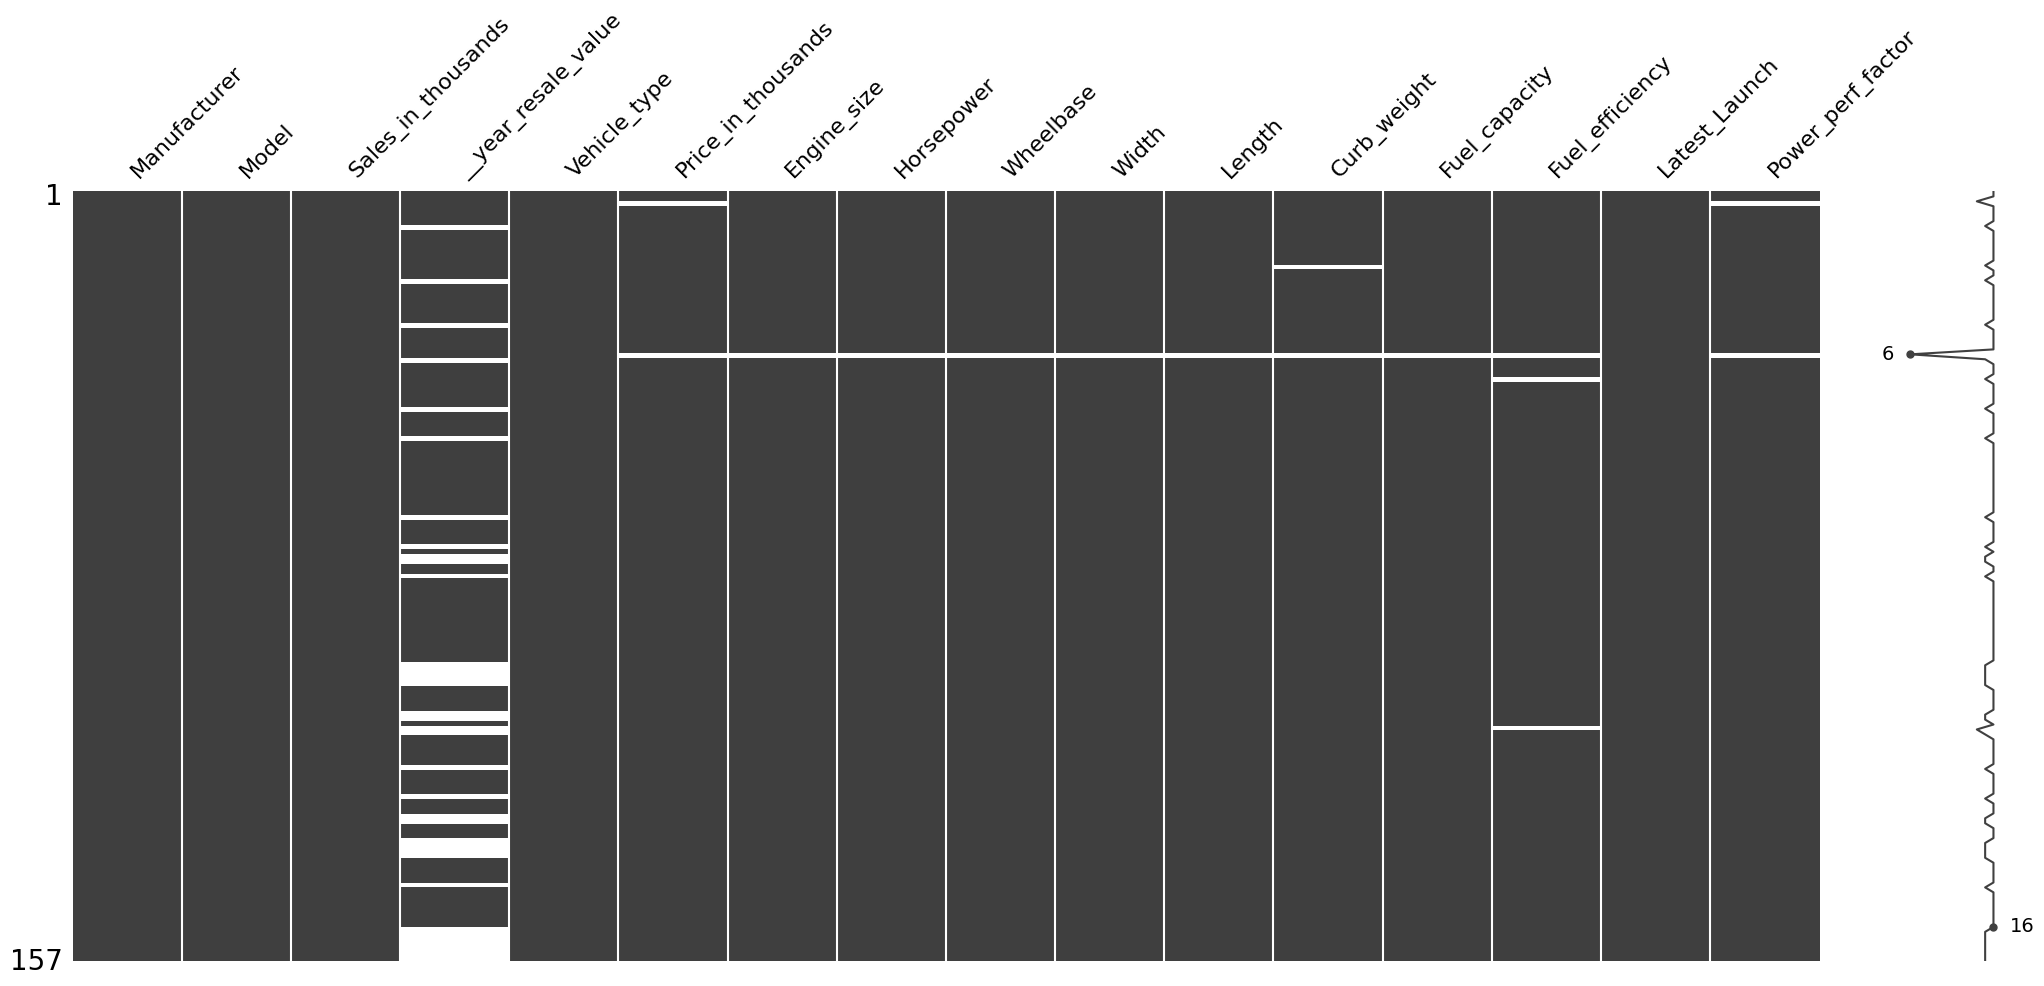

In [6]:
# Visualizing missing values in the dataset
msno.matrix(df)
plt.show()

In [7]:
# Rename column '__year_resale_value' to 'Year_resale_value' if it exists
if '__year_resale_value' in df.columns:
    df.rename(columns={'__year_resale_value': 'Year_resale_value'}, inplace=True)

In [8]:
# Converted specified columns to categorical type
category_col = ['Manufacturer','Model','Vehicle_type']
for col in category_col:
    df[col] = df[col].astype('category')

# Convert the 'Latest_Launch' column from string format MM/DD/YYYY to datetime objects.
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], format='%m/%d/%Y', errors='coerce')

In [9]:
# Remove rows with >=3 missing (NaN) values
df = df[df.isna().sum(axis=1) < 3]

In [10]:
# Filled missing values in 'Price_in_thousands', 'Power_perf_factor' 'Curb_weight' with their respective medians
df['Price_in_thousands'] = df['Price_in_thousands'].fillna(df['Price_in_thousands'].median())
df['Power_perf_factor'] = df['Power_perf_factor'].fillna(df['Power_perf_factor'].median())
df['Curb_weight'] = df['Curb_weight'].fillna(df['Curb_weight'].median())

In [11]:
# Extracts highly correlated columns for each numeric feature.
corr_matrix = df.corr(numeric_only=True).abs() 
threshold = 0.6

# Create a boolean mask of correlations above threshold (excluding diagonal)
mask = (corr_matrix > threshold) & (~np.eye(corr_matrix.shape[0], dtype=bool))

# Extract dependent columns as a dictionary
dependent_columns = {col: list(corr_matrix.columns[mask[col]]) for col in corr_matrix.columns}

# Convert dictionary to a DataFrame (simplest method)
dependent_df = pd.DataFrame(list(dependent_columns.items()), columns=['Column', 'Dependent Columns'])

# Show full content
pd.set_option('display.max_colwidth', None)
print(dependent_df)

                Column  \
0   Sales_in_thousands   
1    Year_resale_value   
2   Price_in_thousands   
3          Engine_size   
4           Horsepower   
5            Wheelbase   
6                Width   
7               Length   
8          Curb_weight   
9        Fuel_capacity   
10     Fuel_efficiency   
11   Power_perf_factor   

                                                                                          Dependent Columns  
0                                                                                                        []  
1                                                       [Price_in_thousands, Horsepower, Power_perf_factor]  
2                                           [Year_resale_value, Engine_size, Horsepower, Power_perf_factor]  
3   [Price_in_thousands, Horsepower, Width, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor]  
4     [Year_resale_value, Price_in_thousands, Engine_size, Curb_weight, Fuel_efficiency, Power_perf_factor]  
5

In [12]:
# Function to impute missing values in numeric columns using Linear Regression 
# (predicts missing target values from related features and updates the dataframe)

def impute_with_regression(df, target_col, features):
    """
    Impute missing values in target_col using Linear Regression on given features.
    """
    # Split data into rows with and without target_col
    train_data = df[df[target_col].notnull()]
    test_data = df[df[target_col].isnull()]
    
    # If there are no missing values, just return
    if test_data.empty:
        print(f"No missing values in {target_col}")
        return df
    
    missing_idx = test_data.index

    X_train = train_data[features]
    y_train = train_data[target_col]
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data[features]
    predicted_values = model.predict(X_test)
    
    df.loc[missing_idx, target_col] = predicted_values
    return df

In [13]:
# Impute missing values for multiple columns using the defined regression function

# Define features
features_fuel_efficiency = ['Engine_size', 'Horsepower', 'Width', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']
features_resale_value = ['Price_in_thousands', 'Horsepower', 'Power_perf_factor']

# Call the function for each column
df = impute_with_regression(df, 'Year_resale_value', features_resale_value)
df = impute_with_regression(df, 'Fuel_efficiency', features_fuel_efficiency)

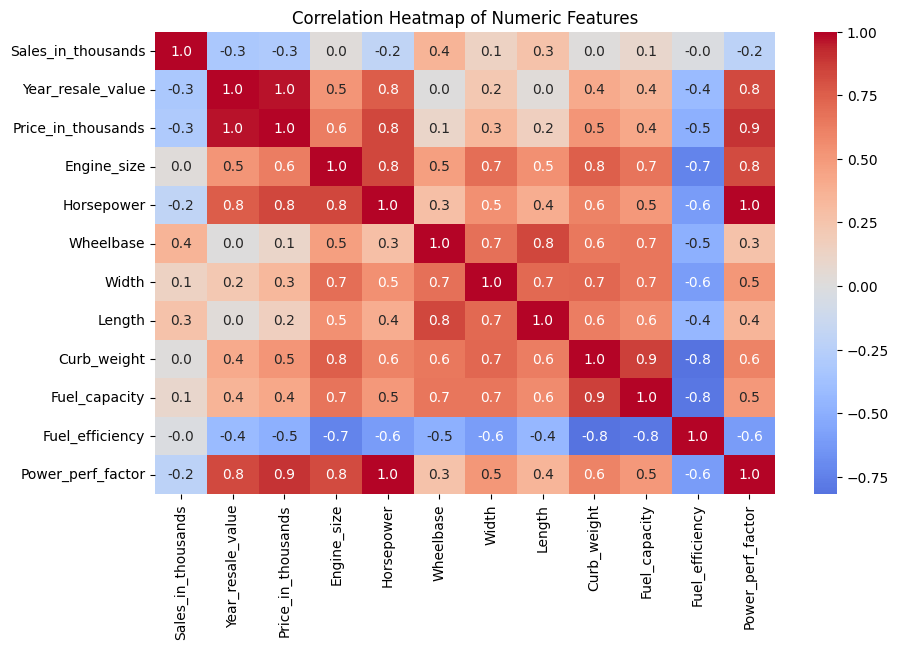

In [14]:
# Plot a heatmap of correlations between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, fmt='.1f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


Column: Sales_in_thousands
Skewness: 3.40
Highly right-skewed


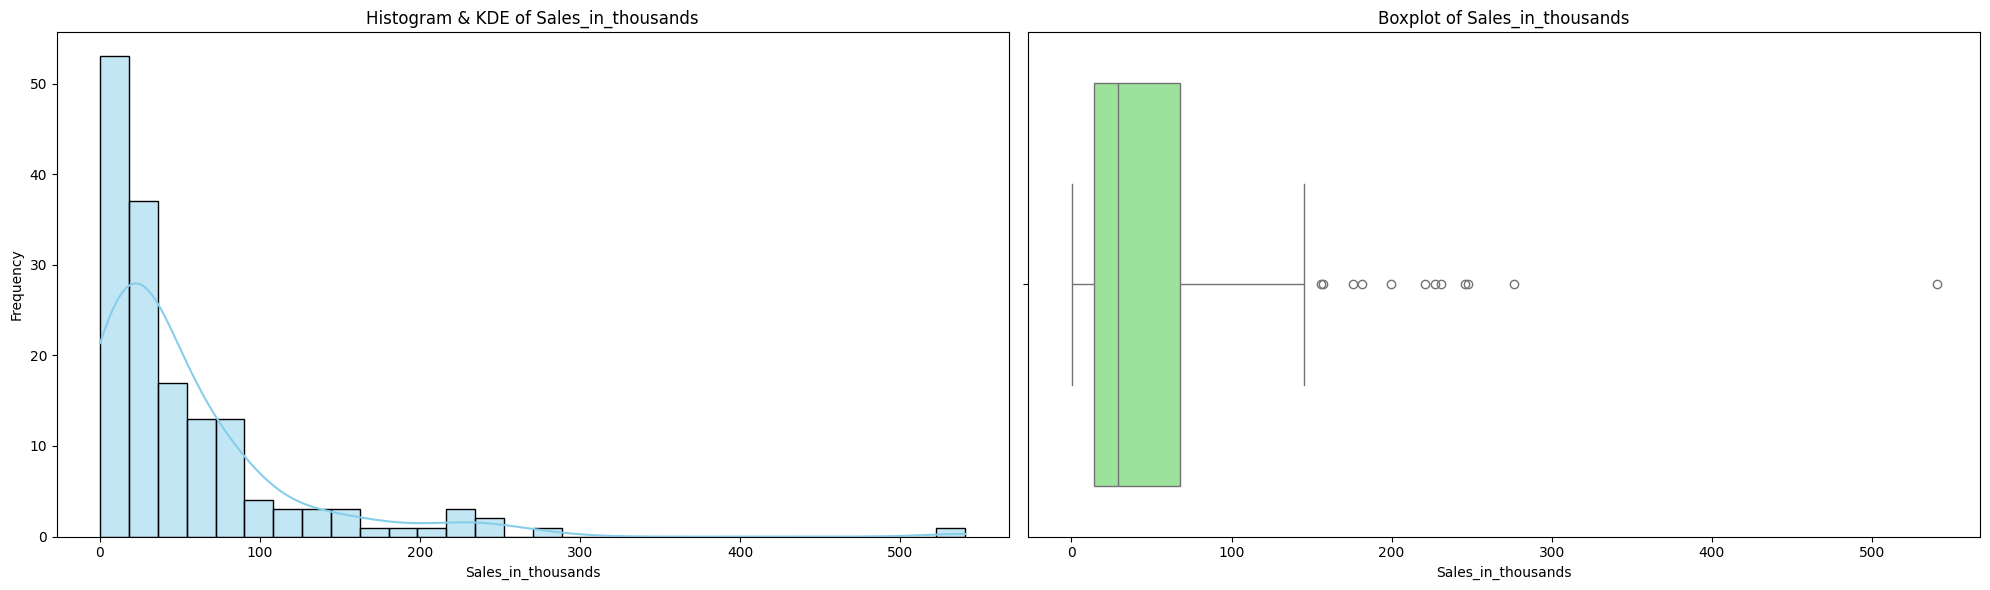


Column: Year_resale_value
Skewness: 2.08
Highly right-skewed


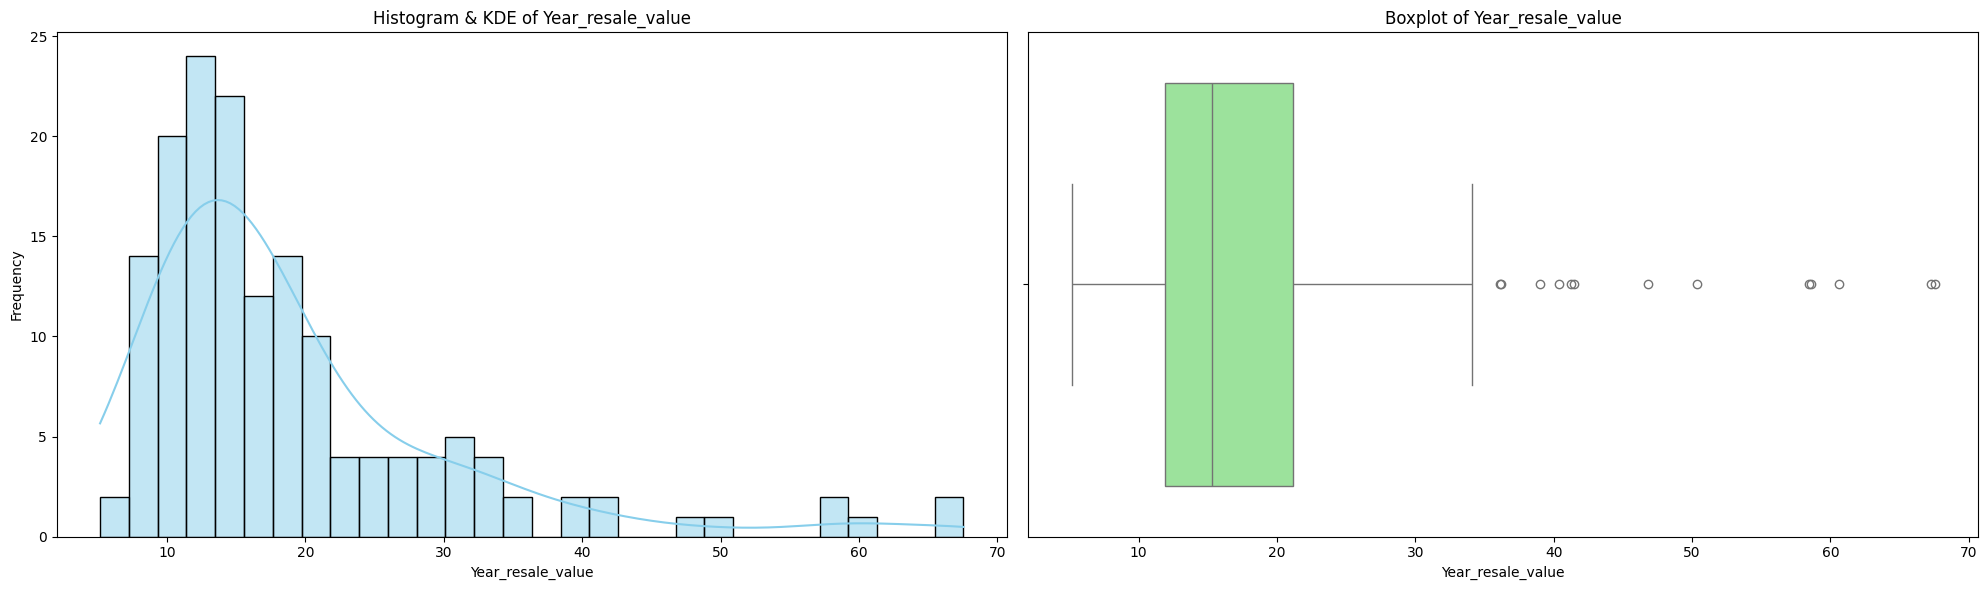


Column: Price_in_thousands
Skewness: 1.78
Highly right-skewed


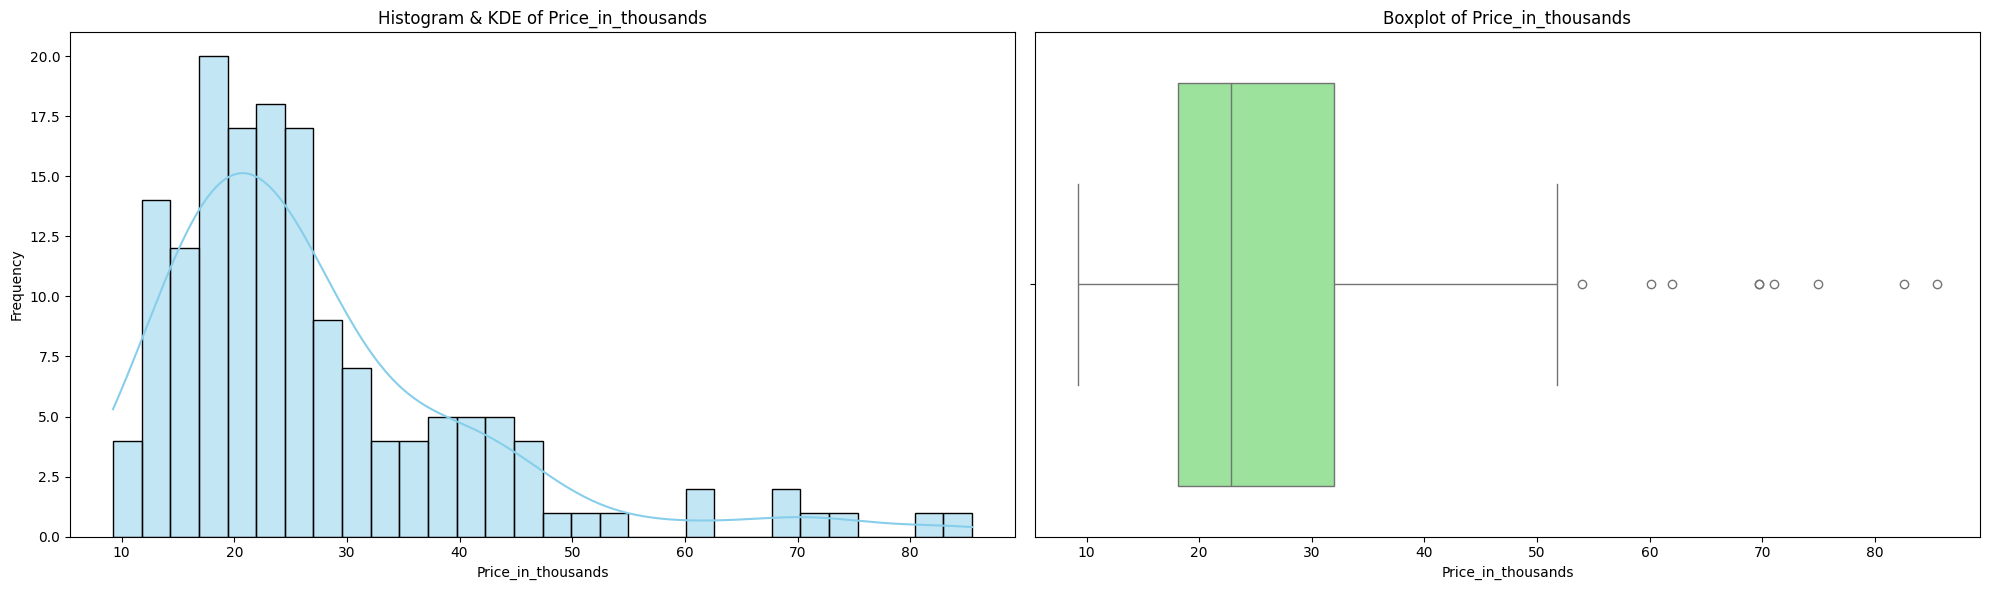


Column: Engine_size
Skewness: 1.10
Highly right-skewed


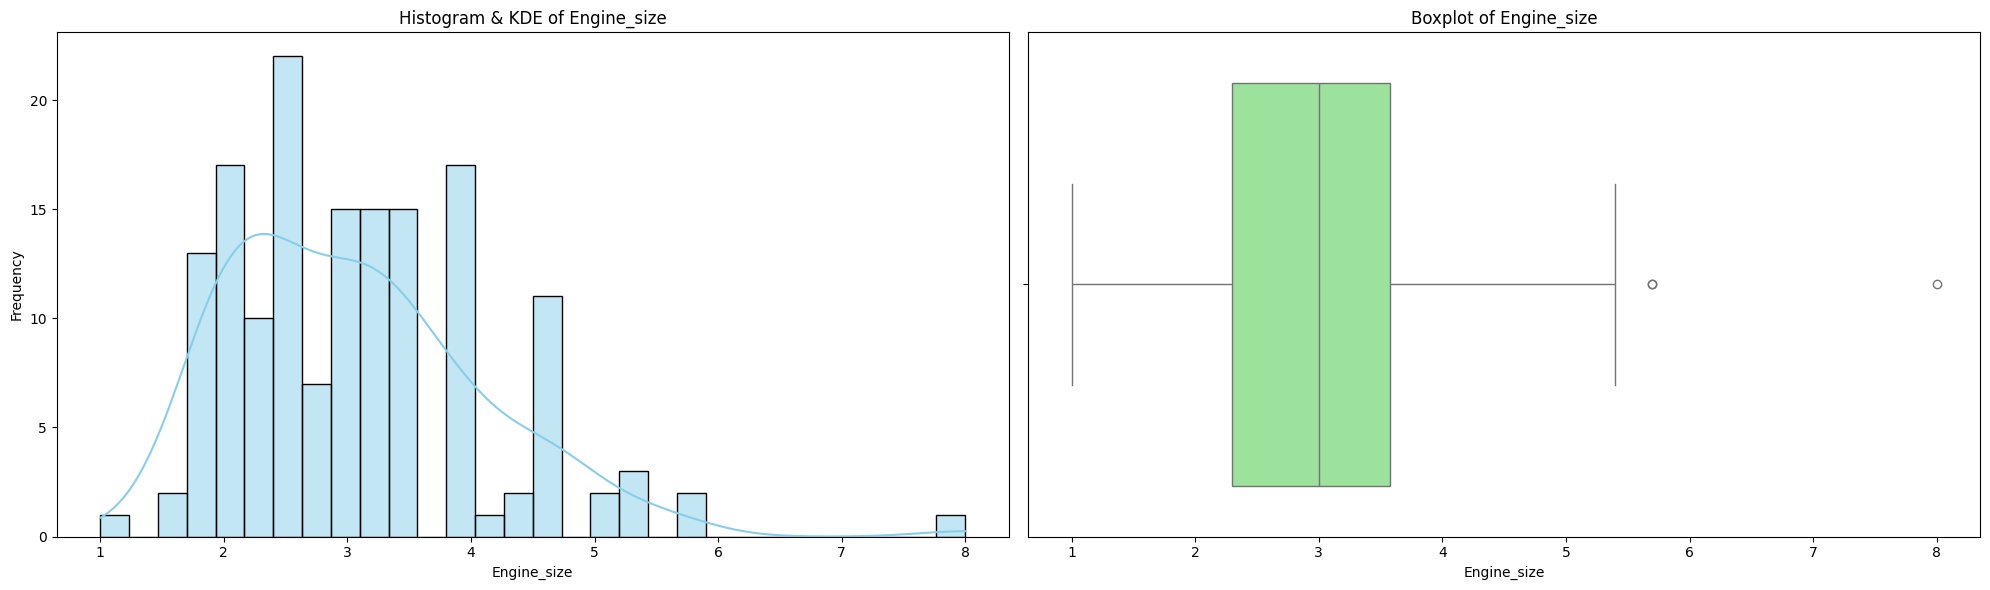


Column: Horsepower
Skewness: 1.00
Highly right-skewed


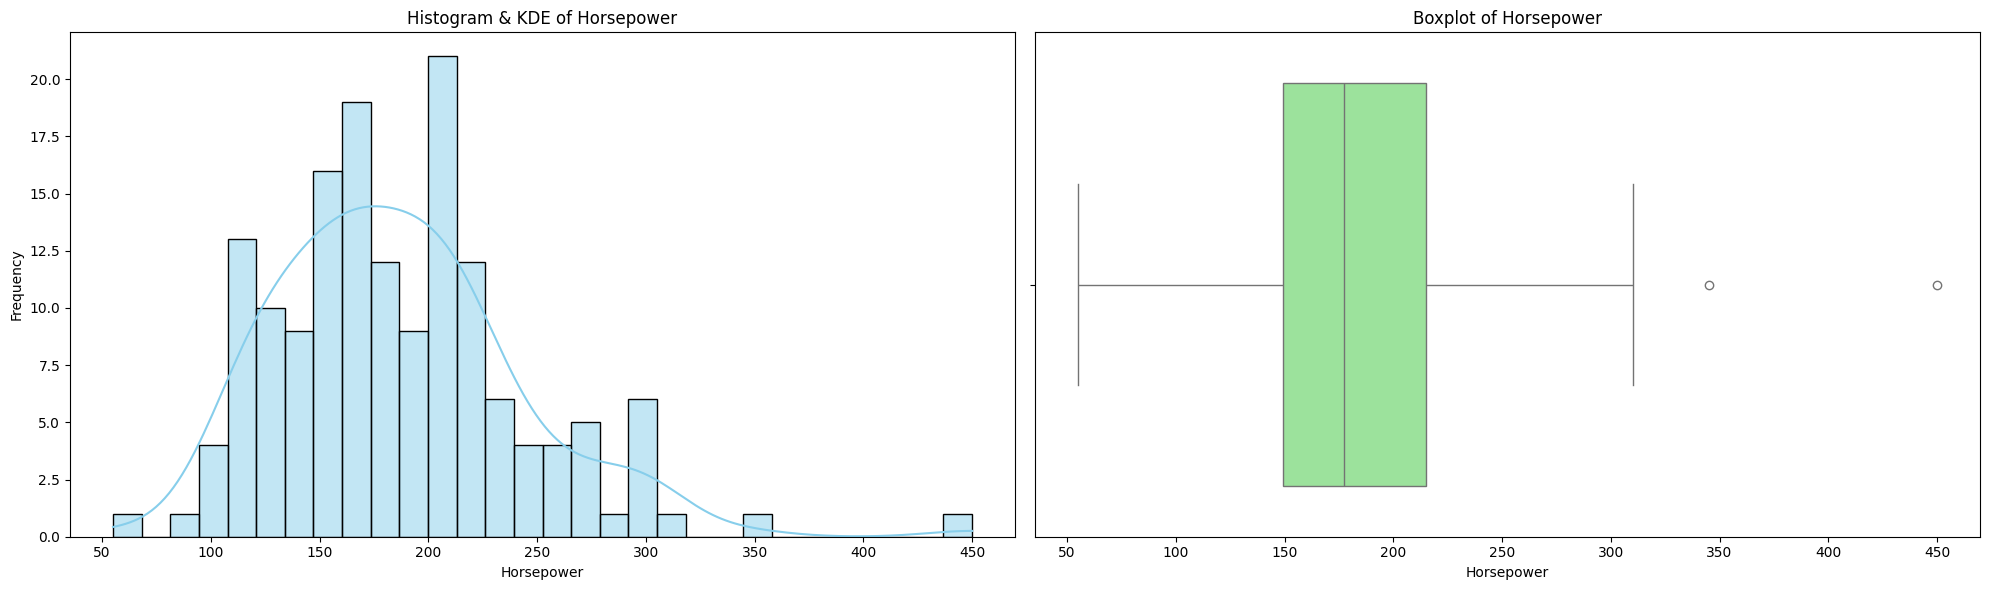


Column: Wheelbase
Skewness: 0.97
Moderately right-skewed


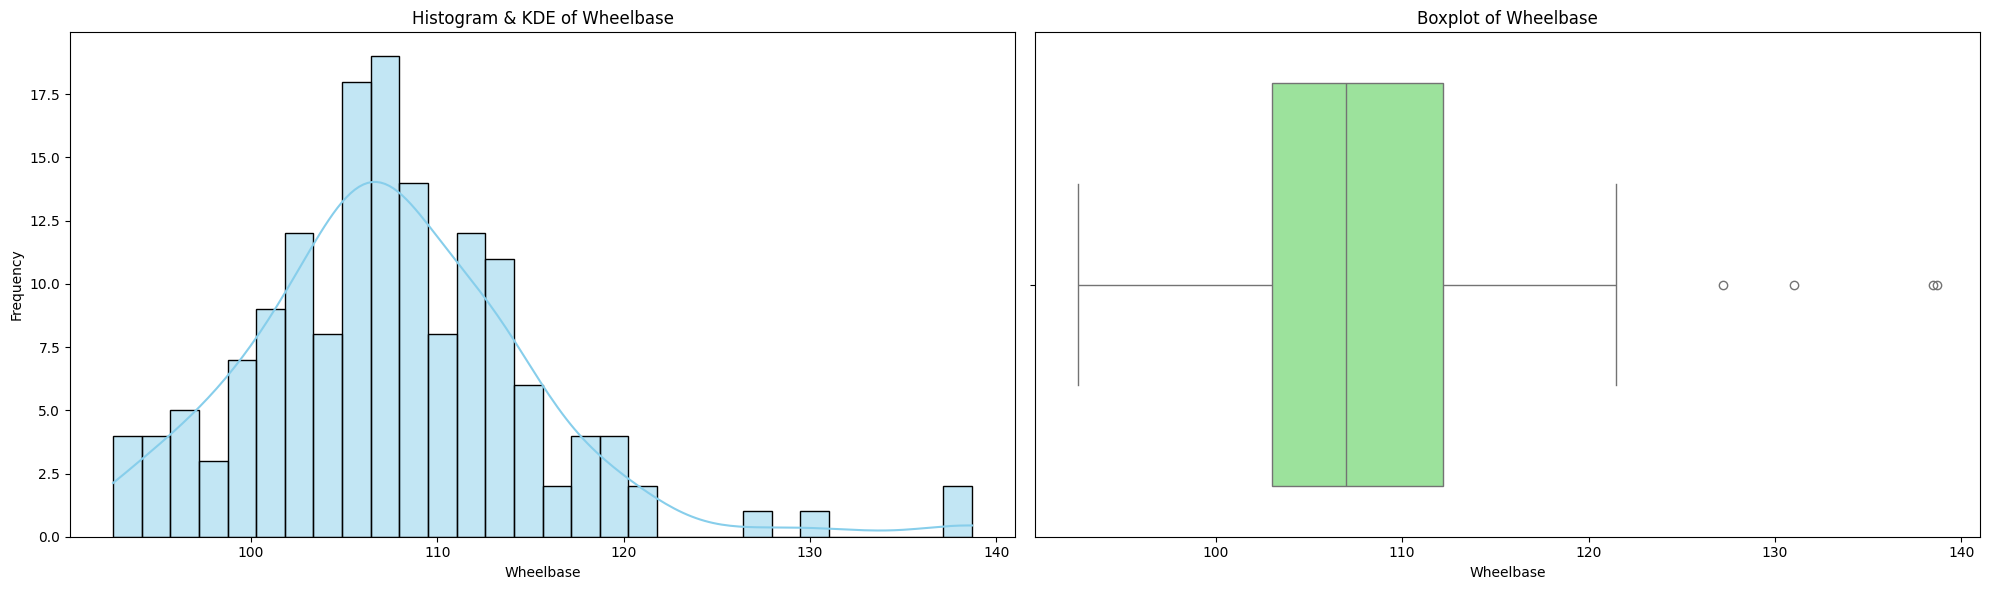


Column: Width
Skewness: 0.48
Approximately symmetric


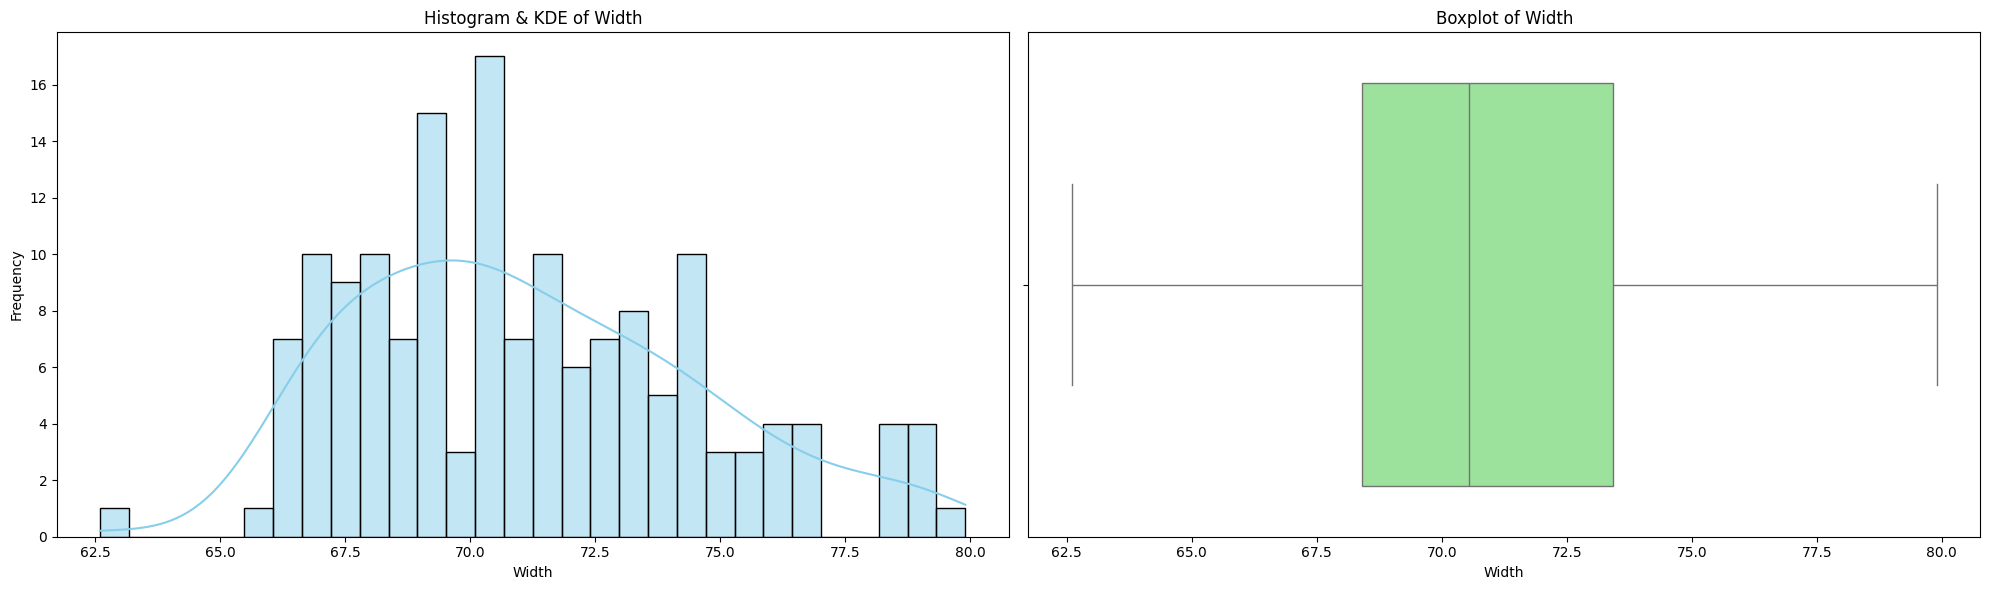


Column: Length
Skewness: -0.06
Approximately symmetric


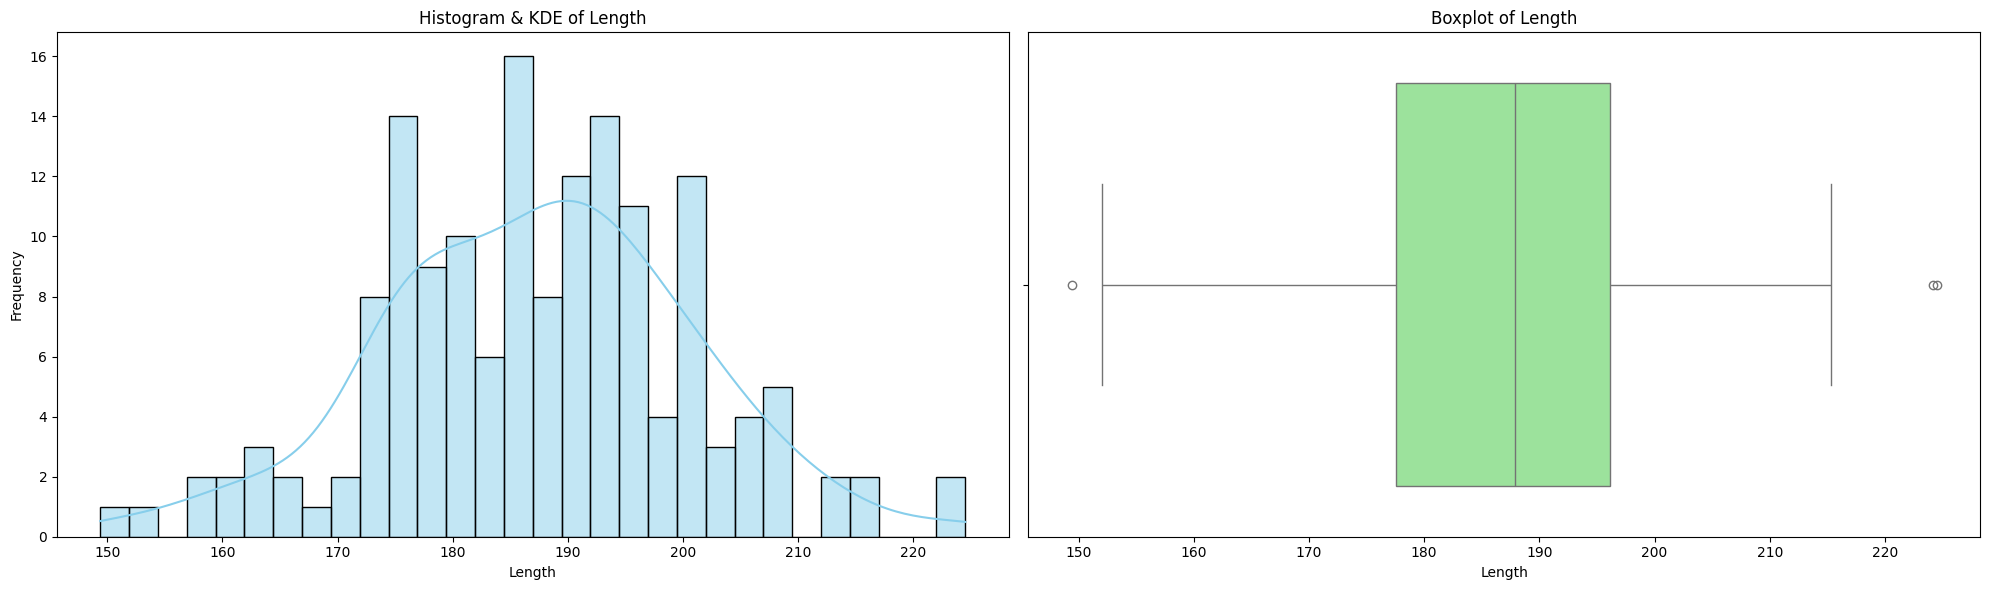


Column: Curb_weight
Skewness: 0.71
Moderately right-skewed


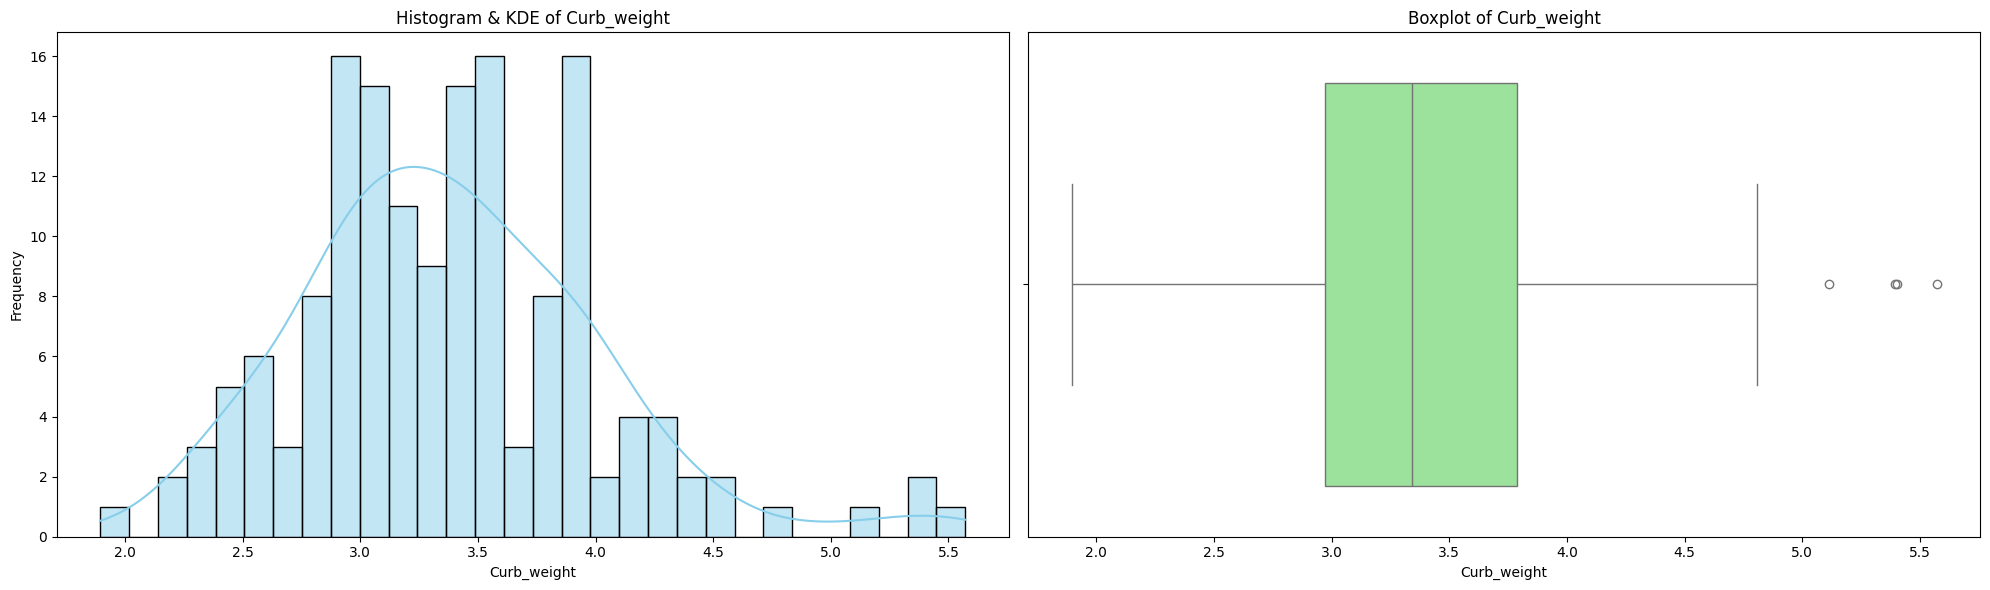


Column: Fuel_capacity
Skewness: 1.14
Highly right-skewed


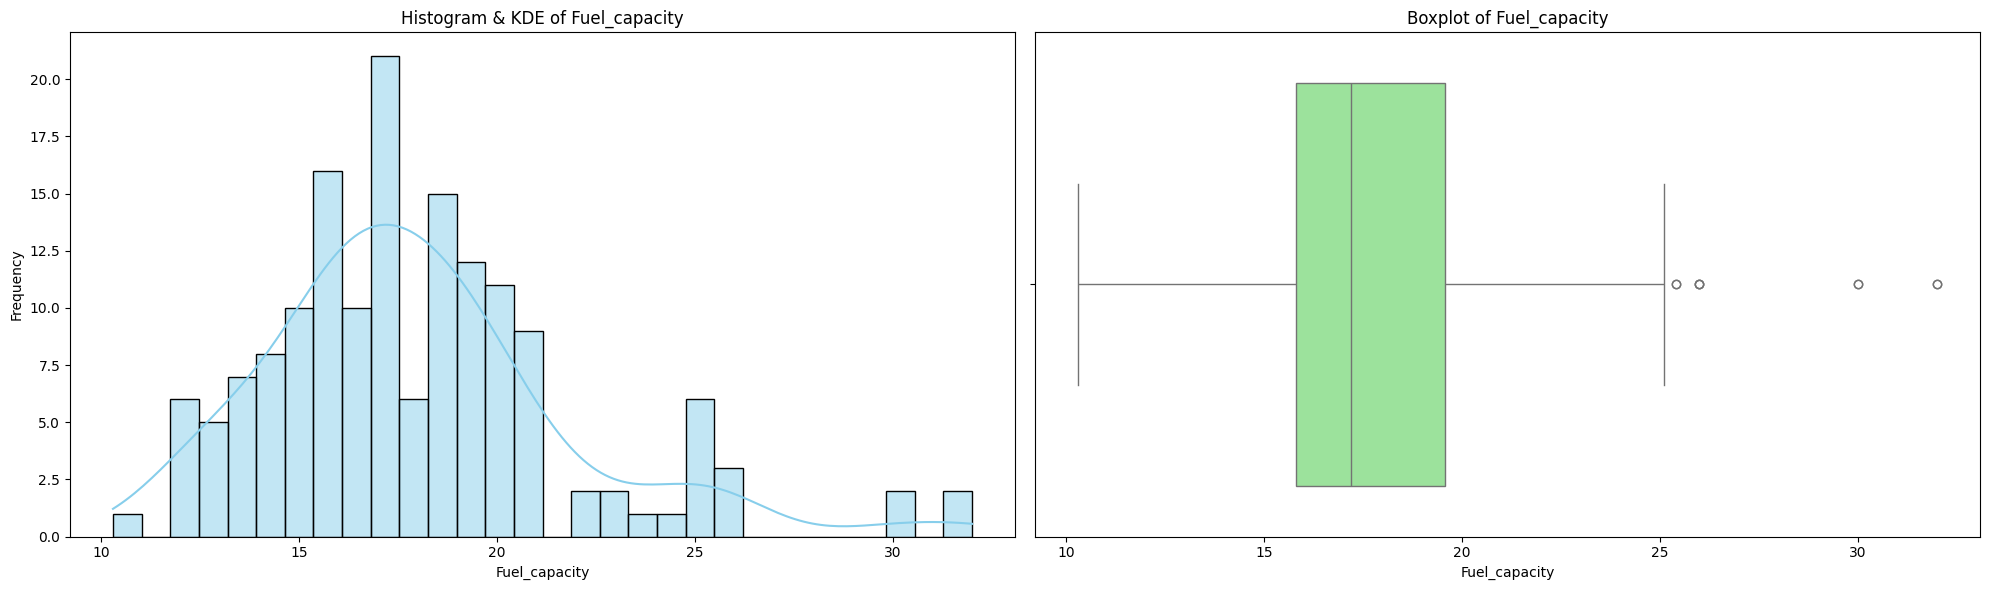


Column: Fuel_efficiency
Skewness: 0.70
Moderately right-skewed


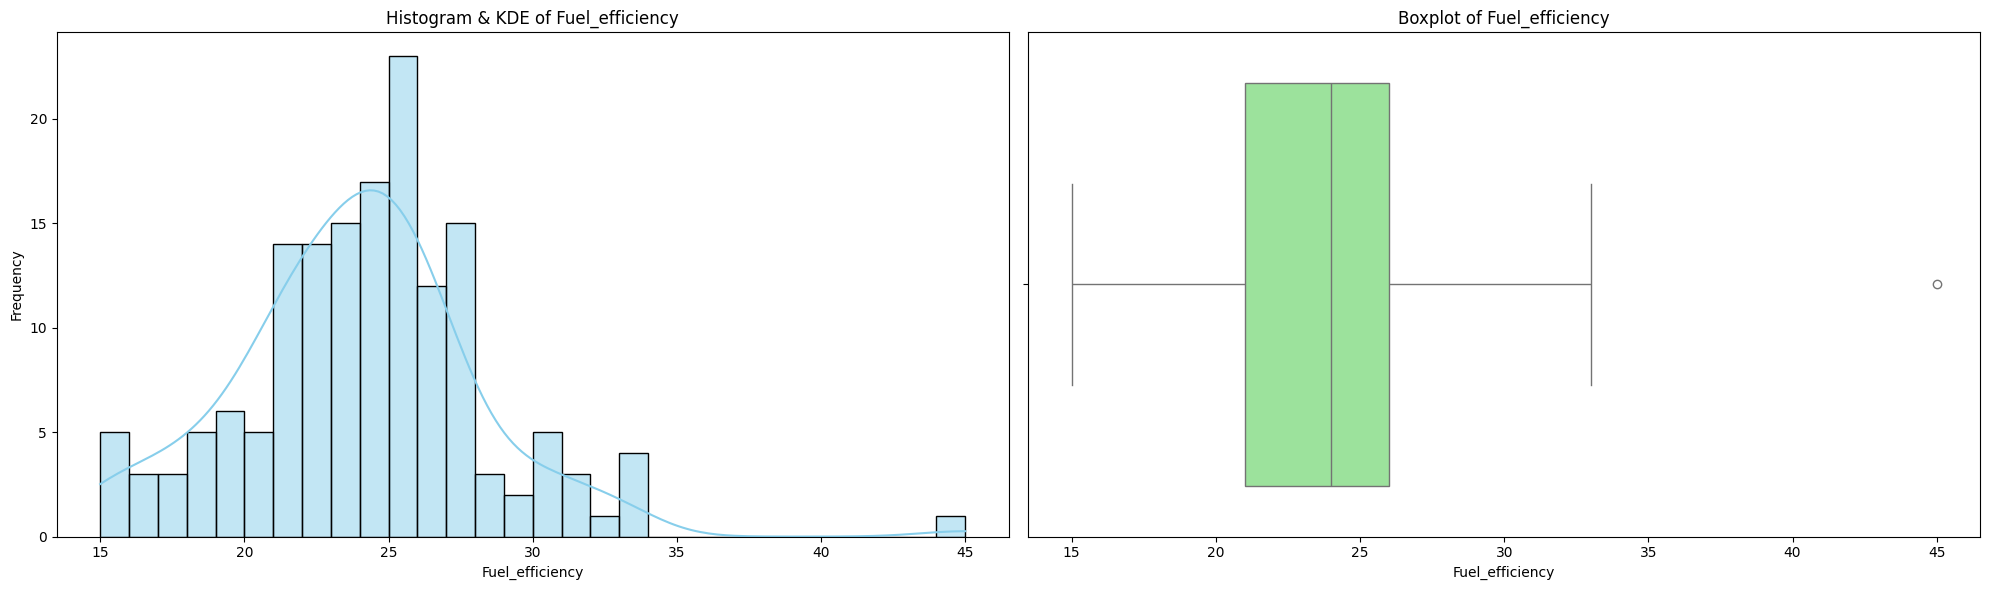


Column: Power_perf_factor
Skewness: 1.08
Highly right-skewed


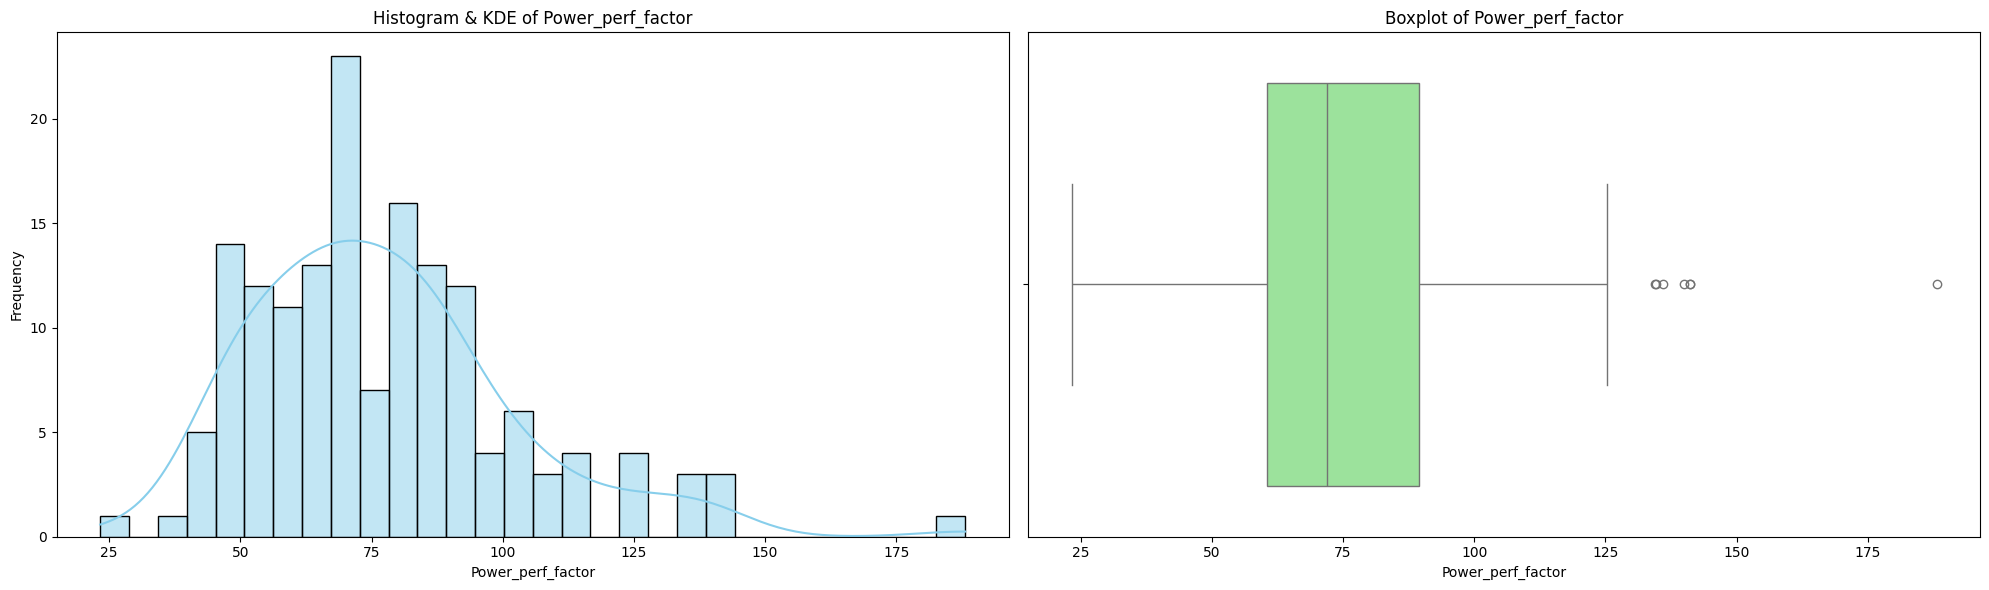

In [15]:
# Univariate Analysis - Numeric Columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    skewness = df[col].skew()
    print(f'\nColumn: {col}')
    print(f'Skewness: {skewness:.2f}')
    
    if skewness > 1:
        print('Highly right-skewed')
    elif skewness > 0.5:
        print('Moderately right-skewed')
    elif skewness < -1:
        print('Highly left-skewed')
    elif skewness < -0.5:
        print('Moderately left-skewed')
    else:
        print('Approximately symmetric')
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


Column: Manufacturer


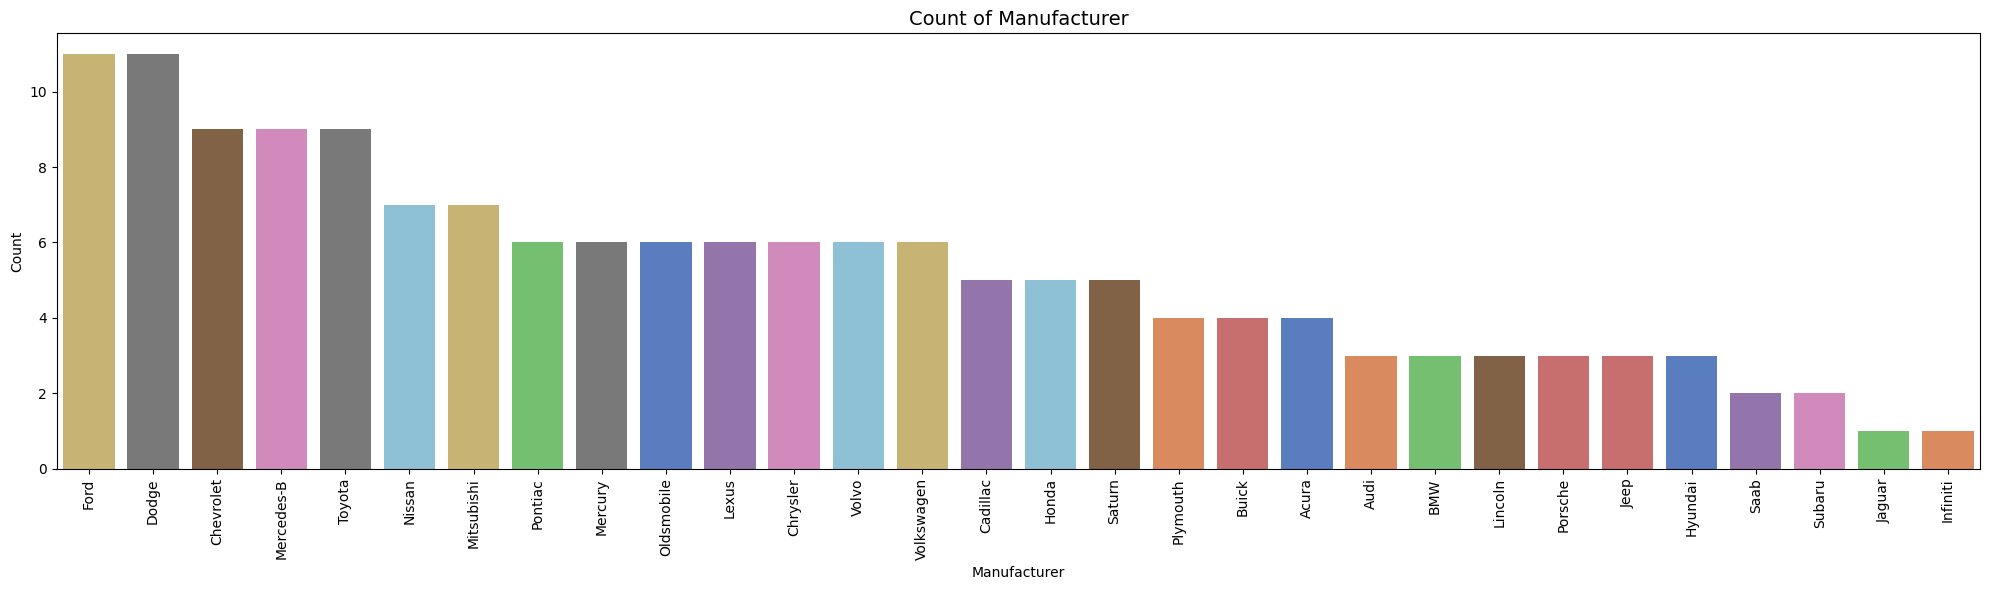


Column: Model


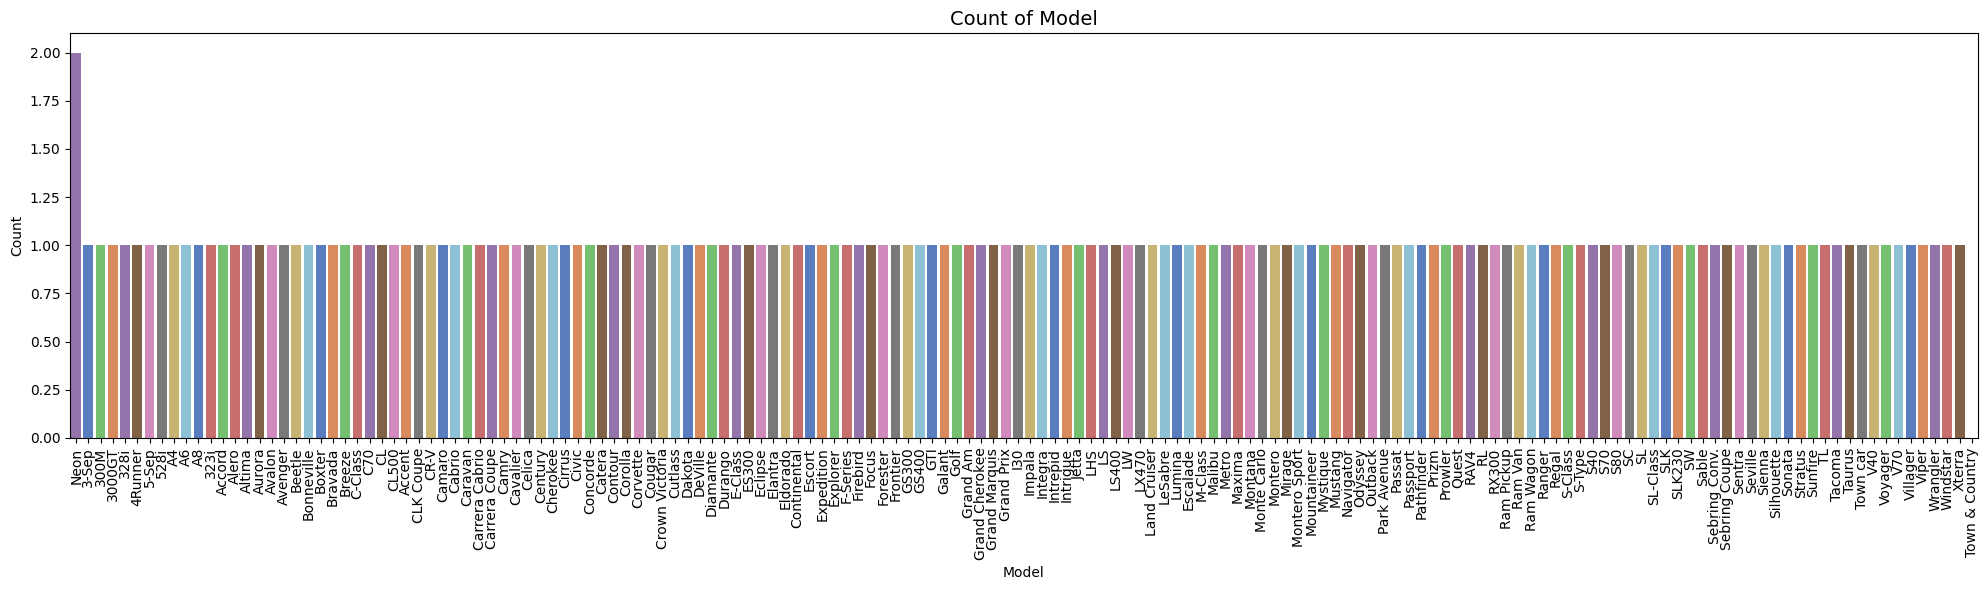


Column: Vehicle_type


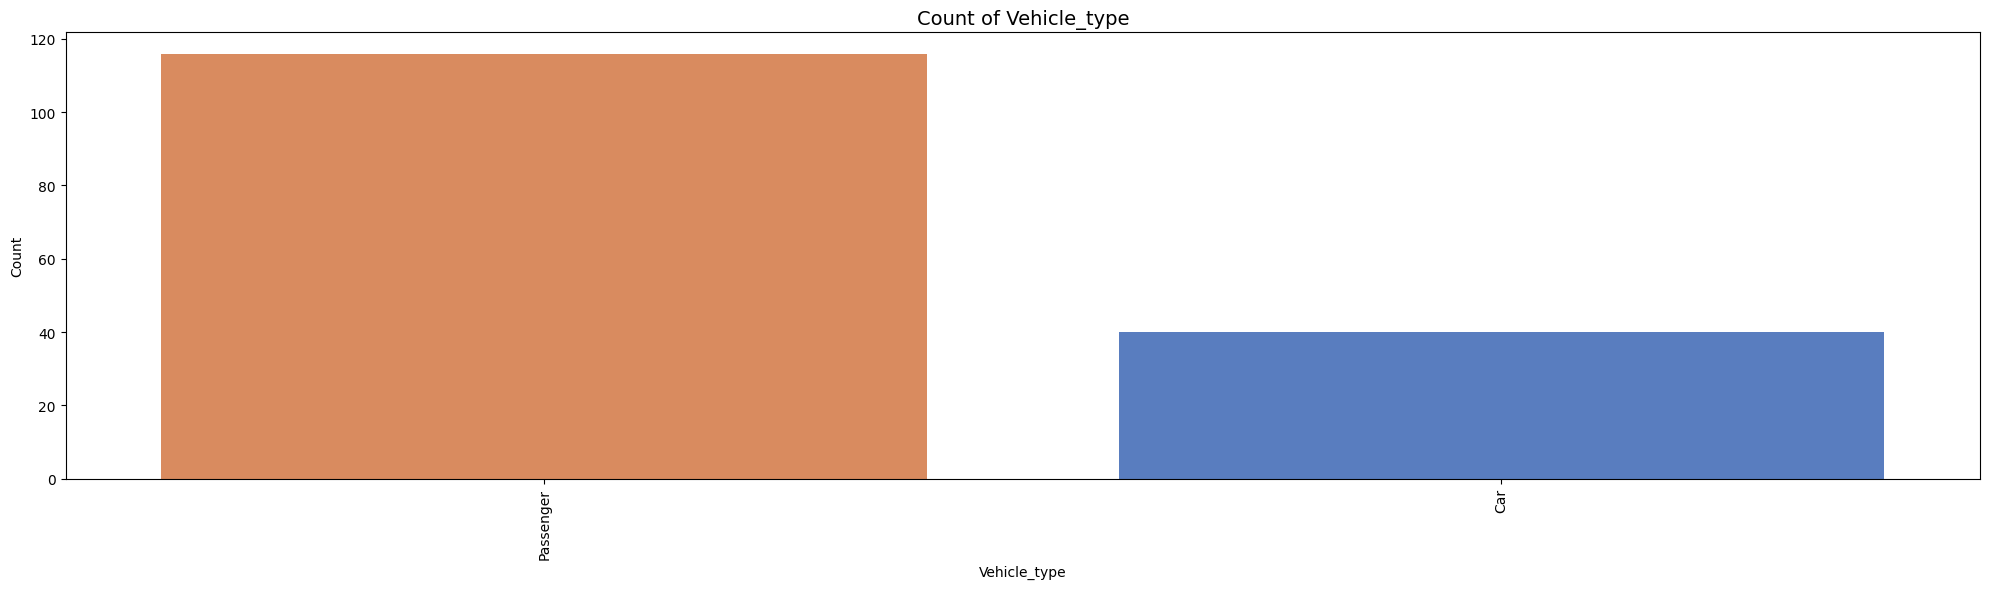

In [16]:
# Univariate Analysis - Categorical Feature
cat_cols = df.select_dtypes(include=['category']).columns

for col in cat_cols:
    print(f'\nColumn: {col}')
    plt.figure(figsize=(20,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted', hue=col, dodge=False)
    plt.title(f'Count of {col}', fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Price Analysis

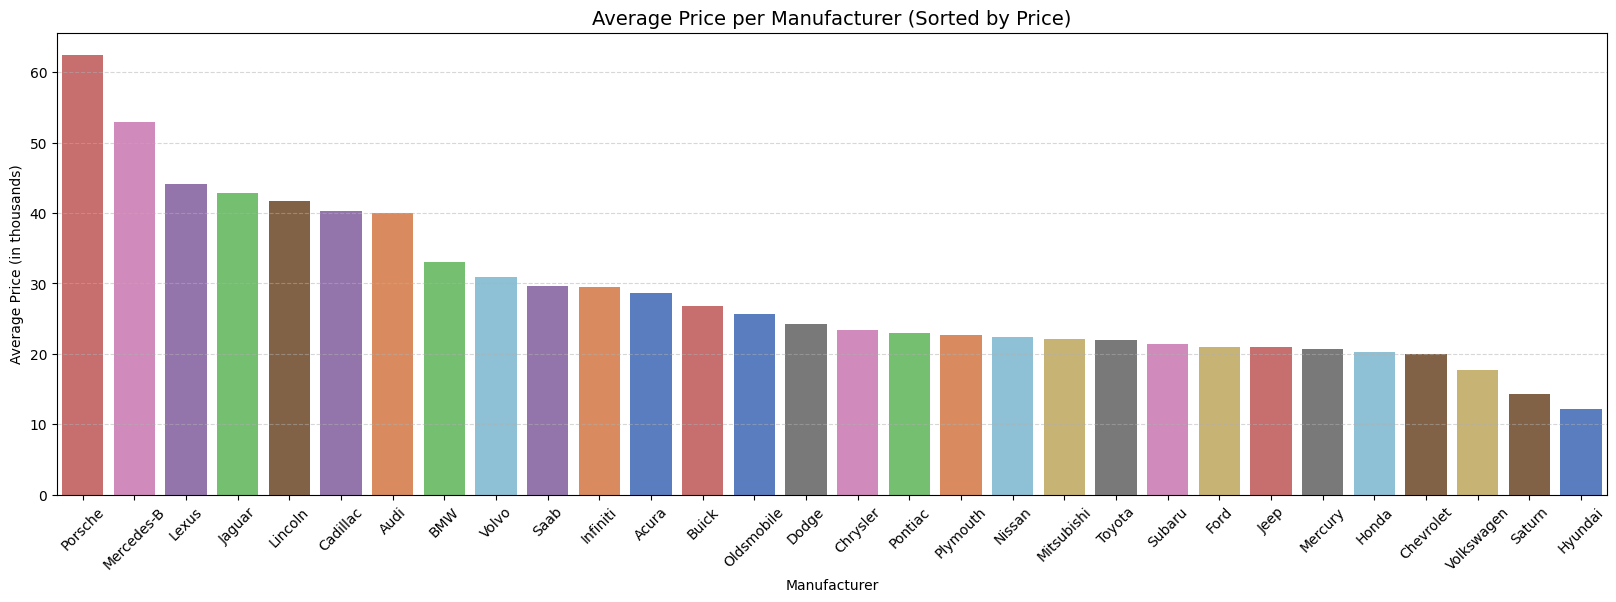

In [17]:
# Which manufacturer commands the highest average selling price?

manufacturer_price_df = (df.groupby('Manufacturer', observed=True)['Price_in_thousands']
                         .mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_price_df['Manufacturer']

plt.figure(figsize=(20,6))
sns.barplot(data=manufacturer_price_df, x='Manufacturer', y='Price_in_thousands', order=manufacturer_order_list,
            hue='Manufacturer', legend=False, palette='muted',dodge=False)

plt.xticks(rotation=45)
plt.title('Average Price per Manufacturer (Sorted by Price)', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

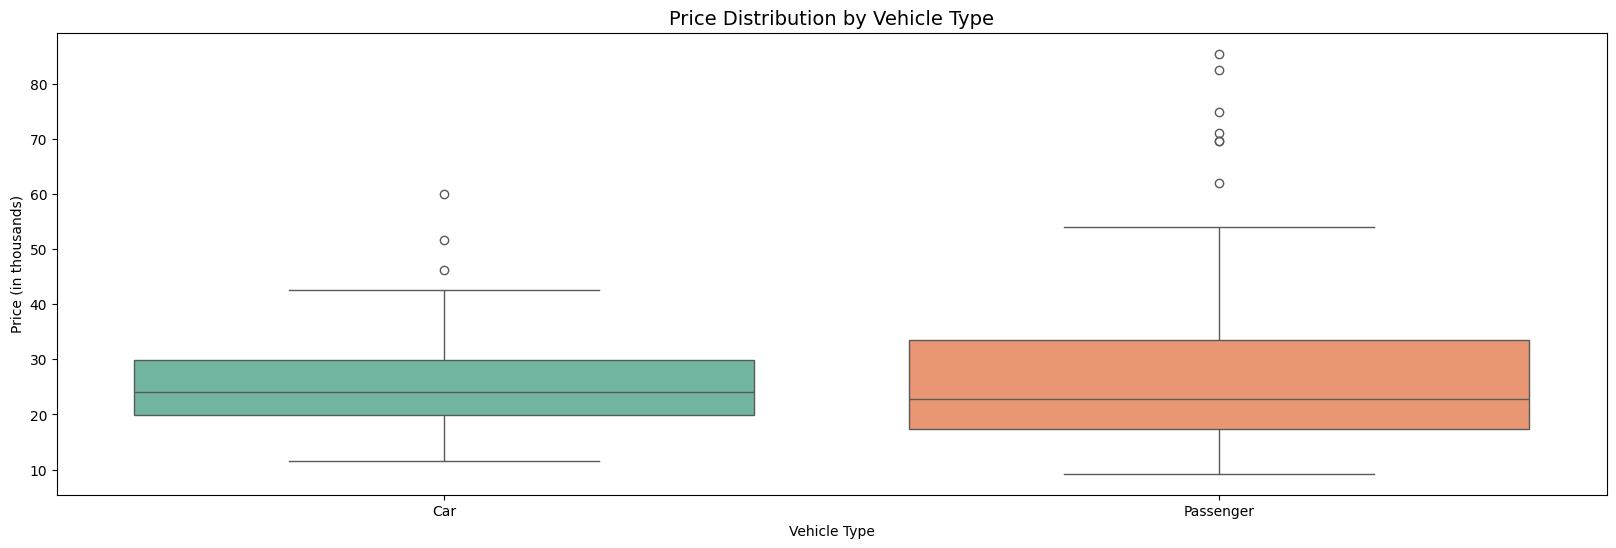

In [18]:
# Which vehicle type tend to be more expensive or have wider price variability?

plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Vehicle_type', y='Price_in_thousands', hue='Vehicle_type', palette='Set2');
plt.title('Price Distribution by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Price (in thousands)')
plt.show()

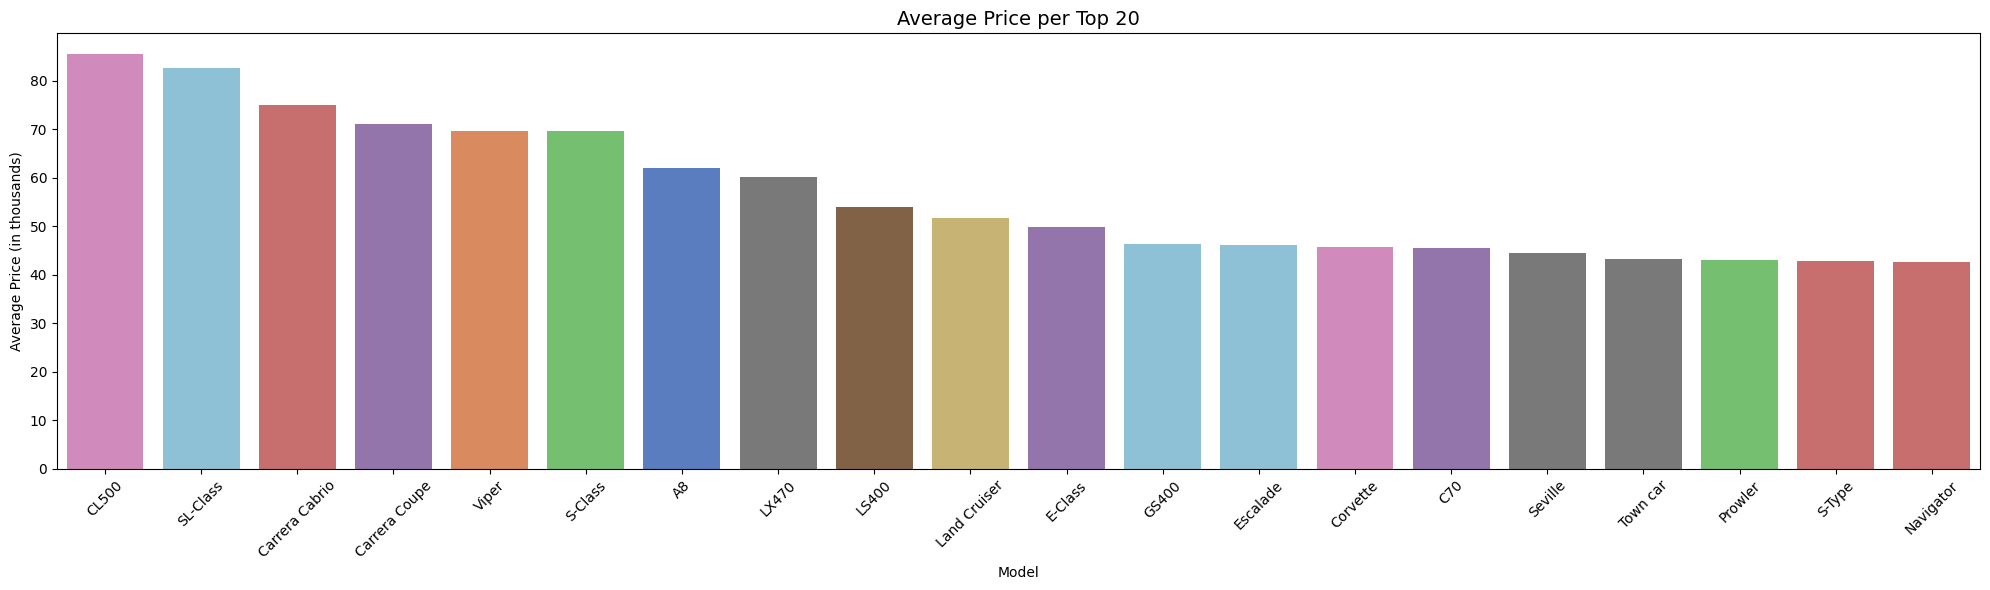

In [19]:
# TOP models which commands the highest average selling price?

TOP_N_MODELS = 20

model_price_df = (df.groupby('Model', observed=True)['Price_in_thousands']
                  .mean().sort_values(ascending=False).reset_index())
top_models_df = model_price_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(data=top_models_df, x='Model', y='Price_in_thousands', hue='Model', 
            order=model_order_list, palette='muted', dodge=False)

plt.xticks(rotation=45)
plt.title(f'Average Price per Top {TOP_N_MODELS}', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Price (in thousands)')
plt.tight_layout()
plt.show()

-- Selected price-driving features: ['Year_resale_value', 'Engine_size', 'Horsepower', 'Power_perf_factor']


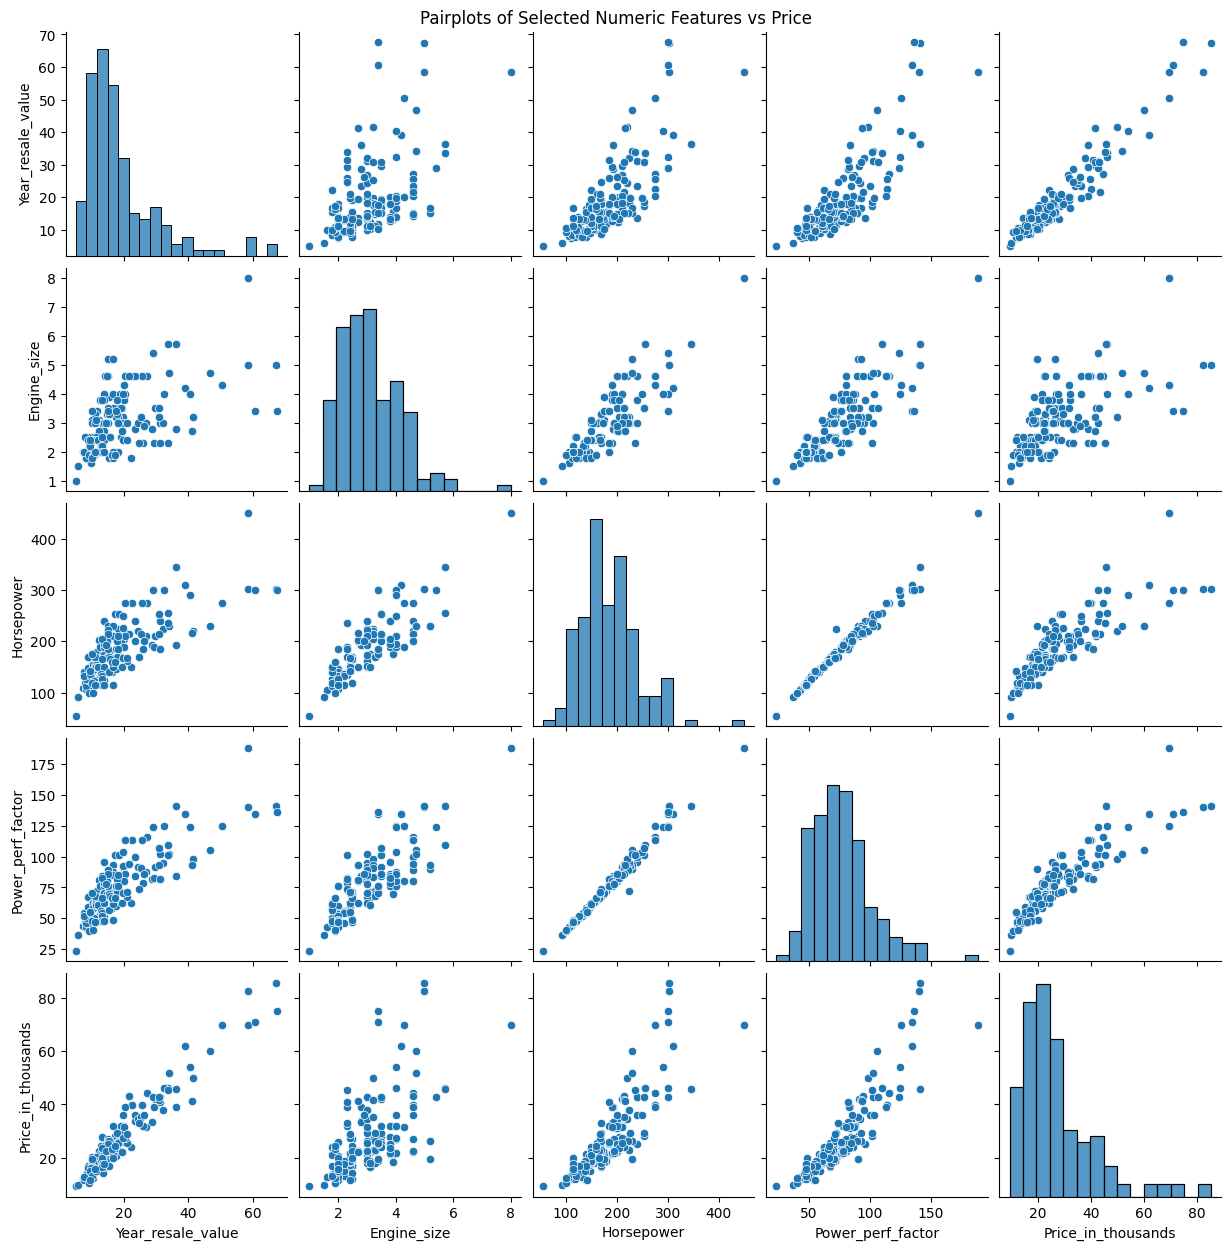

In [20]:
# Which car features most strongly influence price?

corr_matrix = df[numeric_cols].corr().round(1) 

# Extract correlations with Price
price_corr = corr_matrix["Price_in_thousands"].drop("Price_in_thousands")

# Select features with |correlation| >= 0.6
selected_price_features = price_corr[price_corr.abs() >= 0.6].index.tolist()
print("-- Selected price-driving features:", selected_price_features)

# Pairplot of selected features + Price
sns.pairplot(df[selected_price_features + ['Price_in_thousands']])
plt.suptitle('Pairplots of Selected Numeric Features vs Price', y=1)
plt.show()

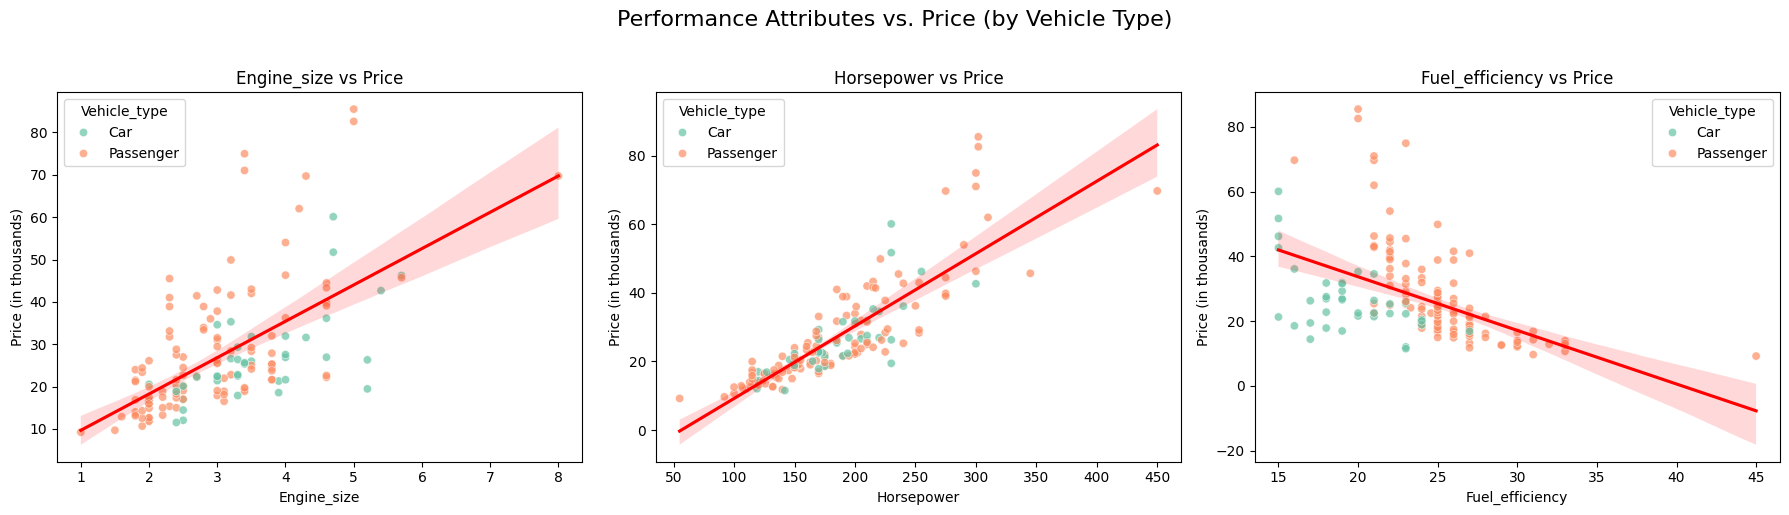

In [21]:
# Do more powerful cars command higher prices?

performance = ['Engine_size', 'Horsepower', 'Fuel_efficiency']

# Check if Vehicle_type column exists for hue
hue_col = 'Vehicle_type' if 'Vehicle_type' in df.columns else None

n_perf = len(performance)
n_cols = 3
n_rows = (n_perf + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

idx = 0
for feature in performance:
    sns.scatterplot(data=df, x=feature, y='Price_in_thousands', hue=hue_col, alpha=0.7, palette='Set2',ax=axes[idx])
    sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ax=axes[idx])
    axes[idx].set_title(f"{feature} vs Price", fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Price (in thousands)')
    idx += 1

# Remove unused subplots
while idx < len(axes):
    fig.delaxes(axes[idx])
    idx += 1

plt.suptitle('Performance Attributes vs. Price (by Vehicle Type)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

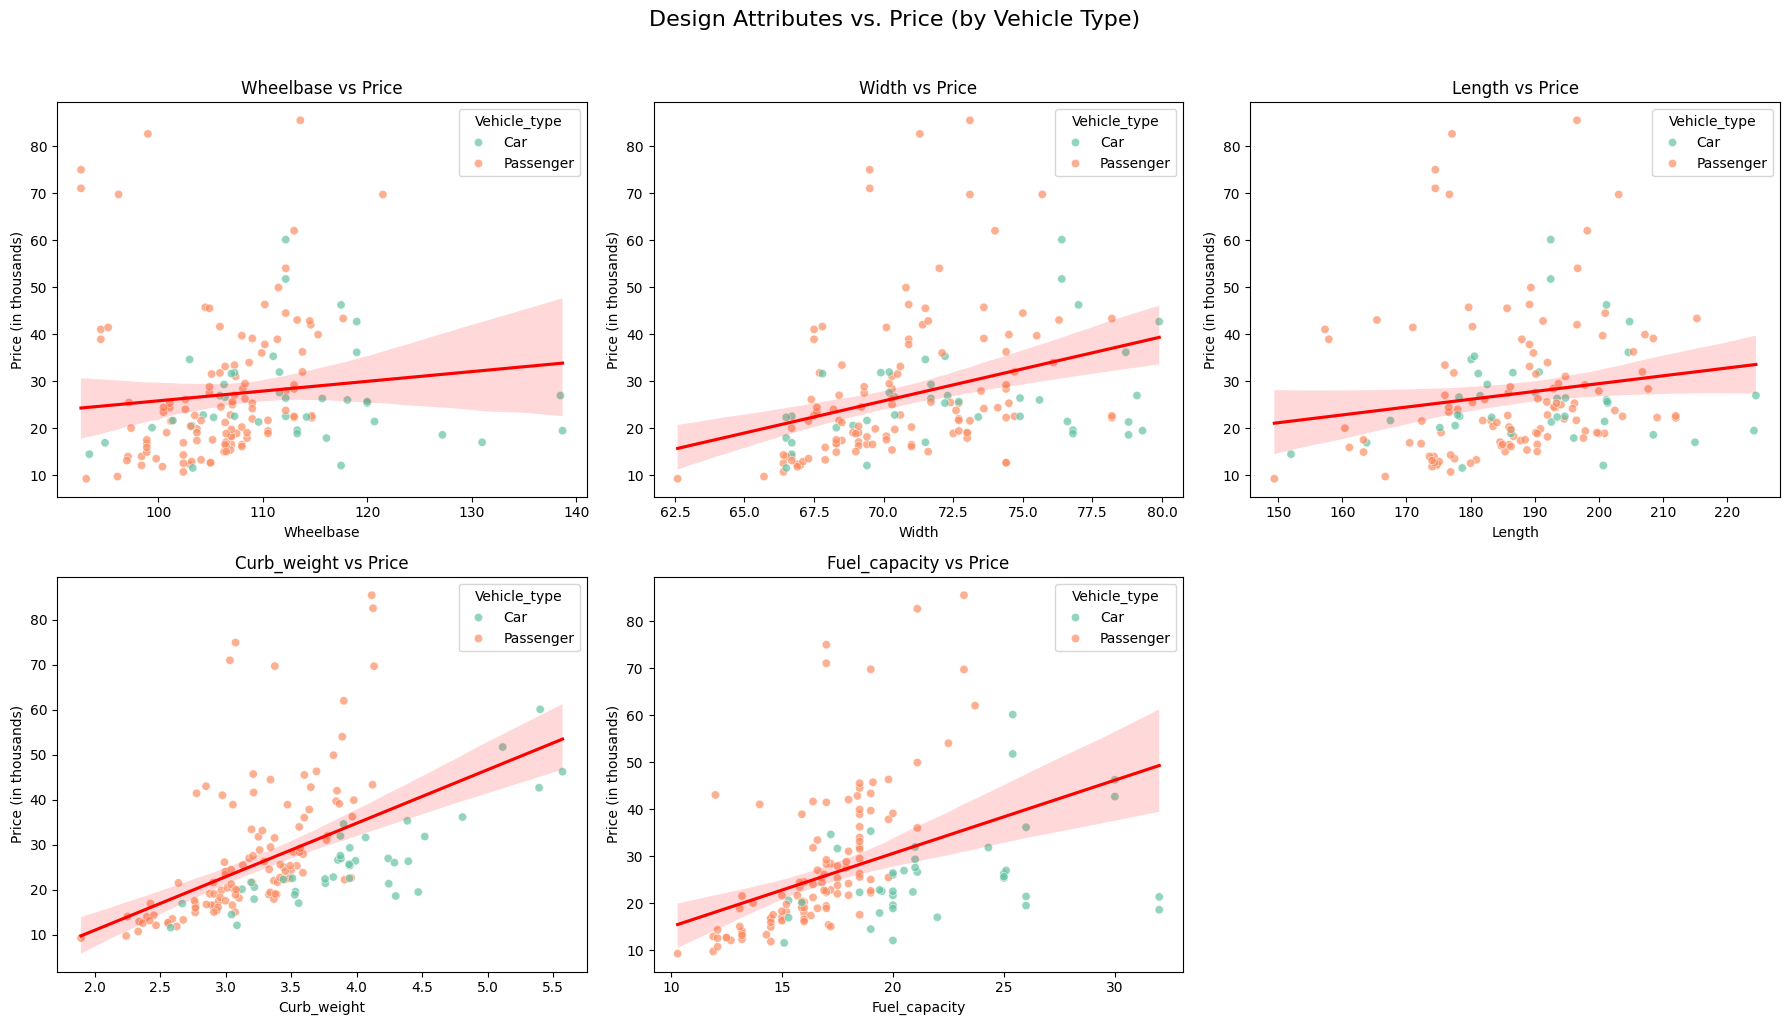

In [ ]:
# Does the design attrubutes affaect the car price?

design = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity']

n_design = len(design)
n_cols = 3
n_rows = (n_design + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()  # Flatten for easy indexing

idx = 0
for feature in design:
    sns.scatterplot(data=df, x=feature, y='Price_in_thousands',hue=hue_col, alpha=0.7, palette='Set2', ax=axes[idx])
    sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Price', fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Price (in thousands)')
    idx += 1

# Remove unused subplots
while idx < len(axes):
    fig.delaxes(axes[idx])
    idx += 1

plt.suptitle('Design Attributes vs. Price (by Vehicle Type)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Regression & Feature Importance (Price + Sales)

Price Segmentation & Clustering

Price Segment Distribution

# Car Sales Analysis (Categorical Features)

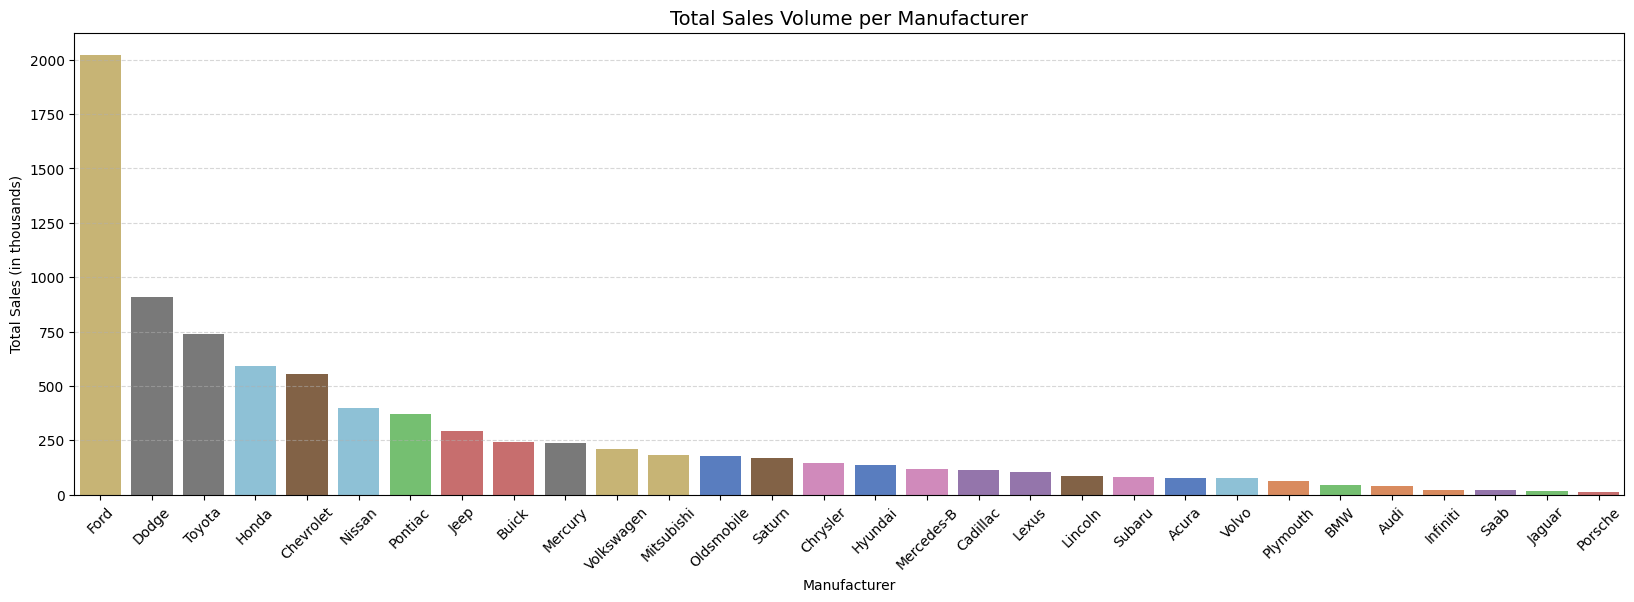

In [23]:
# Which car manufacturers dominate the sales volume?

plt.figure(figsize=(20,6))
manufacturer_sales_df = (df.groupby('Manufacturer', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_sales_df['Manufacturer']

# Plotting the PRE-SORTED DataFrame with explicit order
sns.barplot(
    data=manufacturer_sales_df,
    x="Manufacturer",
    y="Sales_in_thousands",
    order=manufacturer_order_list, 
    hue="Manufacturer", 
    legend=False,
    palette='muted' 
)

plt.xticks(rotation=45)
plt.title("Total Sales Volume per Manufacturer", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

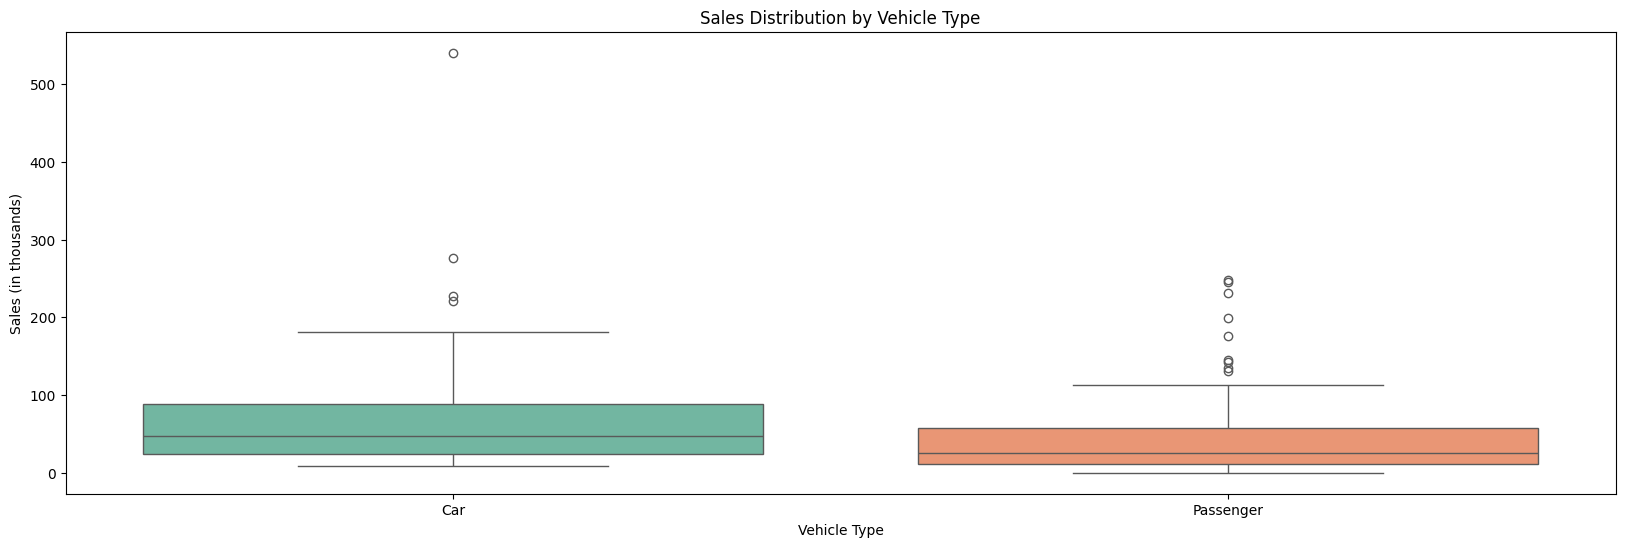

In [24]:
# Which types of vehicles sell the most?
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="Vehicle_type", y="Sales_in_thousands", hue="Vehicle_type", palette='Set2')
plt.title("Sales Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Sales (in thousands)")
plt.show()

<Figure size 2000x600 with 0 Axes>

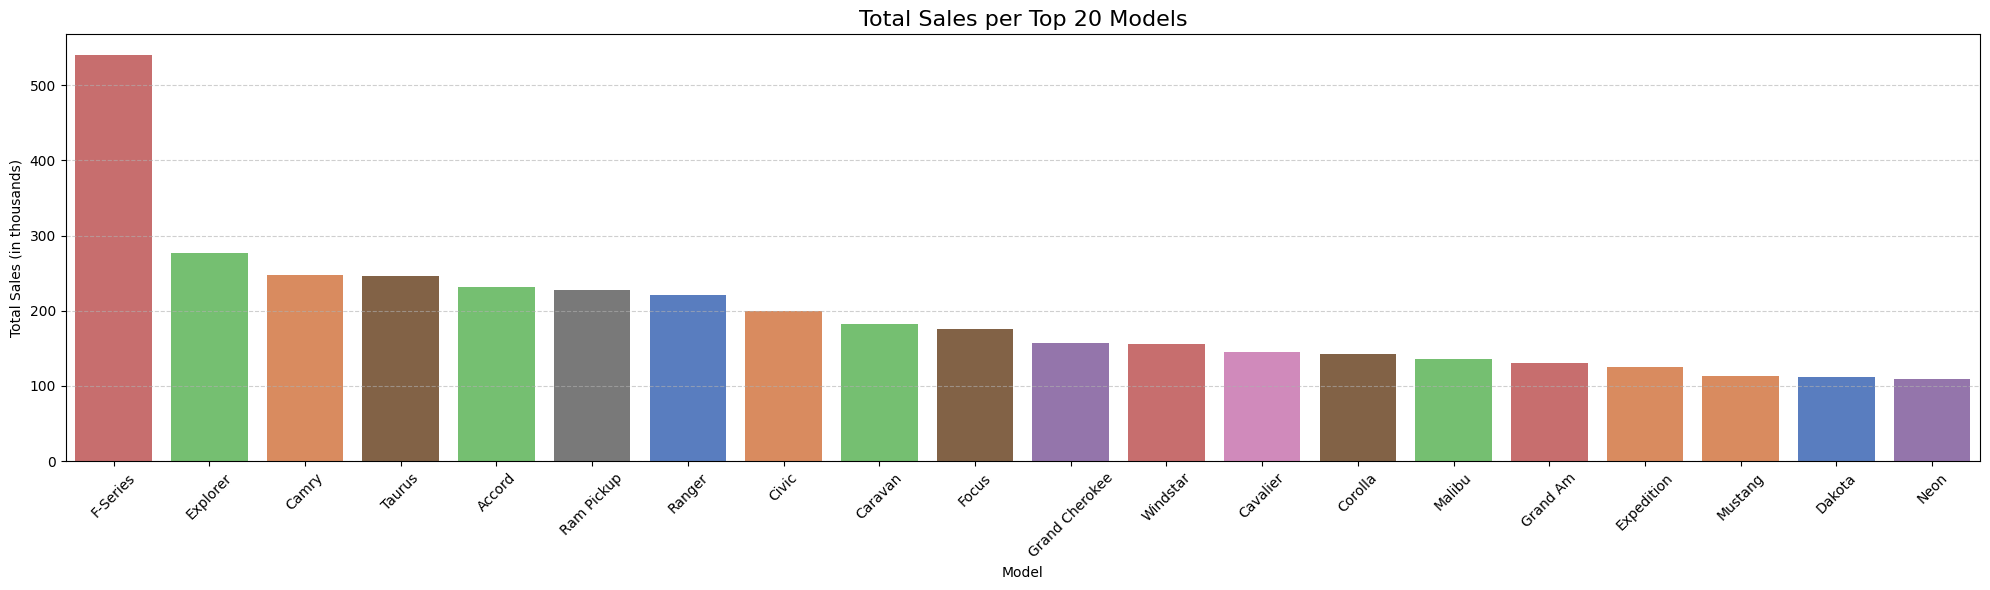

In [25]:
# Which TOP N model commands the highest sales?

TOP_N_MODELS = 20
plt.figure(figsize=(20,6))

# Aggregate and sort by average price
model_sales_df = (df.groupby('Model', observed=True)['Sales_in_thousands']
                         .sum().sort_values(ascending=False).reset_index())

# Select top N models
top_models_df = model_sales_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(
    data=top_models_df,
    x="Model",
    y="Sales_in_thousands",
    hue="Model",
    order=model_order_list,
    palette='muted',
    dodge=False
)

plt.xticks(rotation=45)
plt.title(f"Total Sales per Top {TOP_N_MODELS} Models", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Total Sales (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

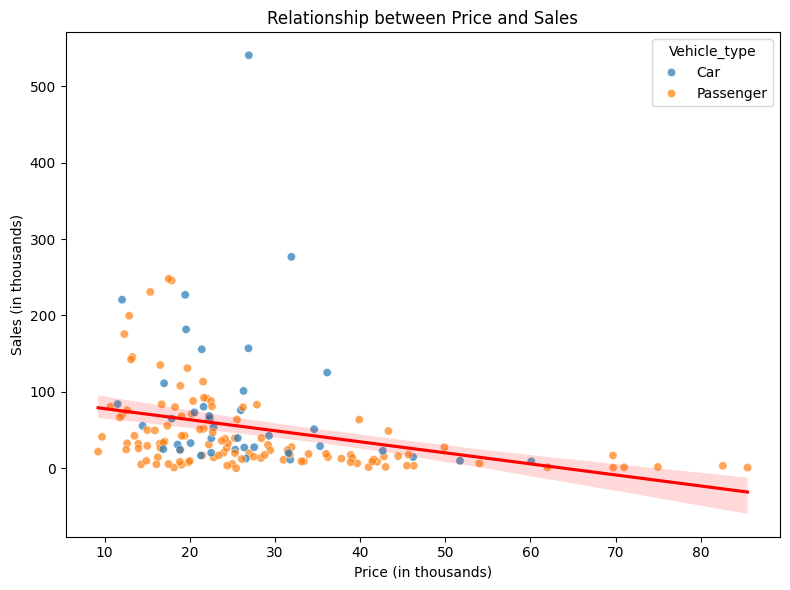

In [26]:
# How does car price influence sales volume?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', hue='Vehicle_type',alpha=0.7)
sns.regplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', scatter=False, color='red')
plt.title("Relationship between Price and Sales")
plt.xlabel("Price (in thousands)")
plt.ylabel("Sales (in thousands)")
plt.tight_layout()
plt.show()

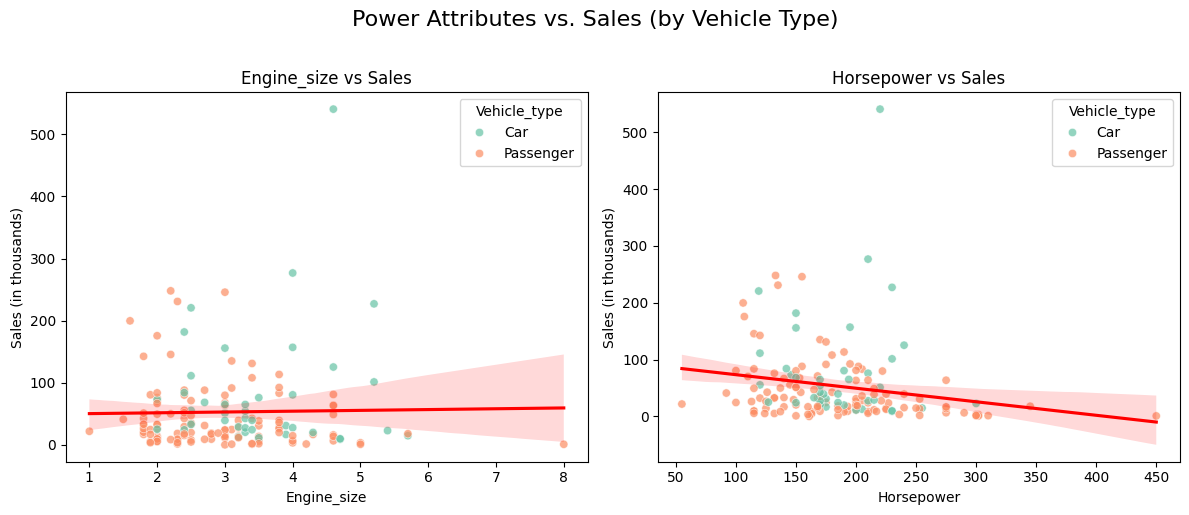

In [27]:
# Do cars with bigger engines or higher horsepower sell better?
power = ['Engine_size', 'Horsepower']
hue_col = 'Vehicle_type' if 'Vehicle_type' in df.columns else None

n_power = len(power)
n_cols = 2
n_rows = (n_power + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

idx = 0
for feature in power:
    sns.scatterplot(
        data=df,
        x=feature,
        y='Sales_in_thousands',
        hue=hue_col, 
        alpha=0.7,
        palette='Set2',
        ax=axes[idx]
    )

    sns.regplot(
        data=df,
        x=feature,
        y='Sales_in_thousands',
        scatter=False,
        color='red',
        ax=axes[idx]
    )

    axes[idx].set_title(f"{feature} vs Sales", fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Sales (in thousands)")
    idx += 1

# Remove unused subplots
while idx < len(axes):
    fig.delaxes(axes[idx])
    idx += 1

plt.suptitle("Power Attributes vs. Sales (by Vehicle Type)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Resales Analysis (Categorical Features)

In [28]:
# Compute Depreciation & Retention
df['Retention_Ratio'] = (df['Year_resale_value'] / df['Price_in_thousands']) * 100
df['Depreciation_Percentage'] = ((df['Price_in_thousands'] - df['Year_resale_value']) / df['Price_in_thousands']) * 100

avg_dep = df['Depreciation_Percentage'].mean()
avg_ret = df['Retention_Ratio'].mean()
print(f"Average Depreciation: {avg_dep:.1f}%")
print(f"Average Retention: {avg_ret:.1f}%\n")

Average Depreciation: 31.4%
Average Retention: 68.6%



In [29]:
# Average by vehicle type
type_summary = (
    df.groupby('Vehicle_type', observed=True)[['Depreciation_Percentage', 'Retention_Ratio']]
      .mean()
      .round(1)
)
print(type_summary)

              Depreciation_Percentage  Retention_Ratio
Vehicle_type                                          
Car                              31.5             68.5
Passenger                        31.3             68.7


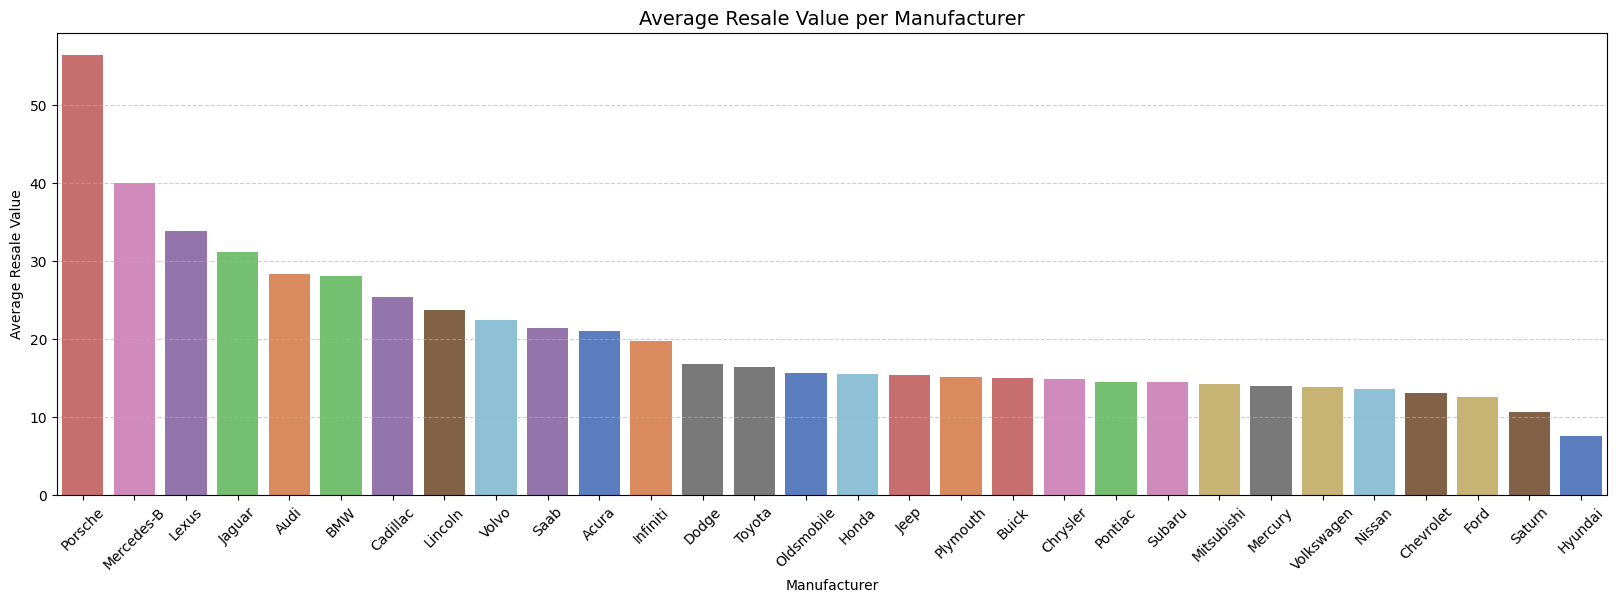

In [30]:
# Which manufacturers dominate the used car market in terms of resale performance?
plt.figure(figsize=(20,6))
manufacturer_resale_df = (df.groupby('Manufacturer', observed=True)['Year_resale_value']
                          .mean()
                          .sort_values(ascending=False).
                          reset_index()
                          )

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_resale_df['Manufacturer']
sns.barplot(
    data=manufacturer_resale_df,
    x="Manufacturer",
    y="Year_resale_value",
    order=manufacturer_order_list,
    hue="Manufacturer", 
    legend=False,
    palette='muted' 
)

plt.xticks(rotation=45)
plt.title("Average Resale Value per Manufacturer", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Resale Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

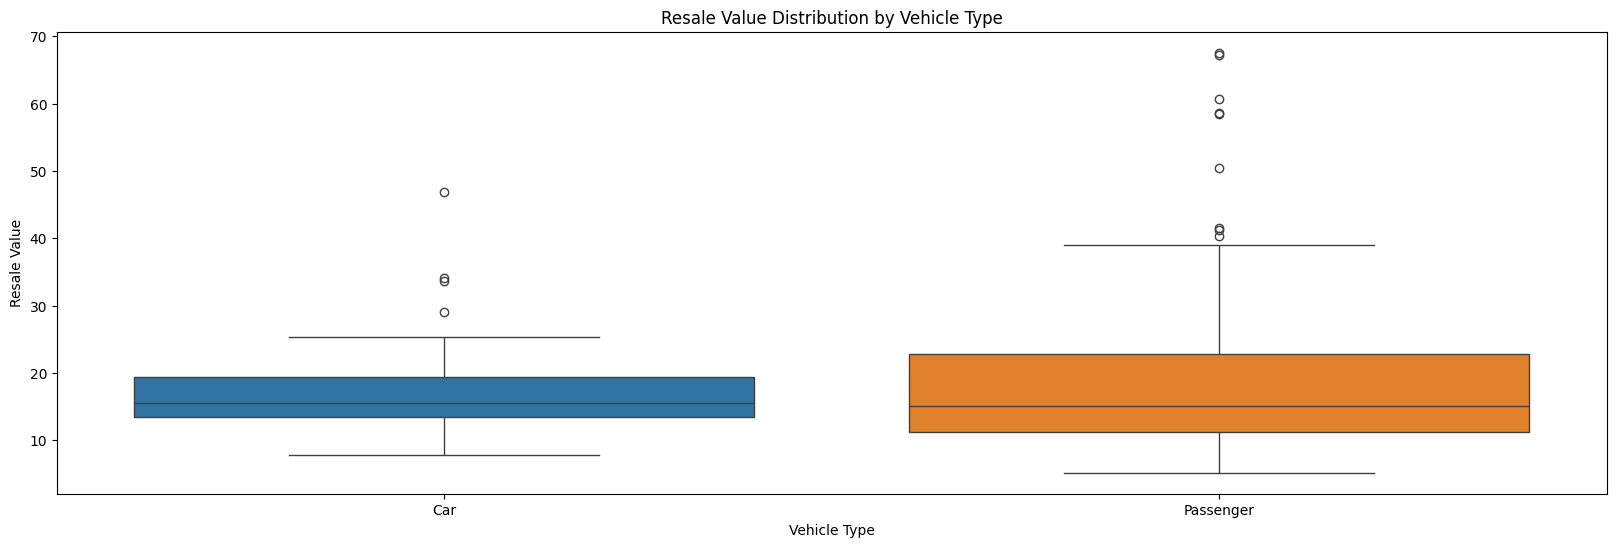

In [31]:
#  Does vehicle type (Passenger vs Car) affect depreciation?
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="Vehicle_type", y="Year_resale_value", hue="Vehicle_type")
plt.title("Resale Value Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Resale Value")
plt.show()

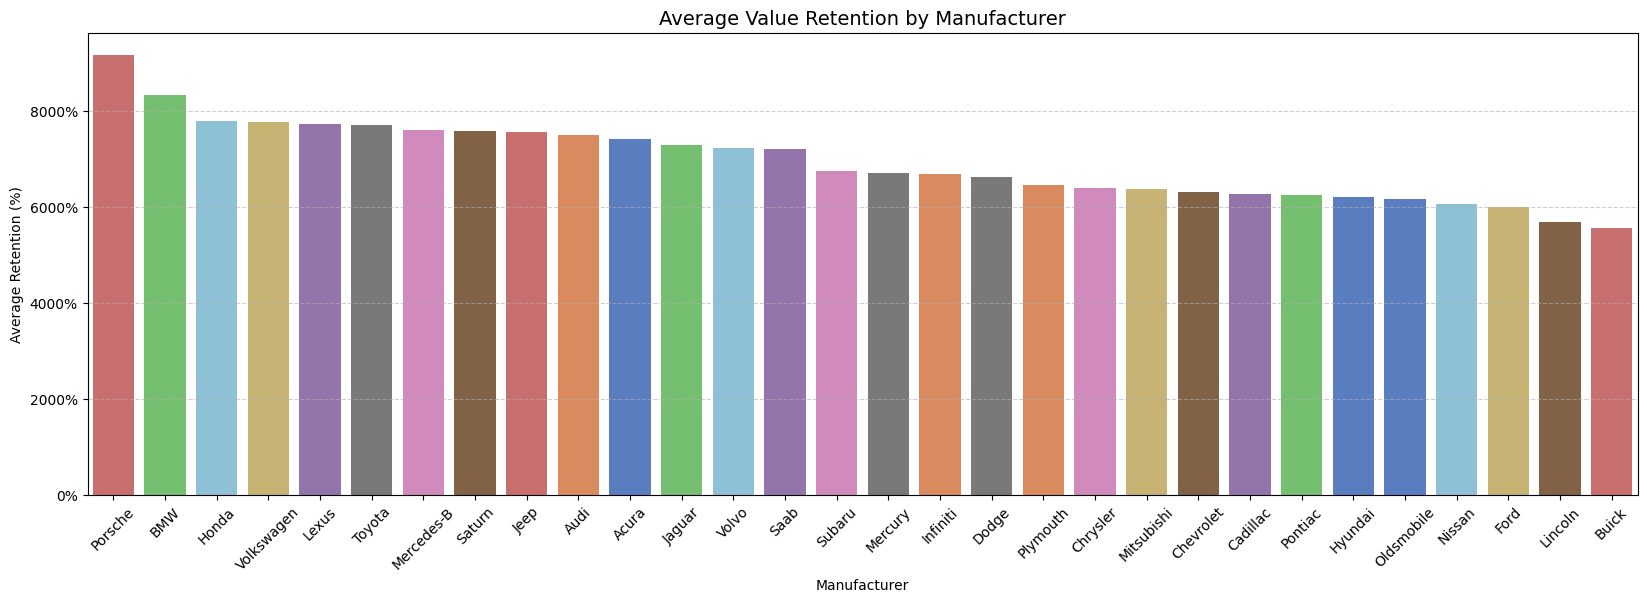

In [32]:
# Which brands provide the best value retention for buyers?

# Group by manufacturer and calculate average retention ratio
retention_df = (df.groupby('Manufacturer', observed=True)['Retention_Ratio']
                      .mean()
                      .sort_values(ascending=False)
                      .reset_index())
    
# Extract sorted manufacturer order
manu_order = retention_df['Manufacturer']
plt.figure(figsize=(20,6))
sns.barplot(
        data=retention_df,
        x='Manufacturer',
        y='Retention_Ratio',
        hue='Manufacturer',     
        order=manu_order,     
        legend=False,
        palette='muted'
)
plt.xticks(rotation=45)
plt.title("Average Value Retention by Manufacturer", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Retention (%)")
    
# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

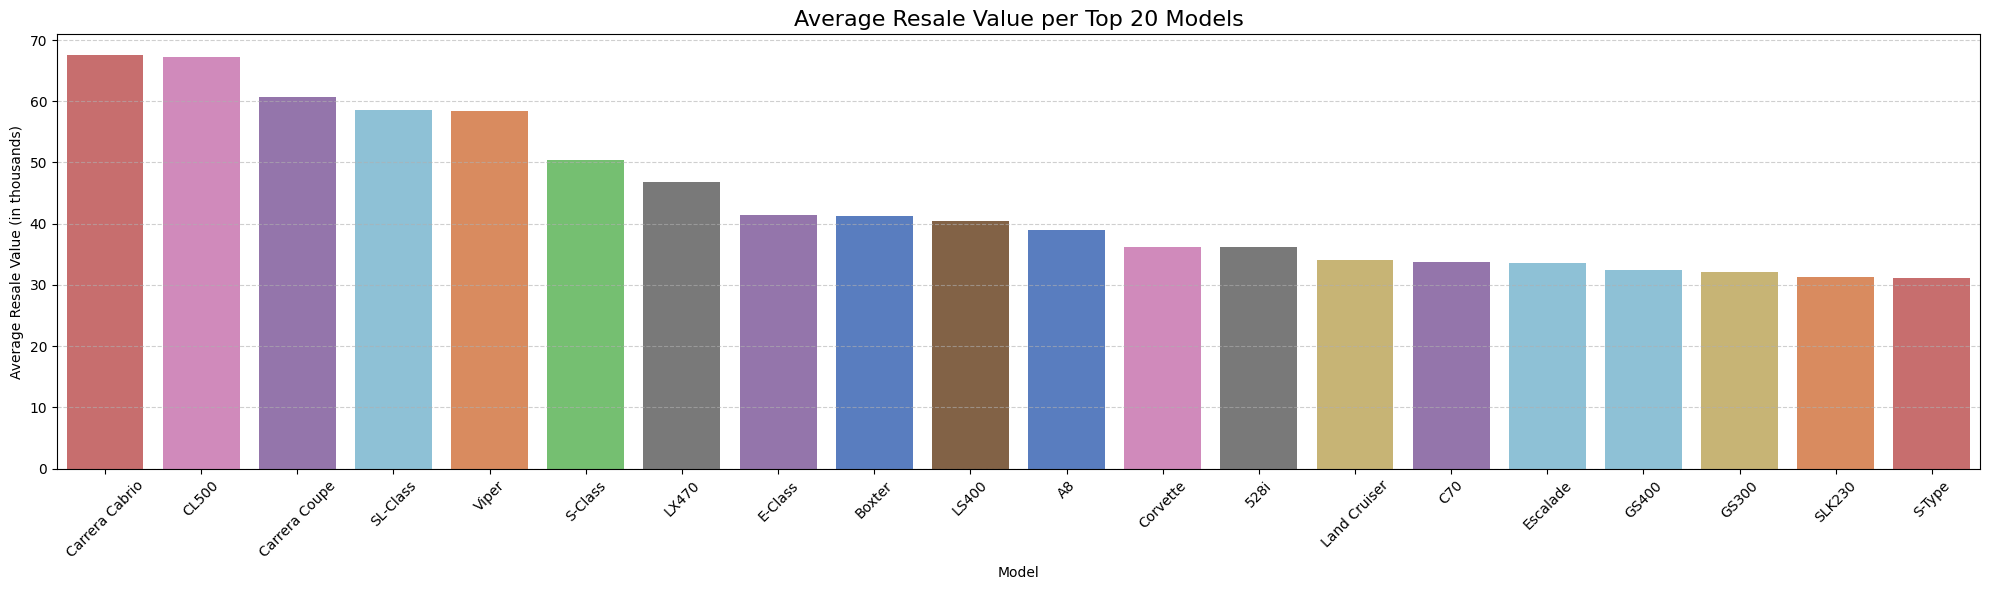

In [33]:
# Which TOP N model commands the highest resale values?

TOP_N_MODELS = 20

# Aggregate and sort by average price
model_resale_df = (df.groupby('Model', observed=True)['Year_resale_value']
                         .mean().sort_values(ascending=False).reset_index())

# Select top N models
top_models_df = model_resale_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(
    data=top_models_df,
    x="Model",
    y="Year_resale_value",
    hue="Model",
    order=model_order_list,
    palette='muted',
    dodge=False
)

plt.xticks(rotation=45)
plt.title(f"Average Resale Value per Top {TOP_N_MODELS} Models", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Average Resale Value (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Selected resale-driving features: ['Price_in_thousands', 'Horsepower', 'Power_perf_factor']


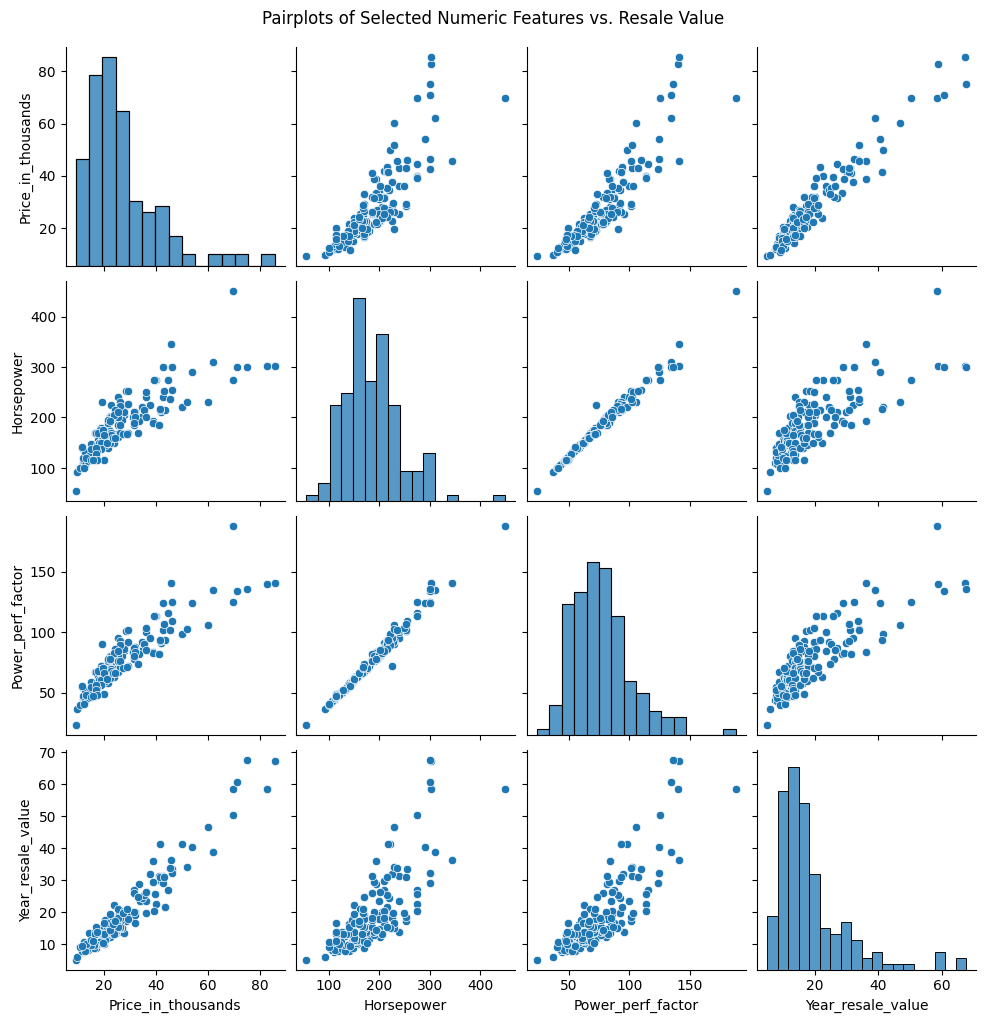

In [34]:
# Which factors influence car resale value?
# Does a higher original price guarantee a higher resale value?

resale_corr = corr_matrix["Year_resale_value"].drop("Year_resale_value")

# Select features with strong correlations (|corr| ≥ 0.6)
selected_resale_features = resale_corr[resale_corr.abs() >= 0.6].index.tolist()
print("Selected resale-driving features:", selected_resale_features)

# Pairplot of selected features + resale value
sns.pairplot(df[selected_resale_features + ["Year_resale_value"]])
plt.suptitle("Pairplots of Selected Numeric Features vs. Resale Value", y=1.02)
plt.show()

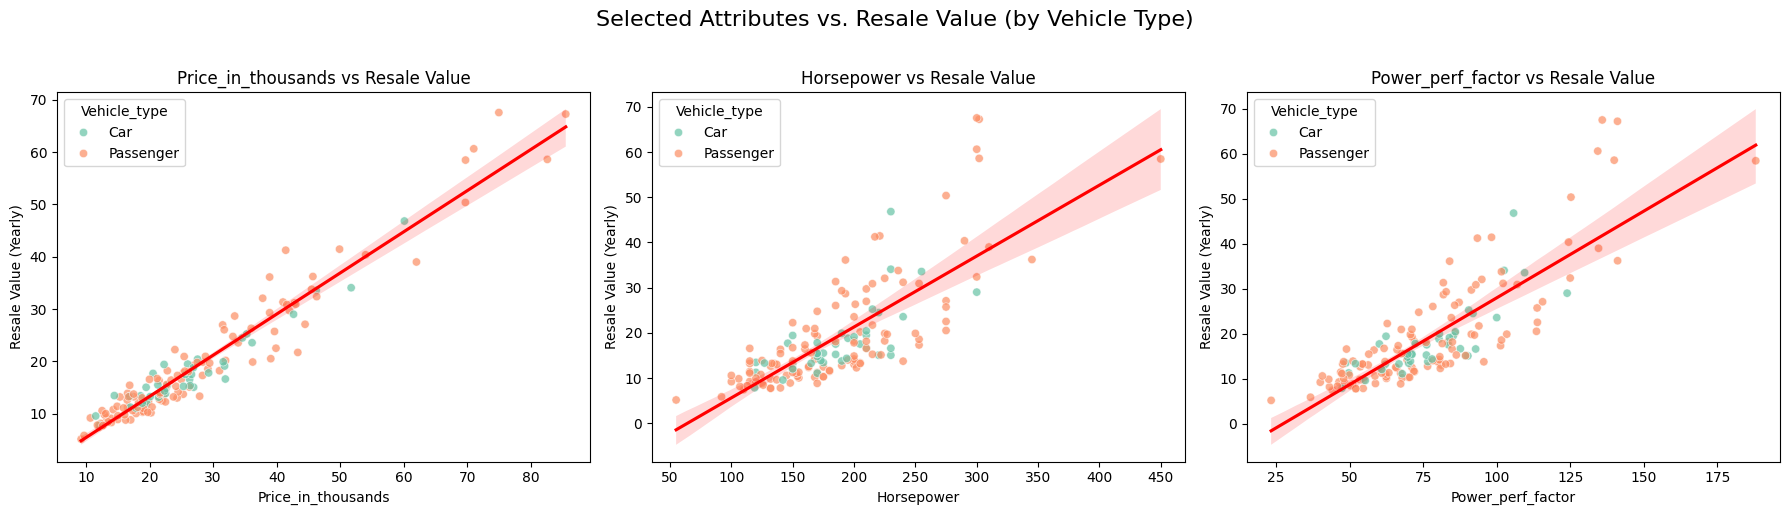

In [35]:
# Scatterplots — Selected features vs. Resale Value
hue_col = 'Vehicle_type' if 'Vehicle_type' in df.columns else None

n_features = len(selected_resale_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

idx = 0
for feature in selected_resale_features:
    sns.scatterplot(
        data=df,
        x=feature,
        y="Year_resale_value",
        hue=hue_col,
        alpha=0.7,
        palette="Set2",
        ax=axes[idx]
    )
    sns.regplot(
        data=df,
        x=feature,
        y="Year_resale_value",
        scatter=False,
        color="red",
        ax=axes[idx]
    )
    axes[idx].set_title(f"{feature} vs Resale Value", fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Resale Value (Yearly)")
    idx += 1

# Remove unused subplots
while idx < len(axes):
    fig.delaxes(axes[idx])
    idx += 1

plt.suptitle("Selected Attributes vs. Resale Value (by Vehicle Type)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Power-to-Performance Factor vs Key Business Metrics

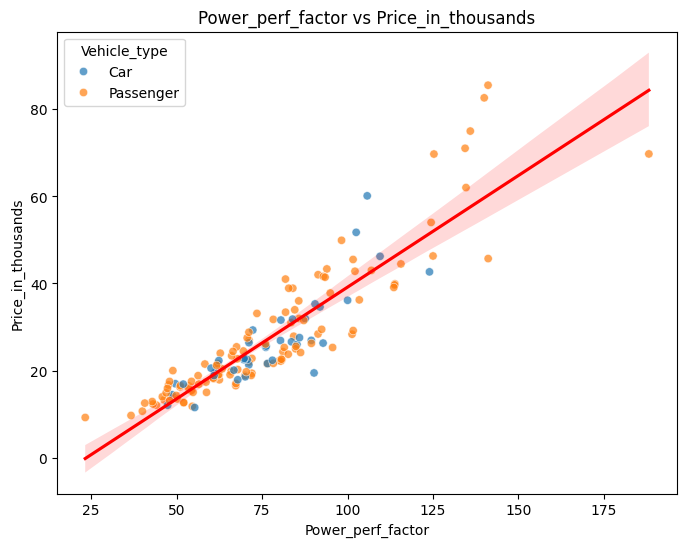

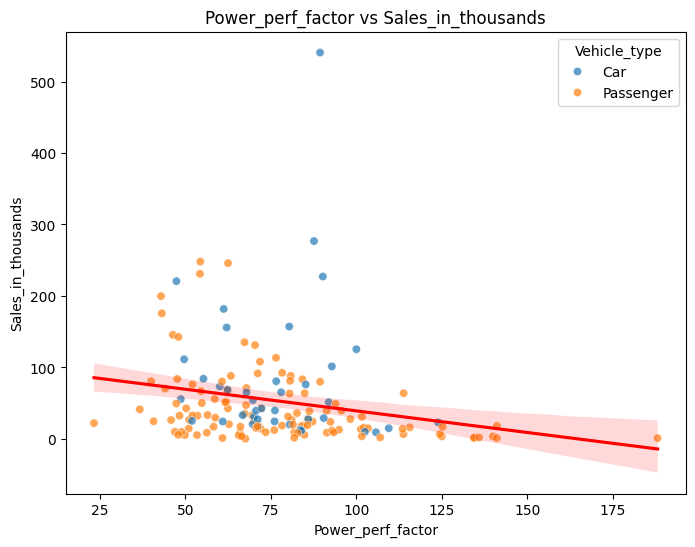

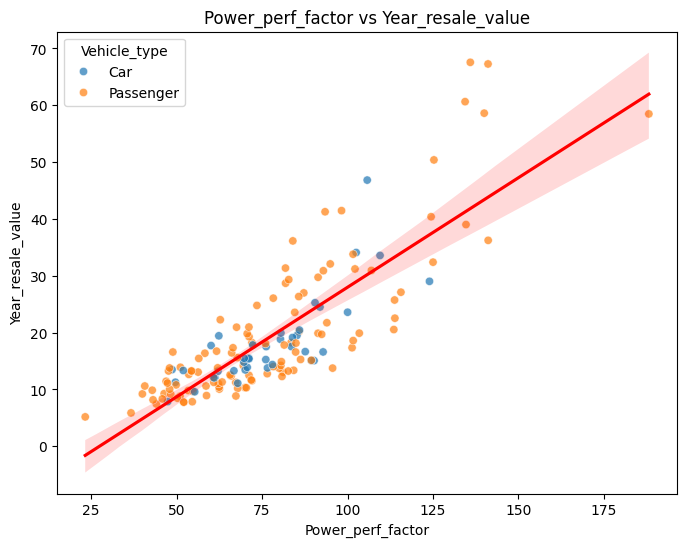

In [36]:
# How strongly does the Power-to-Performance Factor correlate 
# with key financial outcomes: vehicle price, sales volume, and resale value?

targets = ['Price_in_thousands', 'Sales_in_thousands', 'Year_resale_value']

for target in targets:
    if 'Power_perf_factor' in df.columns and target in df.columns:
        # Scatterplot with regression line
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Power_perf_factor', hue='Vehicle_type', y=target, alpha=0.7)
        sns.regplot(data=df, x='Power_perf_factor', y=target, scatter=False, color='red')
        plt.title(f"Power_perf_factor vs {target}")
        plt.xlabel("Power_perf_factor")
        plt.ylabel(target)
        plt.show()

# Design and Efficiency Trade-Off

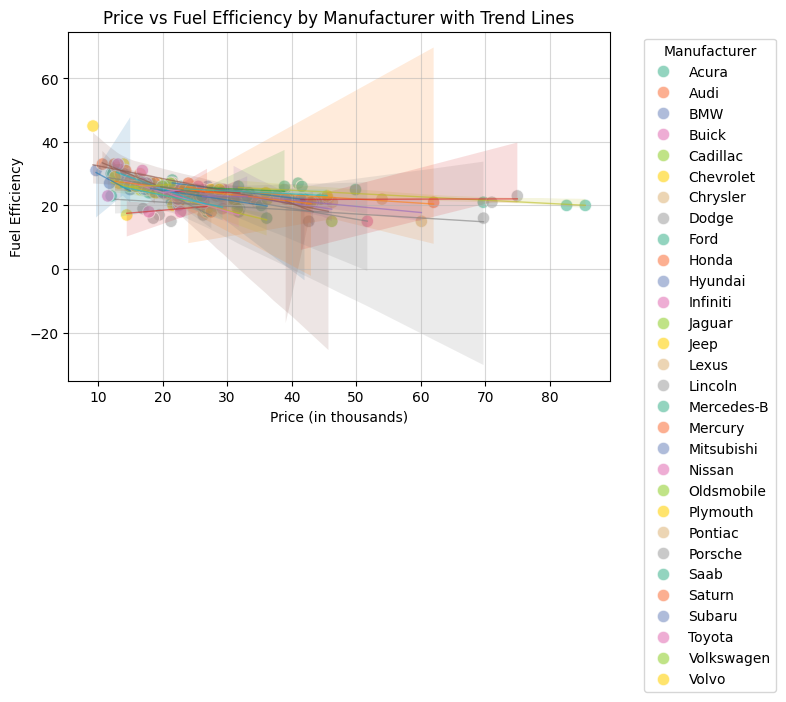

In [37]:
# How do a car price and fuel efficiency relate, and does this relationship differ by manufacturer?

required_cols = ['Price_in_thousands', 'Fuel_efficiency', 'Manufacturer']
if all(col in df.columns for col in required_cols):

    plt.figure(figsize=(8,6))
    
    # Scatter points colored by Manufacturer
    sns.scatterplot(
        data=df,
        x='Price_in_thousands',
        y='Fuel_efficiency',
        hue='Manufacturer',
        palette='Set2',
        alpha=0.7,
        s=80
    )
    
    manufacturers = df['Manufacturer'].unique()
    for manu in manufacturers:
        manu_data = df[df['Manufacturer'] == manu]
        sns.regplot(
            data=manu_data,
            x='Price_in_thousands',
            y='Fuel_efficiency',
            scatter=False,
            label=None,  # avoid extra legend entries
            line_kws={'linewidth':1, 'alpha':0.6}
        )
    
    plt.title("Price vs Fuel Efficiency by Manufacturer with Trend Lines")
    plt.xlabel("Price (in thousands)")
    plt.ylabel("Fuel Efficiency")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Manufacturer")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

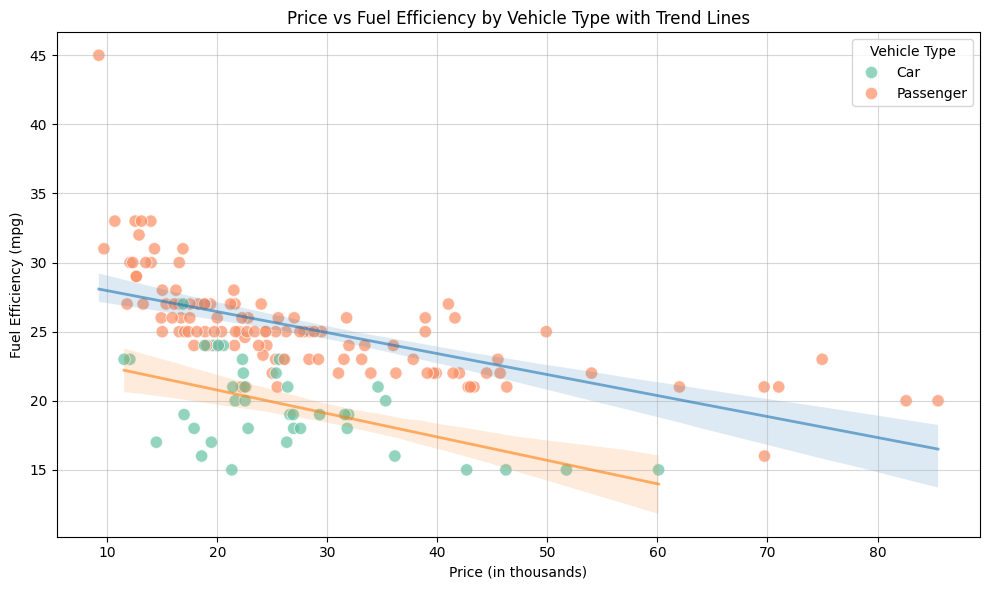

In [38]:
# Do different vehicle types show distinct price–efficiency relationships?

plt.figure(figsize=(10,6))
    
# Scatter points colored by Vehicle Type
sns.scatterplot(
        data=df,
        x='Price_in_thousands',
        y='Fuel_efficiency',
        hue='Vehicle_type',
        palette='Set2',
        alpha=0.7,
        s=80
    )
    
# Add regression lines per Vehicle Type
vehicle_types = df['Vehicle_type'].unique()
for vtype in vehicle_types:
        vtype_data = df[df['Vehicle_type'] == vtype]
        sns.regplot(
            data=vtype_data,
            x='Price_in_thousands',
            y='Fuel_efficiency',
            scatter=False,
            label=None,
            line_kws={'linewidth':2, 'alpha':0.6}
        )
    
plt.title("Price vs Fuel Efficiency by Vehicle Type with Trend Lines")
plt.xlabel("Price (in thousands)")
plt.ylabel("Fuel Efficiency (mpg)")
plt.legend(title="Vehicle Type")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

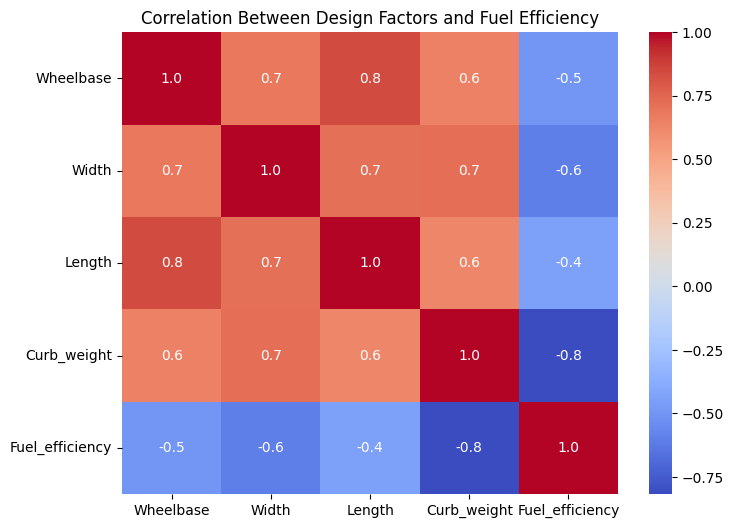

In [39]:
# Which design factors have the biggest impact on fuel economy?

design = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_efficiency']
corr_matrix = df[design].corr()
    
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Between Design Factors and Fuel Efficiency")
plt.show()


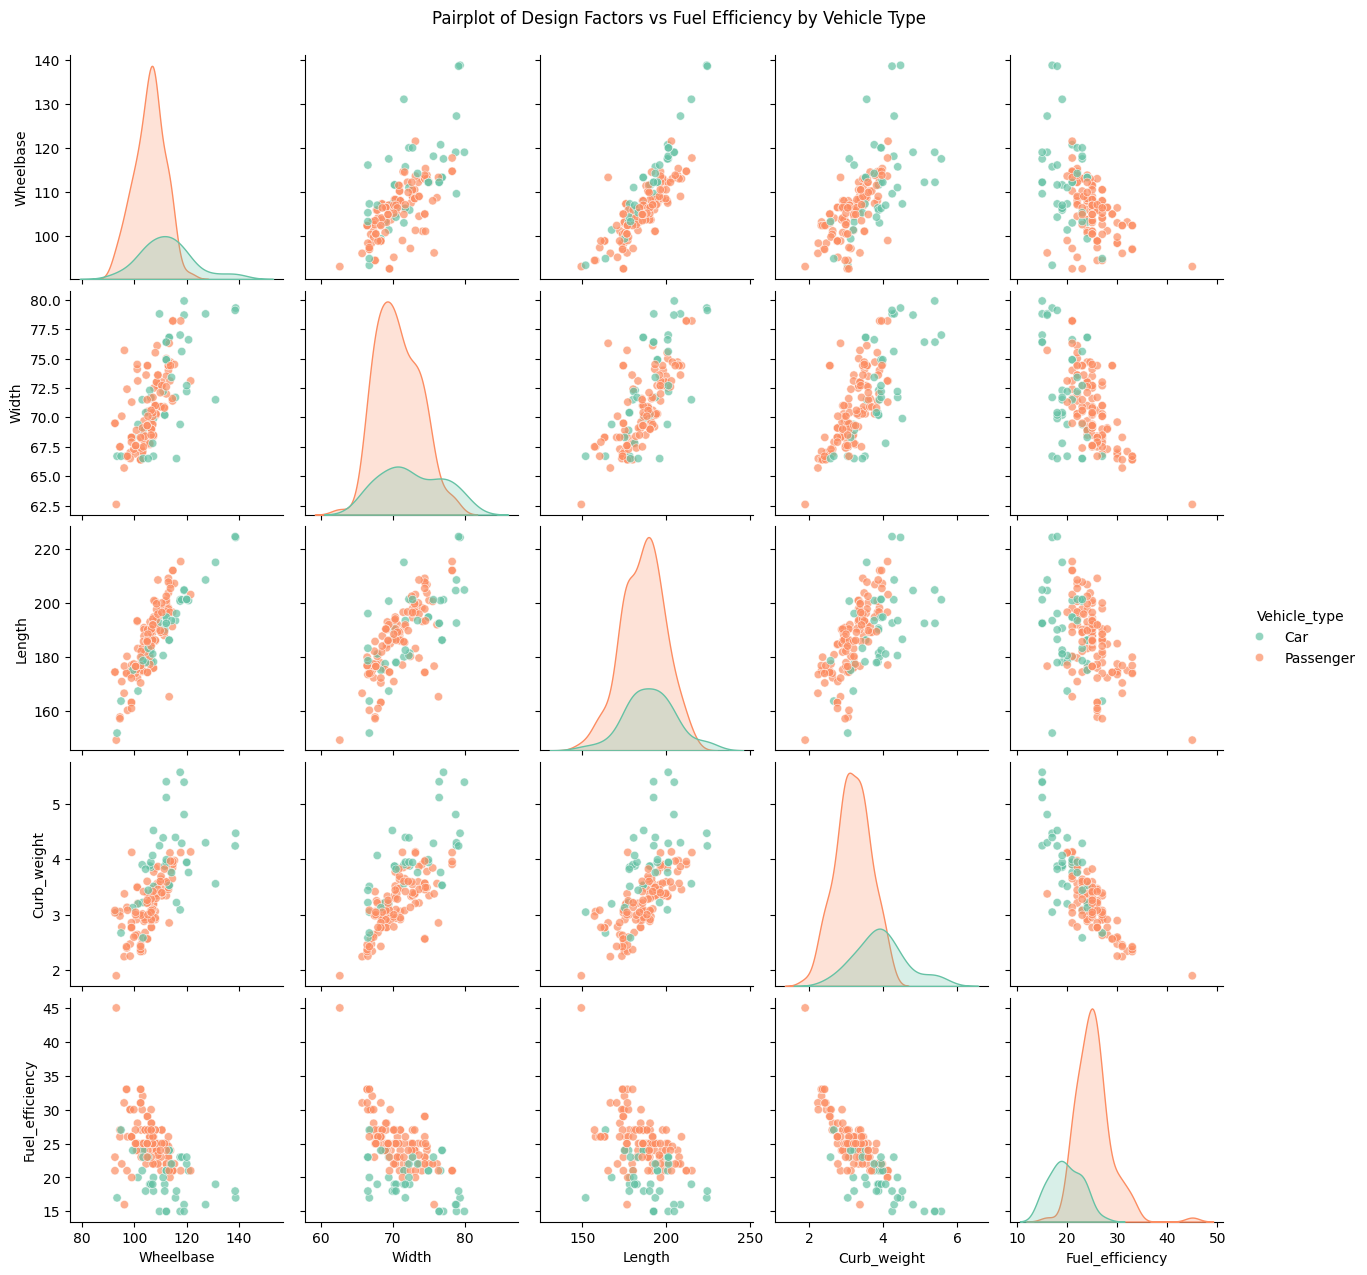

In [40]:
# Which design factors have the biggest impact on fuel economy?

# Select relevant columns
cols = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_efficiency', 'Vehicle_type']

# Pairplot
sns.pairplot(
    df[cols],
    hue='Vehicle_type',
    palette='Set2',      
    plot_kws={'alpha':0.7} 
)
plt.suptitle("Pairplot of Design Factors vs Fuel Efficiency by Vehicle Type", y=1.02)
plt.show()


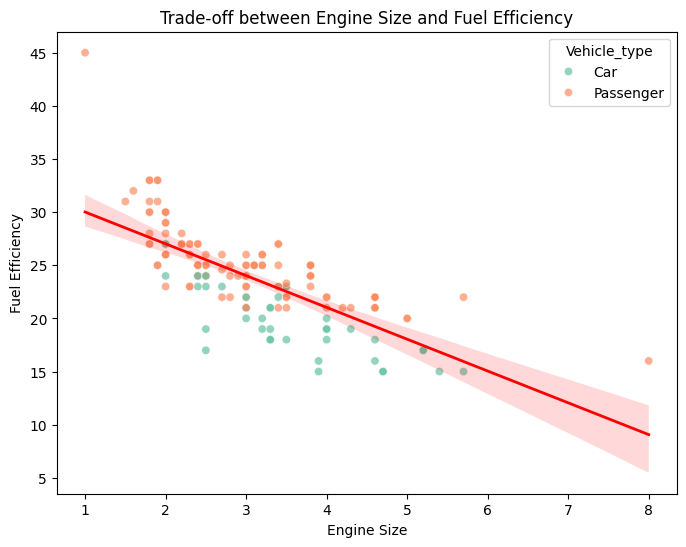

In [41]:
# How does engine size influence fuel efficiency?

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Engine_size',
    y='Fuel_efficiency',
    hue='Vehicle_type',   
    palette='Set2',
    alpha=0.7
)

sns.regplot(
    data=df,
    x='Engine_size',
    y='Fuel_efficiency',
    scatter=False,
    color='red',
    line_kws={'linewidth':2}
)

plt.title("Trade-off between Engine Size and Fuel Efficiency")
plt.xlabel("Engine Size")
plt.ylabel("Fuel Efficiency")
plt.show()


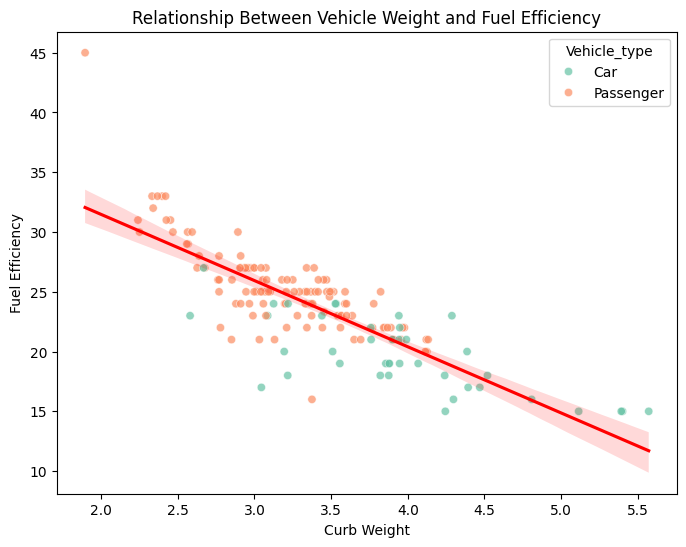

In [42]:
# How strongly does a car’s weight affect its fuel efficiency, and does this vary by vehicle type?
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Curb_weight',
    y='Fuel_efficiency',
    hue='Vehicle_type',
    palette='Set2',
    alpha=0.7
)
sns.regplot(
    data=df,
    x='Curb_weight',
    y='Fuel_efficiency',
    scatter=False,
    color='red'
)
plt.title("Relationship Between Vehicle Weight and Fuel Efficiency")
plt.xlabel("Curb Weight")
plt.ylabel("Fuel Efficiency")
plt.show()

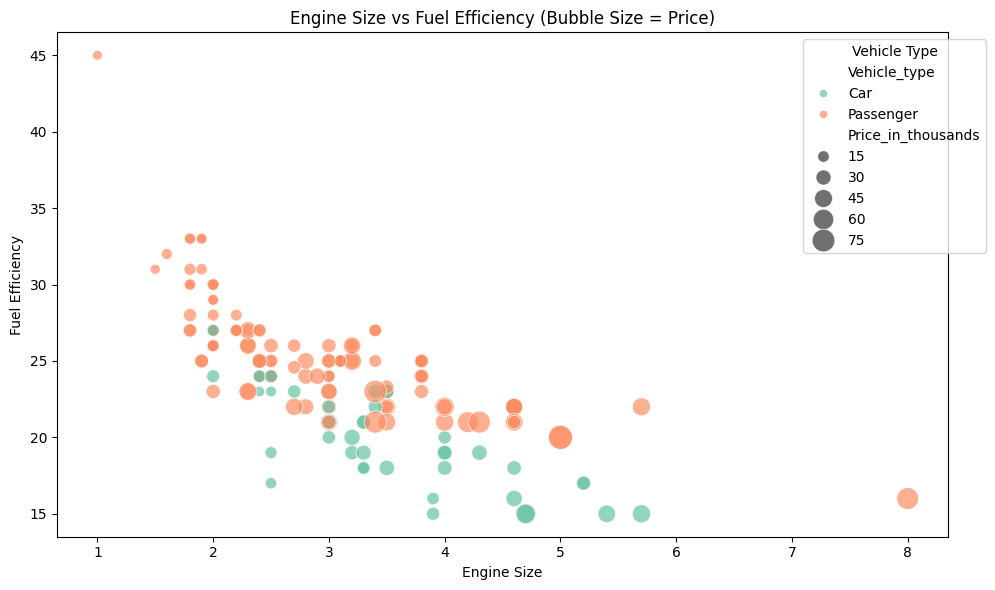

In [43]:
# Do high-priced, large-engine vehicles consistently trade off fuel efficiency for performance?
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Engine_size',
    y='Fuel_efficiency',
    size='Price_in_thousands',
    hue='Vehicle_type',
    sizes=(50, 300),
    alpha=0.7,
    palette='Set2'
)
plt.title("Engine Size vs Fuel Efficiency (Bubble Size = Price)")
plt.xlabel("Engine Size")
plt.ylabel("Fuel Efficiency")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Vehicle Segmentation

Number of Cars per Price Segment:
 Price_Segment
Economy      39
Mid-Range    40
Premium      38
Luxury       39
Name: count, dtype: int64


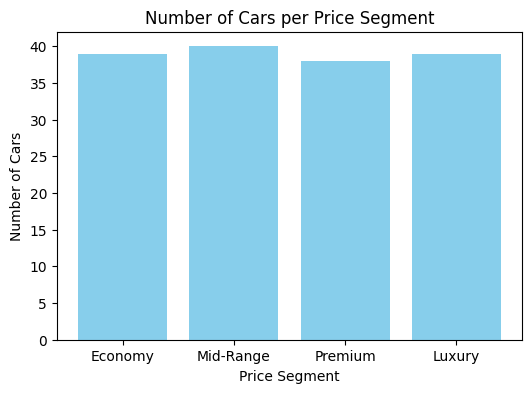


Average Features by Price Segment:
                Horsepower  Fuel_efficiency
Price_Segment                             
Economy        125.564103        27.769231
Mid-Range      169.950000        23.564661
Premium        198.157895        22.665871
Luxury         250.846154        21.358974


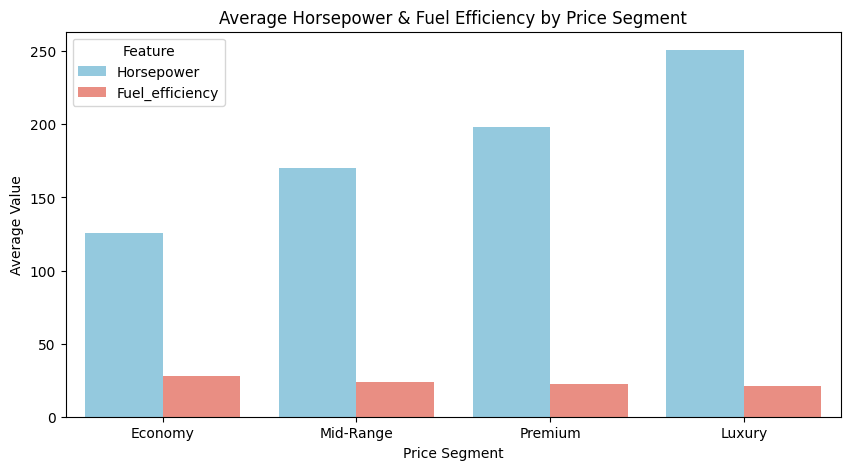

In [44]:

labels = ['Economy', 'Mid-Range', 'Premium', 'Luxury']

# Use qcut to ensure roughly equal number of cars in each segment
df['Price_Segment'] = pd.qcut(df['Price_in_thousands'], q=4, labels=labels)

segment_counts = df['Price_Segment'].value_counts().reindex(labels)
print("Number of Cars per Price Segment:\n", segment_counts)

# Number of Cars per Segment

plt.figure(figsize=(6,4))
plt.bar(segment_counts.index.astype(str), segment_counts.values, color='skyblue')
plt.title("Number of Cars per Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Number of Cars")
plt.show()

avg_features = df.groupby('Price_Segment', observed=True)[['Horsepower', 'Fuel_efficiency']].mean().reindex(labels).fillna(0)
print("\nAverage Features by Price Segment:\n", avg_features)

# Convert to long-form for seaborn
df_long = avg_features.reset_index().melt(id_vars='Price_Segment', 
                                          value_vars=['Horsepower','Fuel_efficiency'],
                                          var_name='Feature', value_name='Average')

plt.figure(figsize=(10,5))
sns.barplot(x='Price_Segment', y='Average', hue='Feature', data=df_long, palette=['skyblue','salmon'])
plt.title("Average Horsepower & Fuel Efficiency by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Average Value")
plt.show()



Number of Cars per Price Segment:
 Price_Segment
Economy      67
Mid-Range    54
Premium      27
Luxury        8
Name: count, dtype: int64


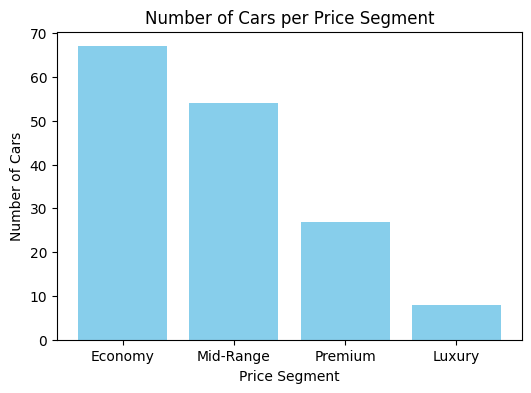


Average Features by Price Segment:
                Horsepower  Fuel_efficiency
Price_Segment                             
Economy        141.358209        26.164179
Mid-Range      194.851852        22.720177
Premium        242.444444        21.592593
Luxury         308.625000        19.625000


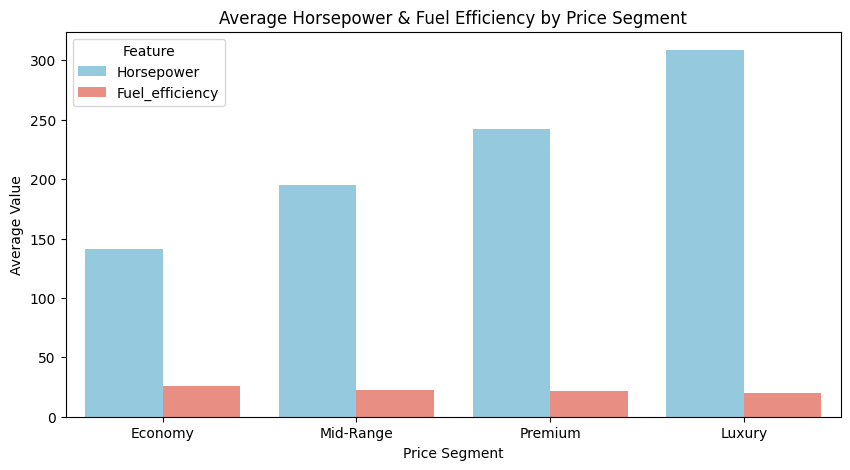

In [45]:

from sklearn.cluster import KMeans

# --- Step 1: KMeans Clustering ---
k = 4  # number of clusters
segment_names = ['Economy', 'Mid-Range', 'Premium', 'Luxury']

kmeans = KMeans(n_clusters=k, random_state=42)
df['Price_Cluster'] = kmeans.fit_predict(df[['Price_in_thousands']])

# --- Step 2: Map clusters to meaningful names based on mean price ---
cluster_order = df.groupby('Price_Cluster')['Price_in_thousands'].mean().sort_values().index
cluster_to_name = {cluster_order[i]: segment_names[i] for i in range(k)}
df['Price_Segment'] = df['Price_Cluster'].map(cluster_to_name)

# --- Step 3: Number of cars per segment ---
segment_counts = df['Price_Segment'].value_counts().reindex(segment_names).fillna(0)
print("Number of Cars per Price Segment:\n", segment_counts)

plt.figure(figsize=(6,4))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.title("Number of Cars per Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Number of Cars")
plt.show()

# --- Step 4: Average features by segment ---
avg_features = df.groupby('Price_Segment', observed=True)[['Horsepower', 'Fuel_efficiency']].mean().reindex(segment_names)
print("\nAverage Features by Price Segment:\n", avg_features)

# Convert to long-form for seaborn
df_long = avg_features.reset_index().melt(id_vars='Price_Segment', 
                                          value_vars=['Horsepower','Fuel_efficiency'],
                                          var_name='Feature', value_name='Average')

plt.figure(figsize=(10,5))
sns.barplot(x='Price_Segment', y='Average', hue='Feature', data=df_long, palette=['skyblue','salmon'])
plt.title("Average Horsepower & Fuel Efficiency by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Average Value")
plt.show()


Number of Cars per Price Segment:
 Price_Segment
Economy      67
Mid-Range    54
Premium      27
Luxury        8
Name: count, dtype: int64


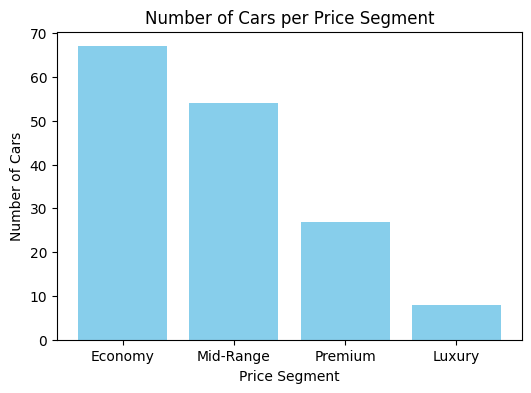

In [46]:

from sklearn.cluster import KMeans

# --- Step 1: KMeans Clustering ---
k = 4
segment_names = ['Economy', 'Mid-Range', 'Premium', 'Luxury']

kmeans = KMeans(n_clusters=k, random_state=42)
df['Price_Cluster'] = kmeans.fit_predict(df[['Price_in_thousands']])

# Map clusters to human-friendly names based on average price
cluster_order = df.groupby('Price_Cluster')['Price_in_thousands'].mean().sort_values().index
cluster_to_name = {cluster_order[i]: segment_names[i] for i in range(k)}
df['Price_Segment'] = df['Price_Cluster'].map(cluster_to_name)

# --- Step 2: Number of cars per segment ---
segment_counts = df['Price_Segment'].value_counts().reindex(segment_names).fillna(0)
print("Number of Cars per Price Segment:\n", segment_counts)

plt.figure(figsize=(6,4))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.title("Number of Cars per Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Number of Cars")
plt.show()




Average Performance Features by Price Segment:
                Horsepower  Engine_size  Power_perf_factor  Fuel_efficiency
Price_Segment                                                             
Economy        141.358209     2.440299          57.116618        26.164179
Mid-Range      194.851852     3.222222          79.673439        22.720177
Premium        242.444444     3.777778         102.940148        21.592593
Luxury         308.625000     4.750000         138.153060        19.625000


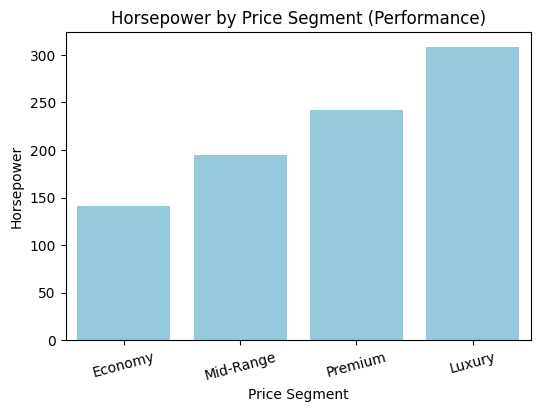

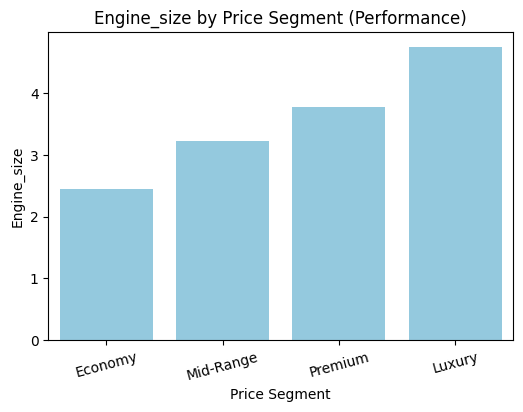

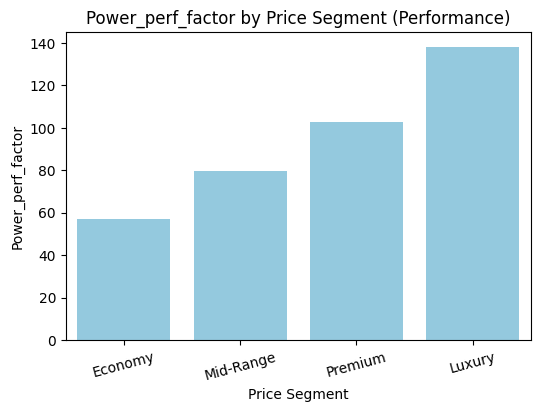

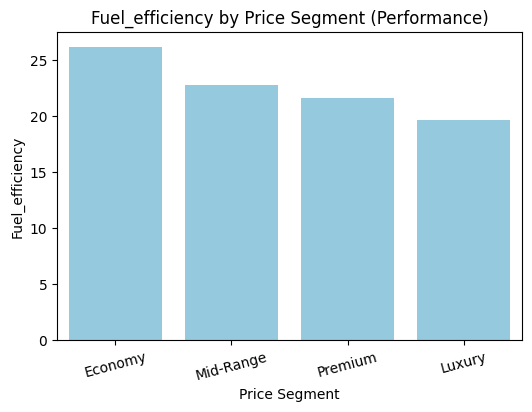


Average Size & Weight Features by Price Segment:
                 Wheelbase      Width      Length  Curb_weight  Fuel_capacity
Price_Segment                                                               
Economy        105.567164  69.816418  182.798507     2.957657      16.140299
Mid-Range      109.061111  71.616667  191.770370     3.593019      18.820370
Premium        109.814815  73.029630  189.974074     3.836741      19.748148
Luxury         105.087500  72.825000  186.650000     3.894750      21.200000


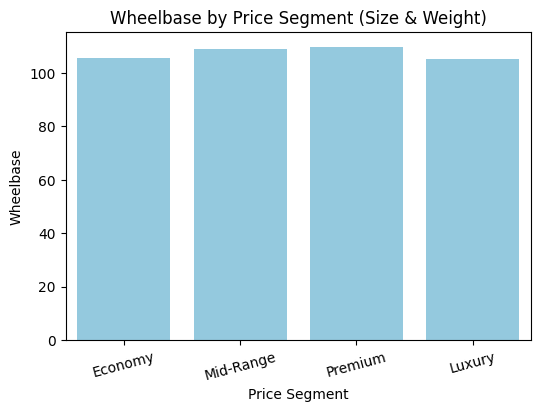

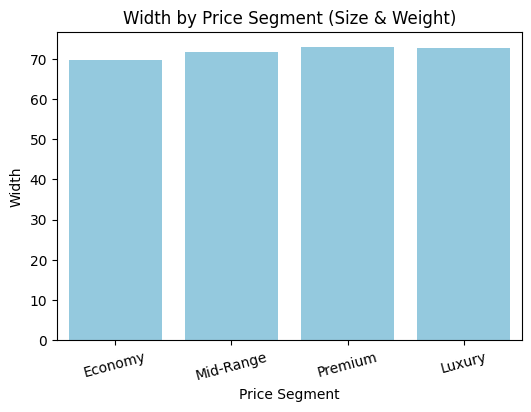

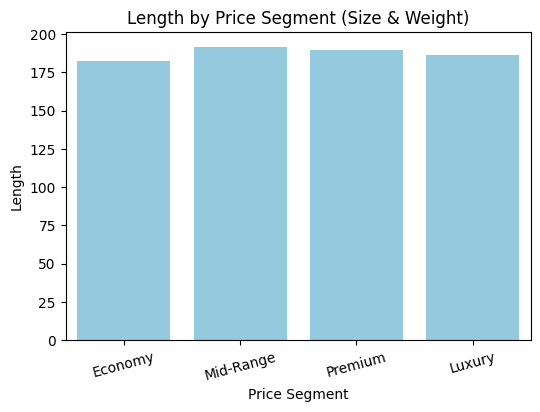

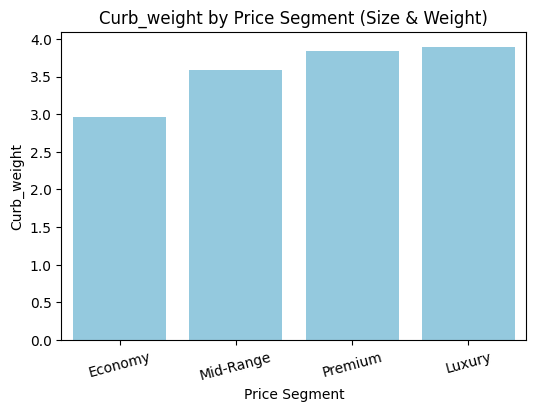

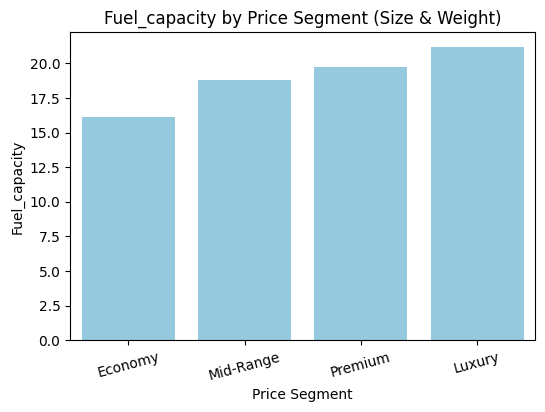


Average Financial Features by Price Segment:
                Sales_in_thousands  Year_resale_value  Depreciation_Percentage  \
Price_Segment                                                                   
Economy                 72.723015          11.374253                32.026026   
Mid-Range               51.453611          17.745511                33.232641   
Premium                 21.506444          30.031170                28.624025   
Luxury                   4.450875          56.087971                22.248003   

               Retention_Ratio  
Price_Segment                   
Economy              67.973974  
Mid-Range            66.767359  
Premium              71.375975  
Luxury               77.751997  


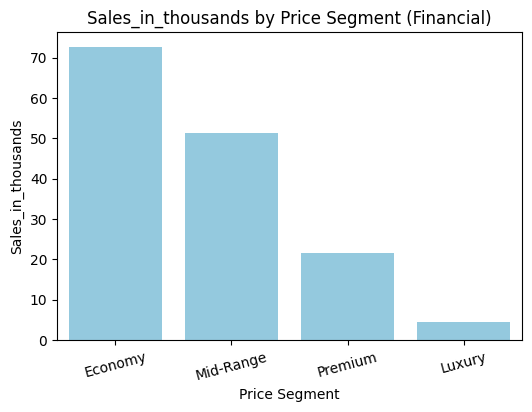

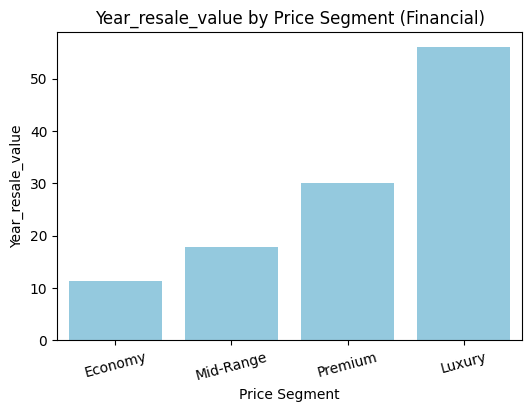

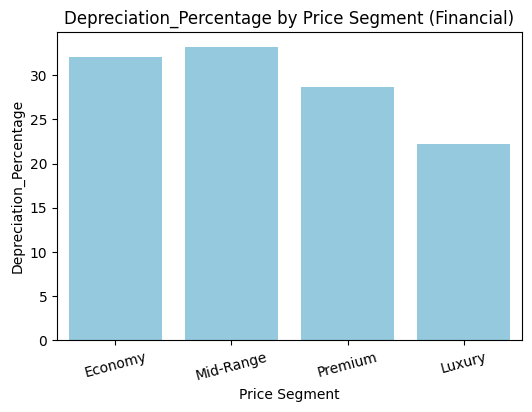

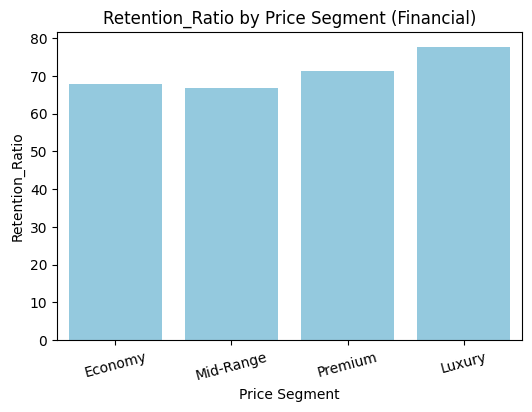

In [47]:

# --- Step 3: Group numeric features ---
feature_groups = {
    'Performance': ['Horsepower', 'Engine_size', 'Power_perf_factor', 'Fuel_efficiency'],
    'Size & Weight': ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity'],
    'Financial': ['Sales_in_thousands', 'Year_resale_value', 'Depreciation_Percentage', 'Retention_Ratio']
}

# Plot each feature separately per group
for group_name, features in feature_groups.items():
    avg_features = df.groupby('Price_Segment')[features].mean().reindex(segment_names)
    print(f"\nAverage {group_name} Features by Price Segment:\n", avg_features)
    
    for feature in features:
        plt.figure(figsize=(6,4))
        sns.barplot(x=avg_features.index, y=avg_features[feature], color='skyblue')
        plt.title(f"{feature} by Price Segment ({group_name})")
        plt.xlabel("Price Segment")
        plt.ylabel(feature)
        plt.xticks(rotation=15)
        plt.show()





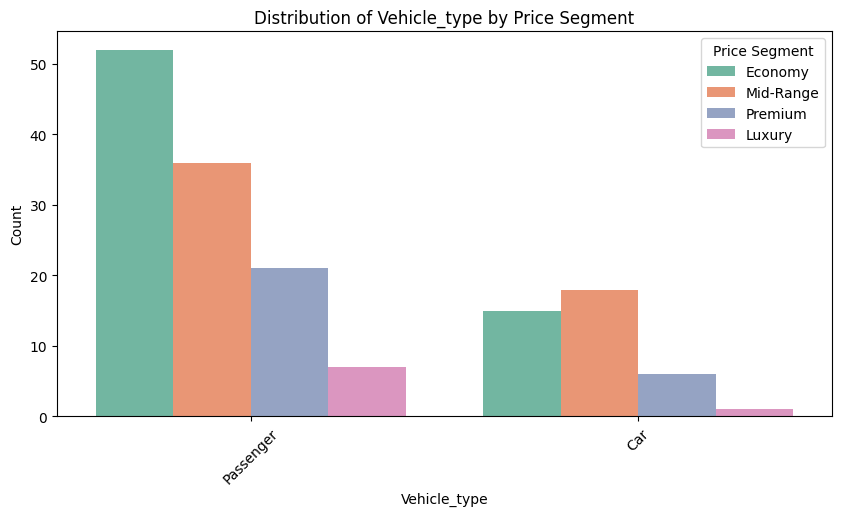

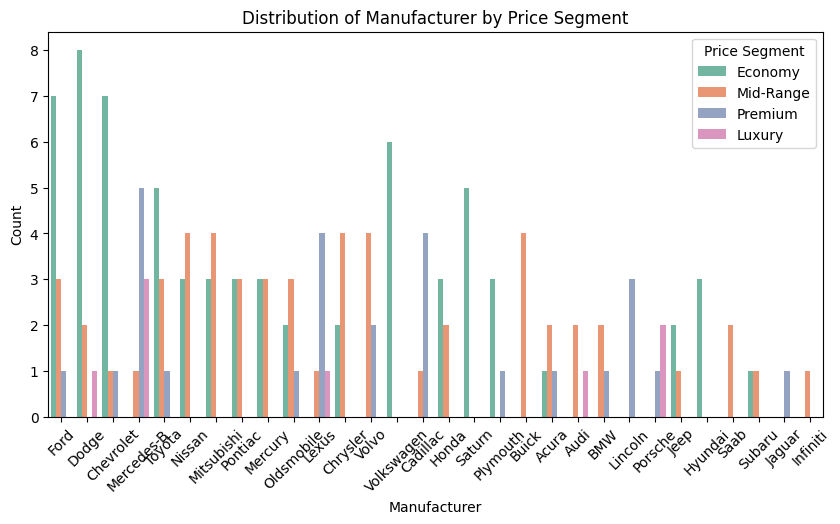

In [48]:
# --- Step 4: Categorical distributions ---
categorical_features = ['Vehicle_type', 'Manufacturer']

for cat in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=cat, hue='Price_Segment', data=df, order=df[cat].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {cat} by Price Segment")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Price Segment')
    plt.show()

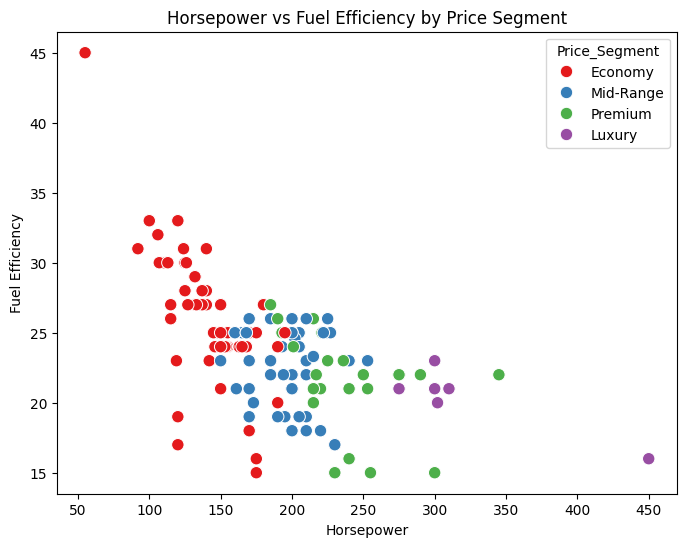

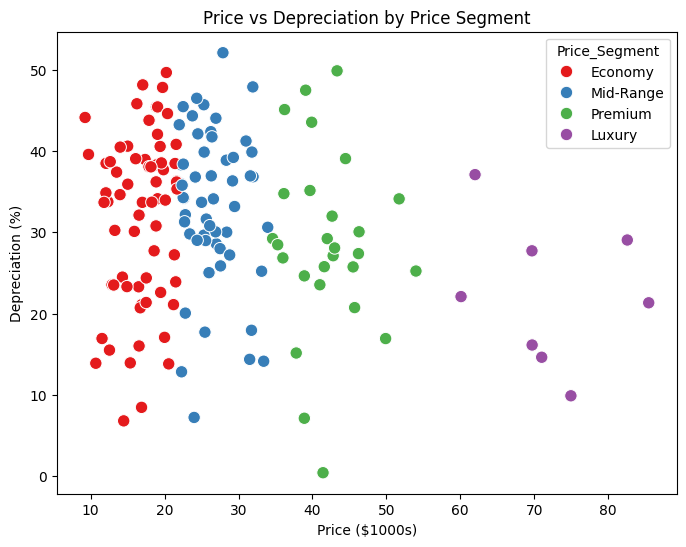

In [49]:
# --- Step 5: Scatterplots for relationships ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='Horsepower', y='Fuel_efficiency', hue='Price_Segment', data=df, palette='Set1', s=80)
plt.title("Horsepower vs Fuel Efficiency by Price Segment")
plt.xlabel("Horsepower")
plt.ylabel("Fuel Efficiency")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Price_in_thousands', y='Depreciation_Percentage', hue='Price_Segment', data=df, palette='Set1', s=80)
plt.title("Price vs Depreciation by Price Segment")
plt.xlabel("Price ($1000s)")
plt.ylabel("Depreciation (%)")
plt.show()

# Trends Over Time

In [50]:
# Calculate precise age (years, months, days) of car from Latest_Launch
# Extract year, month, day into separate columns
df['Launch_Year'] = df['Latest_Launch'].dt.year
df['Launch_Month'] = df['Latest_Launch'].dt.month
df['Launch_Day'] = df['Latest_Launch'].dt.day

today = datetime.today()

# Function to calculate precise age
def calc_age_from_components(row):
    if pd.isna(row['Latest_Launch']):
        return pd.Series([None, None, None])
    
    launch_date = datetime(row['Launch_Year'], row['Launch_Month'], row['Launch_Day'])
    rd = relativedelta(today, launch_date)
    return pd.Series([rd.years, rd.months, rd.days])

# Apply function row-wise
df[['Age_years', 'Age_months', 'Age_days']] = df.apply(calc_age_from_components, axis=1)

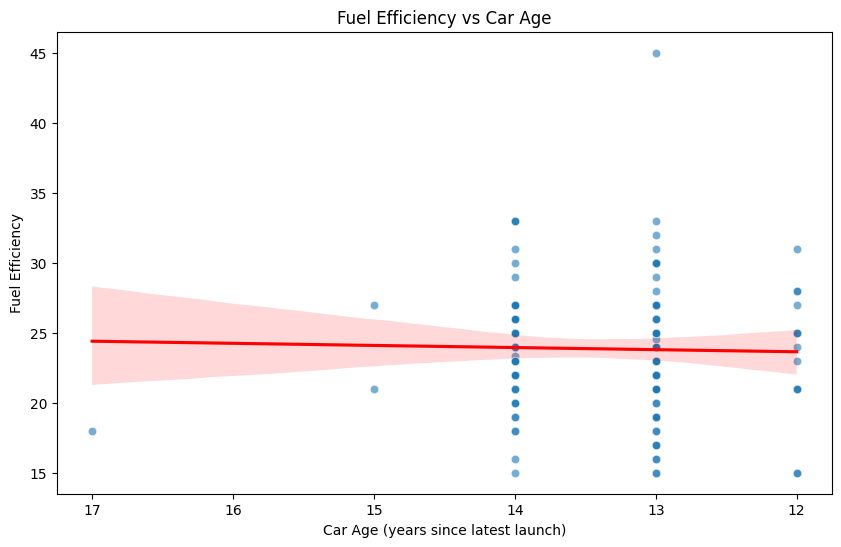

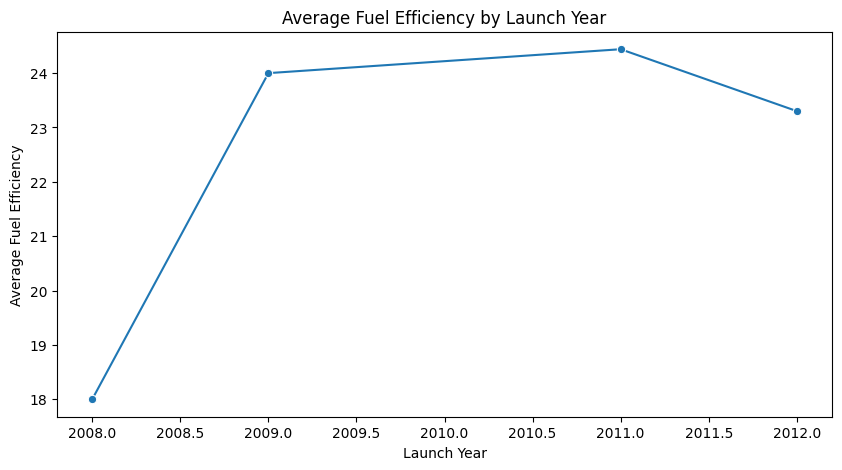

In [51]:
# Are newer cars more fuel-efficient?

plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='Age_years',
        y='Fuel_efficiency',
        alpha=0.6
    )
    
sns.regplot(
        data=df,
        x='Age_years',
        y='Fuel_efficiency',
        scatter=False,
        color='red'
    )
    
plt.title("Fuel Efficiency vs Car Age")
plt.xlabel("Car Age (years since latest launch)")
plt.ylabel("Fuel Efficiency")
plt.gca().invert_xaxis()  # Show newer cars on left
plt.show()
    
# Average fuel efficiency by launch year
avg_fuel = df.groupby('Launch_Year')['Fuel_efficiency'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_fuel.index, y=avg_fuel.values, marker='o')
plt.title("Average Fuel Efficiency by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Fuel Efficiency")
plt.show()

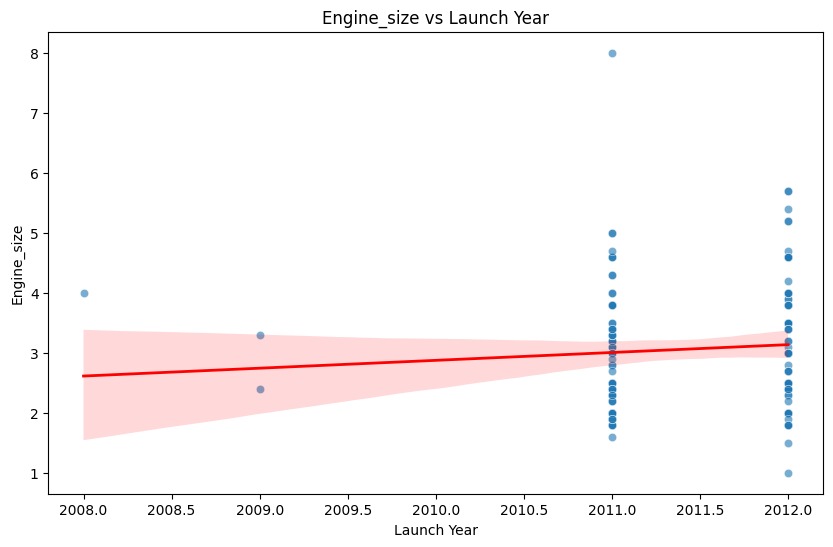

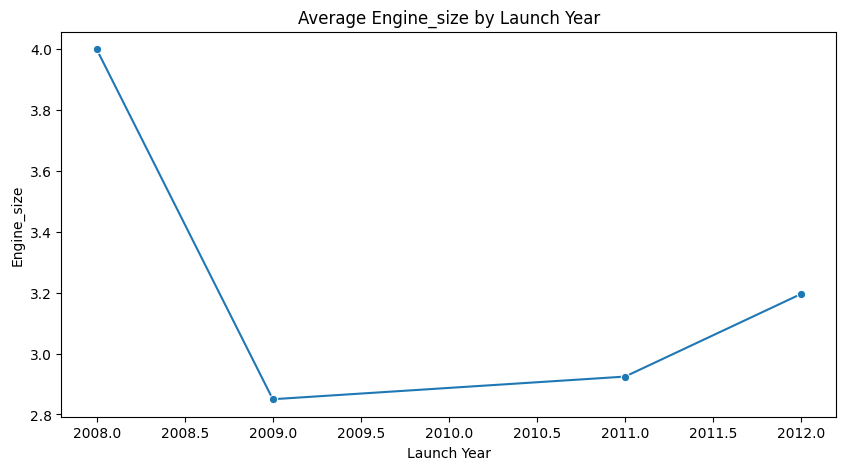

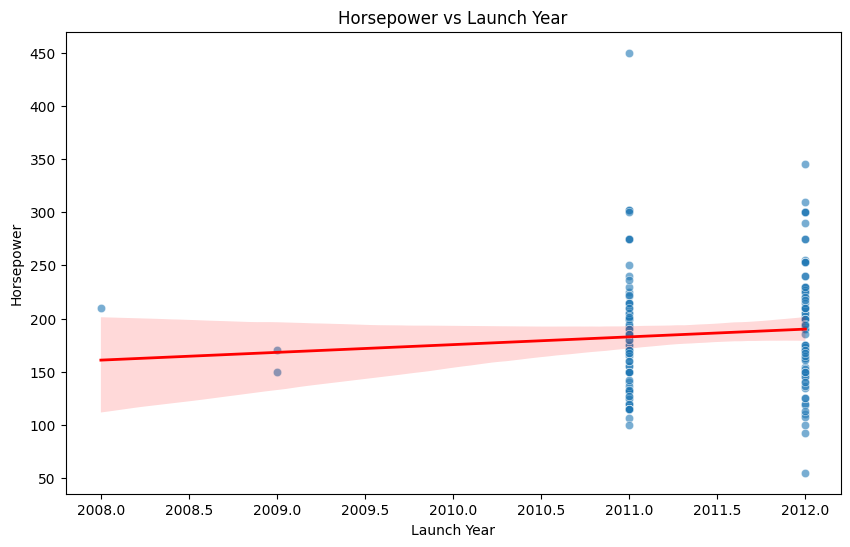

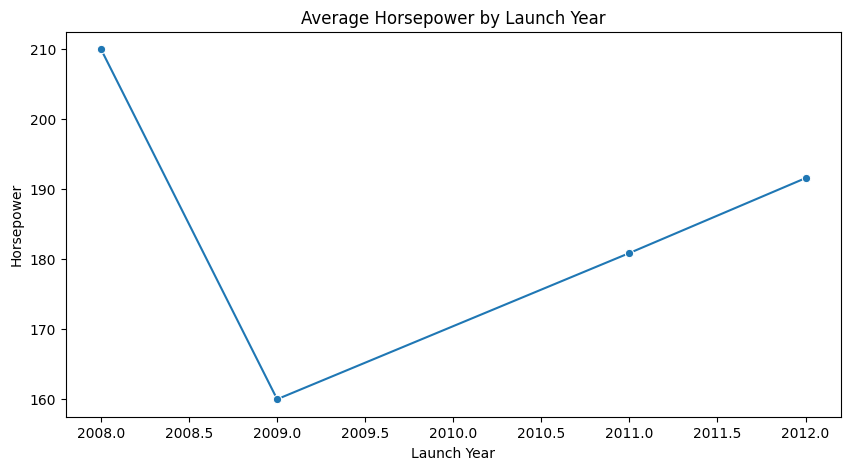

In [52]:
# How have engine sizes and horsepower evolved over time?

features = ['Engine_size', 'Horsepower']
for feature in features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Launch_Year', y=feature, alpha=0.6)
    sns.regplot(data=df, x='Launch_Year', y=feature, scatter=False, color='red', line_kws={'linewidth':2})
    plt.title(f"{feature} vs Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel(feature)
    plt.show()
    
    avg_feature = df.groupby('Launch_Year')[feature].mean()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_feature.index, y=avg_feature.values, marker='o')
    plt.title(f"Average {feature} by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel(feature)
    plt.show()



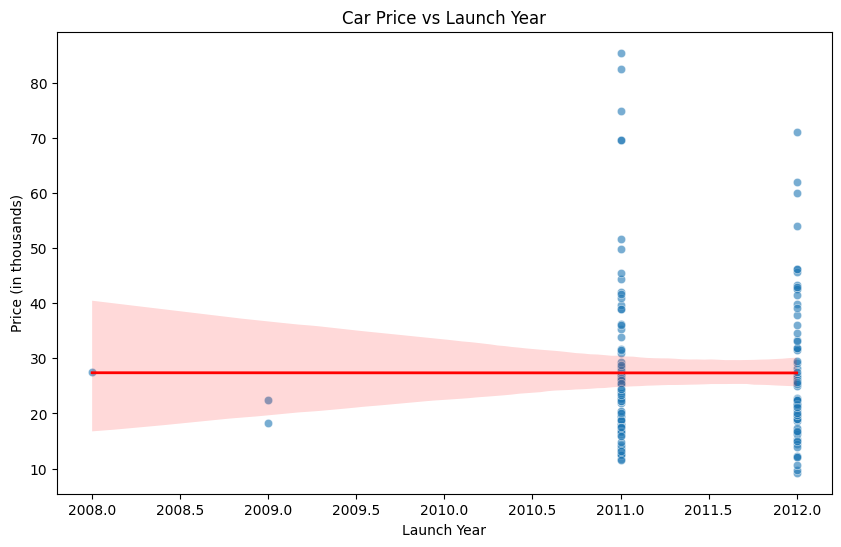

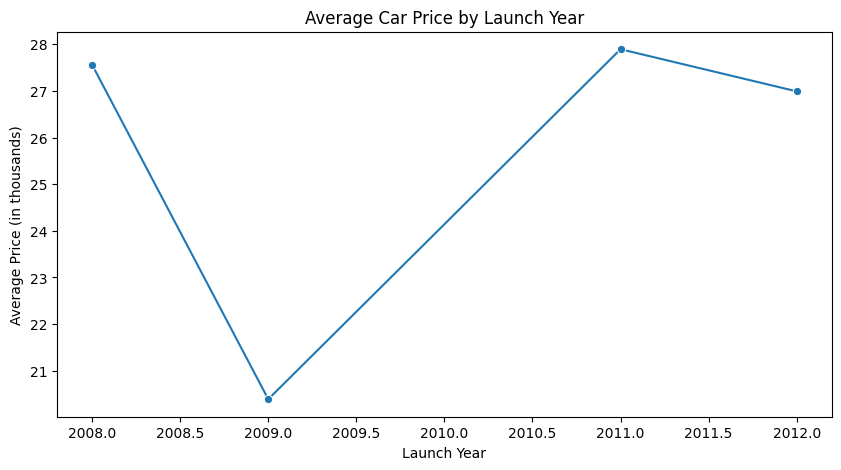

In [53]:
# Are newer cars more expensive?

plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='Launch_Year',
        y='Price_in_thousands',
        alpha=0.6
    )
    

sns.regplot(
        data=df,
        x='Launch_Year',
        y='Price_in_thousands',
        scatter=False,
        color='red',
        line_kws={'linewidth':2}
    )
    
plt.title("Car Price vs Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Price (in thousands)")
plt.show()

# Average price by launch year
avg_price = df.groupby('Launch_Year')['Price_in_thousands'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price.index, y=avg_price.values, marker='o')
plt.title("Average Car Price by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Price (in thousands)")
plt.show()

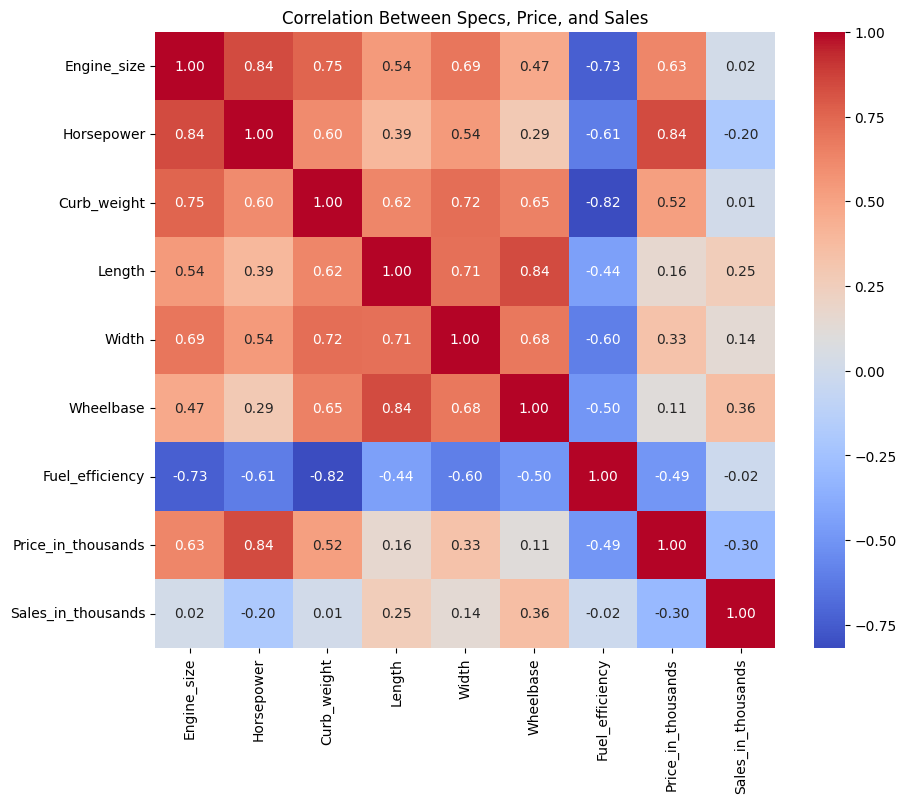

In [54]:
# How do specifications influence sales and price?
spec_cols = ['Engine_size', 'Horsepower', 'Curb_weight', 'Length', 'Width', 'Wheelbase', 'Fuel_efficiency']
plt.figure(figsize=(10,8))
sns.heatmap(df[spec_cols + ['Price_in_thousands','Sales_in_thousands']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Specs, Price, and Sales")
plt.show()


In [55]:
import statsmodels.api as sm

# Select predictor variables (specifications)
spec_cols = ['Engine_size', 'Horsepower', 'Curb_weight', 'Length', 'Width', 'Wheelbase', 'Fuel_efficiency']

# Dependent variable: Price or Sales
# Predicting Price
X = df[spec_cols]
# Add constant for intercept
X = sm.add_constant(X)
y_price = df['Price_in_thousands']

# Fit regression model
model_price = sm.OLS(y_price, X).fit()
print("Regression Summary for Price:")
print(model_price.summary())

# Predicting Sales
y_sales = df['Sales_in_thousands']
model_sales = sm.OLS(y_sales, X).fit()
print("\nRegression Summary for Sales:")
print(model_sales.summary())

Regression Summary for Price:
                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     76.39
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           6.01e-46
Time:                        18:01:31   Log-Likelihood:                -516.71
No. Observations:                 156   AIC:                             1049.
Df Residuals:                     148   BIC:                             1074.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[spec_cols])

# Predicting Price
y_price = df['Price_in_thousands']
lr_price = LinearRegression()
lr_price.fit(X_scaled, y_price)

# Coefficients
coeff_price = pd.Series(lr_price.coef_, index=spec_cols).sort_values(key=abs, ascending=False)
print("Feature Importance for Price Prediction:")
print(coeff_price)

# Predicting Sales
y_sales = df['Sales_in_thousands']
lr_sales = LinearRegression()
lr_sales.fit(X_scaled, y_sales)

coeff_sales = pd.Series(lr_sales.coef_, index=spec_cols).sort_values(key=abs, ascending=False)
print("\nFeature Importance for Sales Prediction:")
print(coeff_sales)

# Optional: R²
print("\nR² for Price model:", r2_score(y_price, lr_price.predict(X_scaled)))
print("R² for Sales model:", r2_score(y_sales, lr_sales.predict(X_scaled)))


Feature Importance for Price Prediction:
Horsepower         14.519222
Curb_weight         6.012399
Engine_size        -3.648705
Length             -3.472659
Fuel_efficiency     1.653462
Width              -1.437498
Wheelbase          -0.045741
dtype: float64

Feature Importance for Sales Prediction:
Horsepower        -38.447718
Wheelbase          36.193813
Engine_size        35.959084
Curb_weight       -31.664747
Fuel_efficiency    -6.222858
Length             -0.395609
Width               0.041752
dtype: float64

R² for Price model: 0.7832331736586673
R² for Sales model: 0.3088511380492076


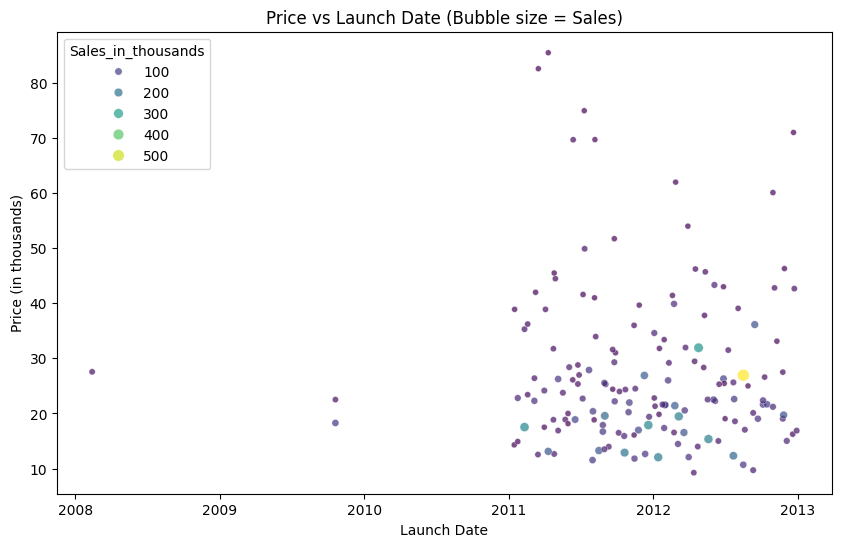

In [57]:
# How do sales and prices trend over time with new launches?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Latest_Launch', y='Price_in_thousands',
                size='Sales_in_thousands', hue='Sales_in_thousands', palette='viridis', alpha=0.7)
plt.title("Price vs Launch Date (Bubble size = Sales)")
plt.xlabel("Launch Date")
plt.ylabel("Price (in thousands)")
plt.show()


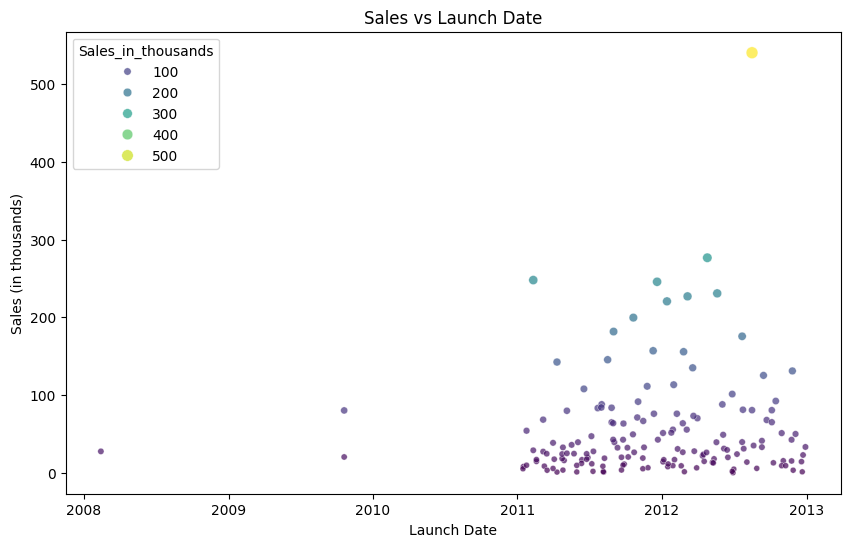

In [58]:

# Do recently launched models achieve higher sales?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Latest_Launch', y='Sales_in_thousands',
                size='Sales_in_thousands', hue='Sales_in_thousands', palette='viridis', alpha=0.7)
plt.title("Sales vs Launch Date")
plt.xlabel("Launch Date")
plt.ylabel("Sales (in thousands)")
plt.show()


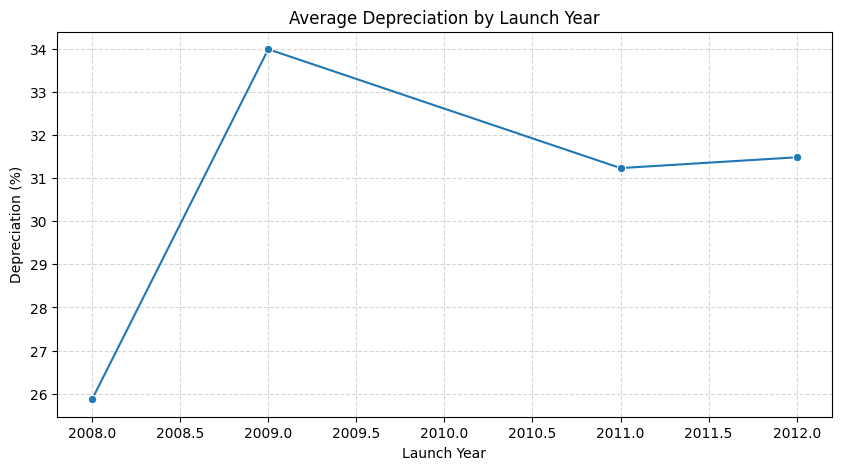

In [59]:
# How fast do car values depreciate after launch?

# Average depreciation (in %) by launch year
avg_depreciation = df.groupby('Launch_Year')['Depreciation_Percentage'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_depreciation.index, y=avg_depreciation.values, marker='o')
plt.title("Average Depreciation by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Depreciation (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



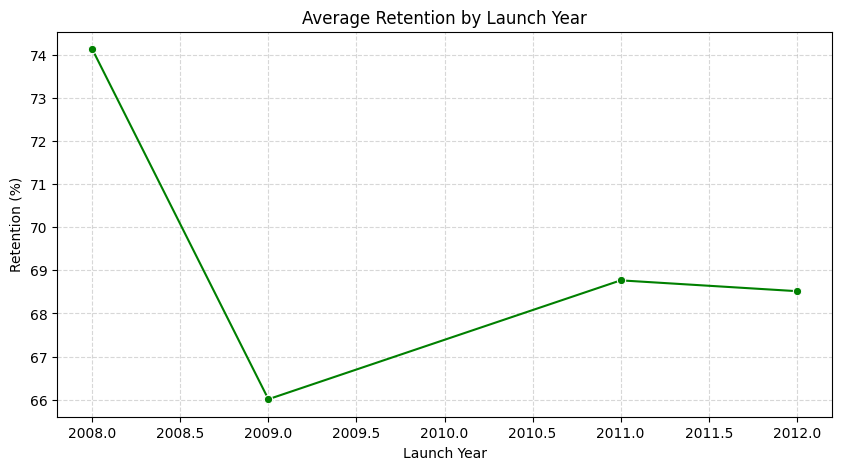

In [60]:
# Average retention (in %) by launch year
avg_retention = df.groupby('Launch_Year')['Retention_Ratio'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_retention.index, y=avg_retention.values, marker='o', color='green')
plt.title("Average Retention by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Retention (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


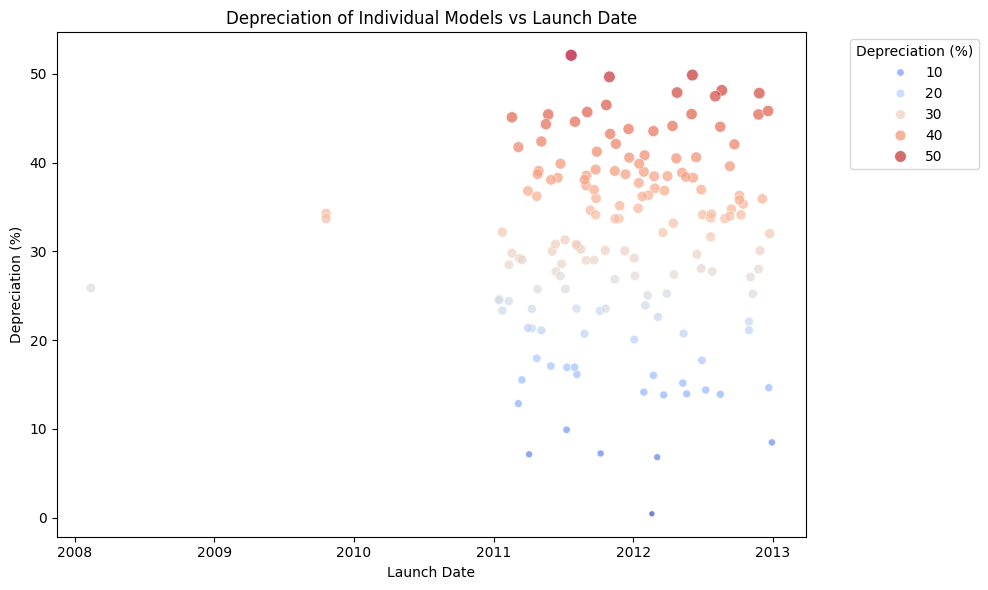

In [61]:
# Scatter plot for individual models
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Latest_Launch',
    y='Depreciation_Percentage',
    hue='Depreciation_Percentage',
    size='Depreciation_Percentage',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Depreciation of Individual Models vs Launch Date")
plt.xlabel("Launch Date")
plt.ylabel("Depreciation (%)")
plt.legend(title="Depreciation (%)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


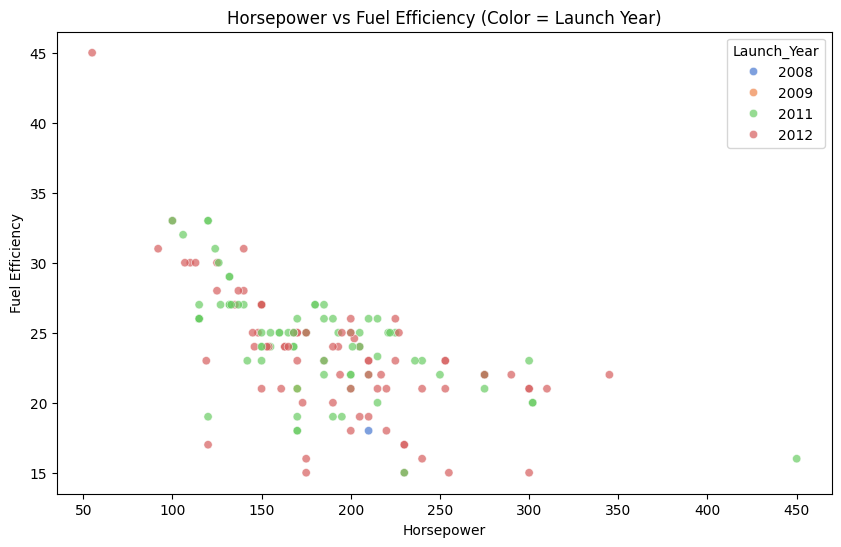

In [62]:
# Performance vs Efficiency trade-off
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Horsepower', y='Fuel_efficiency', hue='Launch_Year', palette='muted', alpha=0.7)
plt.title("Horsepower vs Fuel Efficiency (Color = Launch Year)")
plt.xlabel("Horsepower")
plt.ylabel("Fuel Efficiency")
plt.show()


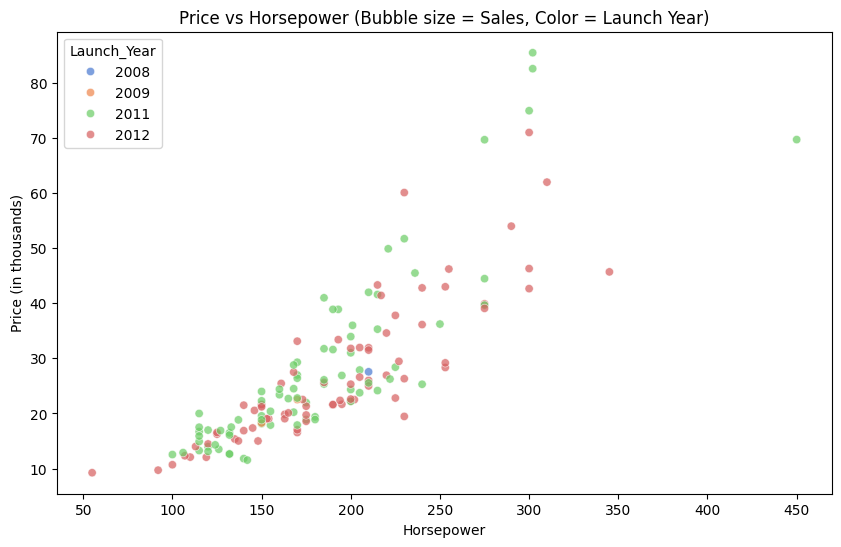

In [63]:
# Price vs Performance vs Launch Year (3D/Bubble)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Horsepower', y='Price_in_thousands',
                hue='Launch_Year', palette='muted', alpha=0.7)
plt.title("Price vs Horsepower (Bubble size = Sales, Color = Launch Year)")
plt.xlabel("Horsepower")
plt.ylabel("Price (in thousands)")
plt.show()

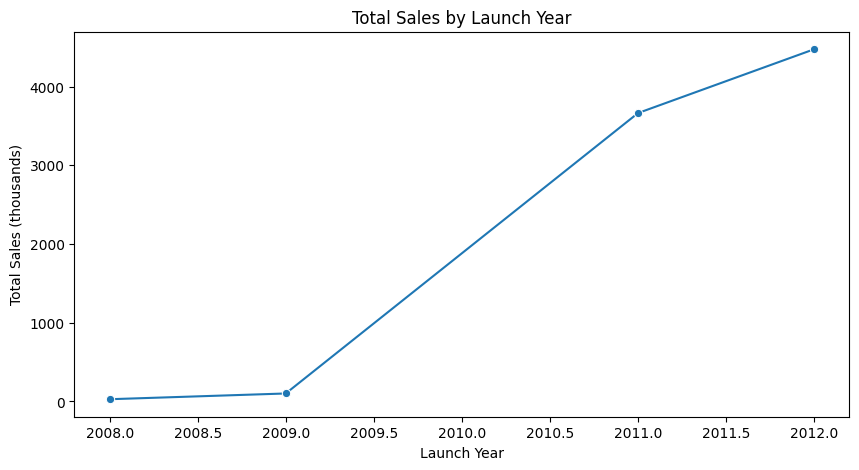

In [64]:
# Total Sales by Launch Year
total_sales = df.groupby('Launch_Year')['Sales_in_thousands'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=total_sales.index, y=total_sales.values, marker='o')
plt.title("Total Sales by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Total Sales (thousands)")
plt.show()

# Additional Codes

In [65]:
# Number of Models
# Total number of unique models in the dataset
total_models = df['Model'].nunique()
print(f"Total unique car models: {total_models}")

# Number of models per manufacturer
models_per_manufacturer = df.groupby('Manufacturer')['Model'].nunique().sort_values(ascending=False)
print(models_per_manufacturer)

Total unique car models: 155
Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Nissan         7
Mitsubishi     7
Pontiac        6
Mercury        6
Oldsmobile     6
Lexus          6
Chrysler       6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Model, dtype: int64


/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_72402/1464230968.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  models_per_manufacturer = df.groupby('Manufacturer')['Model'].nunique().sort_values(ascending=False)


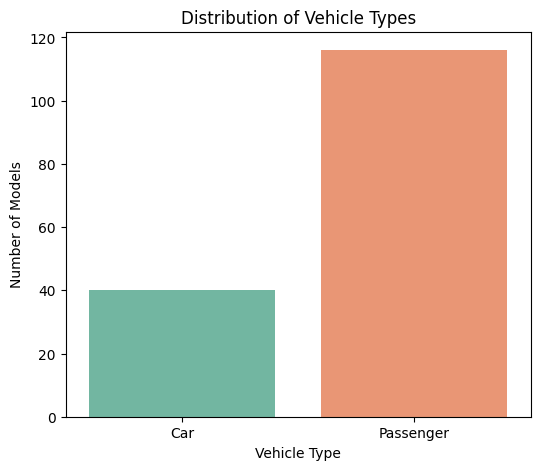

In [66]:
# What is the distribution of vehicle types?
# Count of each vehicle type
vehicle_counts = df['Vehicle_type'].value_counts()
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Vehicle_type', hue='Vehicle_type', palette='Set2')
plt.title("Distribution of Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Models")
plt.show()

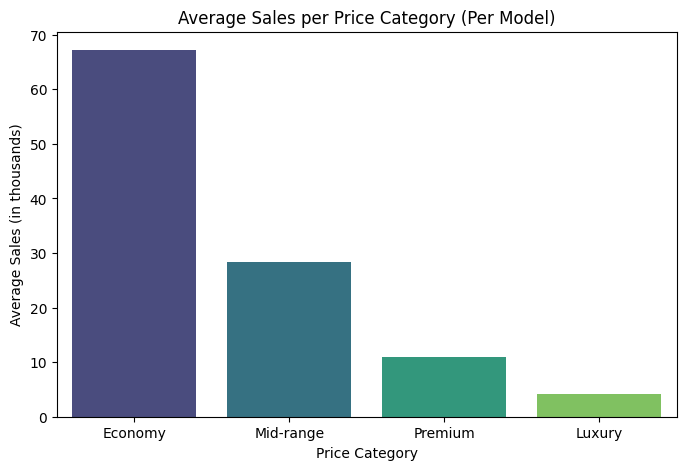

In [67]:
# Are higher-priced cars sold less than mid-range or economy cars?
# Ensure Price_Category exists using dataset min/max
min_price = df["Price_in_thousands"].min()
max_price = df["Price_in_thousands"].max()

bins = np.linspace(min_price, max_price, 5)  # 4 intervals
labels = ["Economy","Mid-range","Premium","Luxury"]

df["Price_Category"] = pd.cut(df["Price_in_thousands"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Price_Category",
    y="Sales_in_thousands",
    estimator=np.mean,   # Seaborn calculates average
    hue="Price_Category",
    errorbar=None,
    palette="viridis",
    dodge=False
)
plt.title("Average Sales per Price Category (Per Model)")
plt.xlabel("Price Category")
plt.ylabel("Average Sales (in thousands)")
plt.show()

# Predictive Modeling